# IIQ3402: Ayudantía 2

En esta ayudantía veremos los conceptos básicos del **Análisis Exploratorio de Datos.**

In [2]:
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q
!pip install statsmodels -q
!pip install seaborn -q

# Funciones Básicas

Para facilitar la transmición de información y utilización de `python` en sus proyectos futuros y el curso.

In [3]:
# Lectura de Datos del curso
import pandas as pd
from scipy.stats import probplot
import numpy as np
def read_course_dataset(name):
    """
    Esta función se encargará de entregarles el set de datos desde el GitHub del curso
    ---
    Parameters
    name: str
        Nombre del set de datos a leer.
    ---
    Notes
    Datasets disponibles:
        - netflix_titles.csv
        - Video_Game_Sales_as_of_Jan_2017.csv
        - oscars_df.csv
    """
    link = 'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/'
    link += name + '?raw=true'
    df = pd.read_csv(link)
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis = 1)

    return df

def group_and_describe(df, columna, dato_interes):
    """
    Permite agrupar un DataFrame por una columna y obtener un resumen de las estadisticas descriptivas
    de las columnas numericas. En este caso, se utiliza el metodo describe de pandas y se agregarán
    - IQR
    - Rango
    - (Mean - Median)
    ---
    df: pd.DataFrame
        DataFrame a agrupar
    columna: str
        Nombre de la columna por la cual se quiere agrupar
    dato_interes: str
        Nombre de la columna de la cual se quiere obtener el resumen
    ---
    return: pd.DataFrame
        DataFrame con el resumen de las estadisticas descriptivas
    ---
    comentario:
    Puede haber errores si los datos no son numericos
    """

    agrupado = df.groupby(columna)[dato_interes].describe()

    agrupado['IQR'] = agrupado['75%'] - agrupado['25%']
    agrupado['Rango'] = agrupado['max'] - agrupado['min']
    agrupado['Mean - Median'] = np.round(agrupado['mean'] - agrupado['50%'], 5)
    return agrupado

def histogram_described(data, mean = True, median = True, mode = True, ejex = None, ejey = None, titulo = None):
    """
    Función que permite obtener un histograma de los datos y mostrar medidas de tendencia central
    ---
    Parameters

    data: pd.Series or np.array
        Serie de datos
    mean: bool
        Indica si se quiere mostrar la media
    median: bool
        Indica si se quiere mostrar la mediana
    mode: bool
        Indica si se quiere mostrar la moda
    ---
    return: None

    """
    # generamos la figura
    fig, ax = plt.subplots(figsize = (6,5), dpi = 300)
    # generamos el histograma
    n_bins = np.sqrt(len(data)).astype(int)
    ax.hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax.axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax.axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ejes
    if ejex:
        ax.set_xlabel(ejex)
    if ejey:
        ax.set_ylabel(ejey)
    # titulo
    if titulo:
        ax.set_title(titulo)
    plt.show()

def histogram_qqplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = None, ejey_histogram = None,
                    ejex_qqplot = None, ejey_qqplot = None, titulo_histograma = None, titulo_qqplot = None,
                    titulo_general = None):
    """
    Función que permite obtener un histograma y un qqplot de los datos
    ---
    Parameters

    data: pd.Series or np.array
        Serie de datos
    mean: bool
        Indica si se quiere mostrar la media
    median: bool
        Indica si se quiere mostrar la mediana
    mode: bool
        Indica si se quiere mostrar la moda
    ejex_histogram: str
        Nombre del eje x del histograma
    ejey_histogram: str
        Nombre del eje y del histograma
    ejex_qqplot: str
        Nombre del eje x del qqplot
    ejey_qqplot: str
        Nombre del eje y del qqplot
    titulo_histograma: str
        Nombre del titulo del histograma
    titulo_qqplot: str
        Nombre del titulo del qqplot
    titulo_general: str
        Nombre del titulo general
    ---
    return: None
    """
    # generamos la figura
    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 300)
    # histograma

    n_bins = np.sqrt(len(data)).astype(int)
    ax[0].hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax[0].axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax[0].axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax[0].axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax[0].legend()
    # ejes
    if ejex_histogram:
        ax[0].set_xlabel(ejex_histogram)
    if ejey_histogram:
        ax[0].set_ylabel(ejey_histogram)
    # titulo
    if titulo_histograma:
        ax[0].set_title(titulo_histograma)

    ### qqplot ###

    (osm, osr), (slope, intercept, r) = probplot(data, dist="norm")

    ax[1].plot(osm, osr, 'o')
    ax[1].plot(osm, slope*osm + intercept, color = 'r', linestyle = '--', label = 'Linea de regresion')
    if ejex_qqplot:
        ax[1].set_xlabel(ejex_qqplot)
    else:
        ax[1].set_xlabel('Cuantiles teoricos')
    if ejey_qqplot:
        ax[1].set_ylabel(ejey_qqplot)
    else:
        ax[1].set_ylabel('Cuantiles observados')
    ax[1].legend()
    if titulo_qqplot:
        ax[1].set_title(titulo_qqplot)
    if titulo_general:
        fig.suptitle(titulo_general)
    fig.tight_layout()

    plt.show()
def histogram_boxplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = None, ejey_histogram = None,
                    ejex_boxplot = None, ejey_boxplot = None, titulo_histograma = None, titulo_boxplot = None,
                    titulo_general = None):
    """
    Función que permite obtener un histograma y un boxplot de los datos
    ---
    Parameters
    data : pd.Series or np.array
        Serie de datos
    mean : bool
        Indica si se quiere mostrar la media
    median : bool
        Indica si se quiere mostrar la mediana
    mode : bool
        Indica si se quiere mostrar la moda
    ejex_histogram : str
        Nombre del eje x del histograma
    ejey_histogram : str
        Nombre del eje y del histograma
    ejex_boxplot : str
        Nombre del eje x del boxplot
    ejey_boxplot : str
        Nombre del eje y del boxplot
    titulo_histograma : str
        Nombre del titulo del histograma
    titulo_boxplot : str
        Nombre del titulo del boxplot
    titulo_general : str
        Nombre del titulo general
    ---
    return: None
    """

        # generamos la figura
    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 300)
    # histograma

    n_bins = np.sqrt(len(data)).astype(int)
    ax[0].hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax[0].axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax[0].axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax[0].axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax[0].legend()
    # ejes
    if ejex_histogram:
        ax[0].set_xlabel(ejex_histogram)
    if ejey_histogram:
        ax[0].set_ylabel(ejey_histogram)
    # titulo
    if titulo_histograma:
        ax[0].set_title(titulo_histograma)

    ### boxplot ###
    ax[1].boxplot(data)
    if ejex_boxplot:
        ax[1].set_xlabel(ejex_boxplot)
    if ejey_boxplot:
        ax[1].set_ylabel(ejey_boxplot)
    if titulo_boxplot:
        ax[1].set_title(titulo_boxplot)
    if titulo_general:
        fig.suptitle(titulo_general)
    fig.tight_layout()
    plt.show()



# Netflix

In [4]:
import pandas as pd

name = 'netflix_titles.csv'
netflix_df = read_course_dataset(name)
netflix_df.head(5) # Vemos las primeras 5 filas

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
# P1
import numpy as np
movies = netflix_df[netflix_df['type'] == 'Movie']
movies.loc[:,'duration'] = movies['duration'].str.replace(' min', '').astype(int)
max_duration = movies['duration'].max()
movies_max = movies[movies['duration'] == max_duration]
movies_max

show_id   type                       title director  \
4315  80988062  Movie  Black Mirror: Bandersnatch      NaN   

                                                   cast        country  \
4315  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

             date_added  release_year rating duration  \
4315  December 28, 2018          2018  TV-MA      312   

                                           listed_in  \
4315  Dramas, International Movies, Sci-Fi & Fantasy   

                                            description  
4315  In 1984, a young programmer begins to question...

In [6]:
# P2
cat_movies = []
for i in netflix_df.index:
    descripcion_i = netflix_df.loc[i, 'description']
    if 'cat' in descripcion_i:
        cat_movies.append(netflix_df.loc[i, 'title'])
cat_movies


['Krish Trish and Baltiboy',
 'Krish Trish and Baltiboy: Best Friends Forever',
 'Krish Trish and Baltiboy: Oversmartness Never Pays',
 'Rolling Papers',
 'Frequency',
 'Adam Ruins Everything',
 'Lovesick',
 'Teach Us All',
 'China Salesman',
 'Gaga: Five Foot Two',
 'Criminal: France',
 'The Bund',
 'Bitcoin Heist',
 'Vincent N Roxxy',
 'As Above, So Below',
 'Al Hayba',
 'Arisan 2',
 'For the Birds',
 'Open Season',
 'The CEO',
 'Uncle Naji in UAE',
 'Garbage',
 'The River Wild',
 'The Year of Happiness and Love',
 'After',
 'StoryBots Super Songs',
 'The Haunting of Molly Hartley',
 '14 Cameras',
 'It Takes a Lunatic',
 'Nailed It! France',
 'Nailed It! Spain',
 'Kitten Rescuers',
 'Joe Rogan: Strange Times',
 'Illang: The Wolf Brigade',
 'S Storm',
 'In My Country',
 'Unnatural Selection',
 'Patton Oswalt: Annihilation',
 'Anthony Jeselnik: Thoughts and Prayers',
 'Aisa Yeh Jahaan',
 'Macchli Jal Ki Rani Hai',
 'Money',
 'Sardaarji 2',
 'Teshan',
 'Harold & Kumar Escape from Guanta

In [7]:
# P3
index_musicales = []
for i in netflix_df.index:
    descripcion_i = netflix_df.loc[i, 'description']
    if 'musical' in descripcion_i:
        index_musicales.append(i)
musicales = netflix_df.loc[index_musicales, :]
index_noUSA = []
for i in netflix_df.index:
    if netflix_df.loc[i, 'country'] != 'United States':
        index_noUSA.append(i)

noUSA = netflix_df.loc[index_noUSA, :]

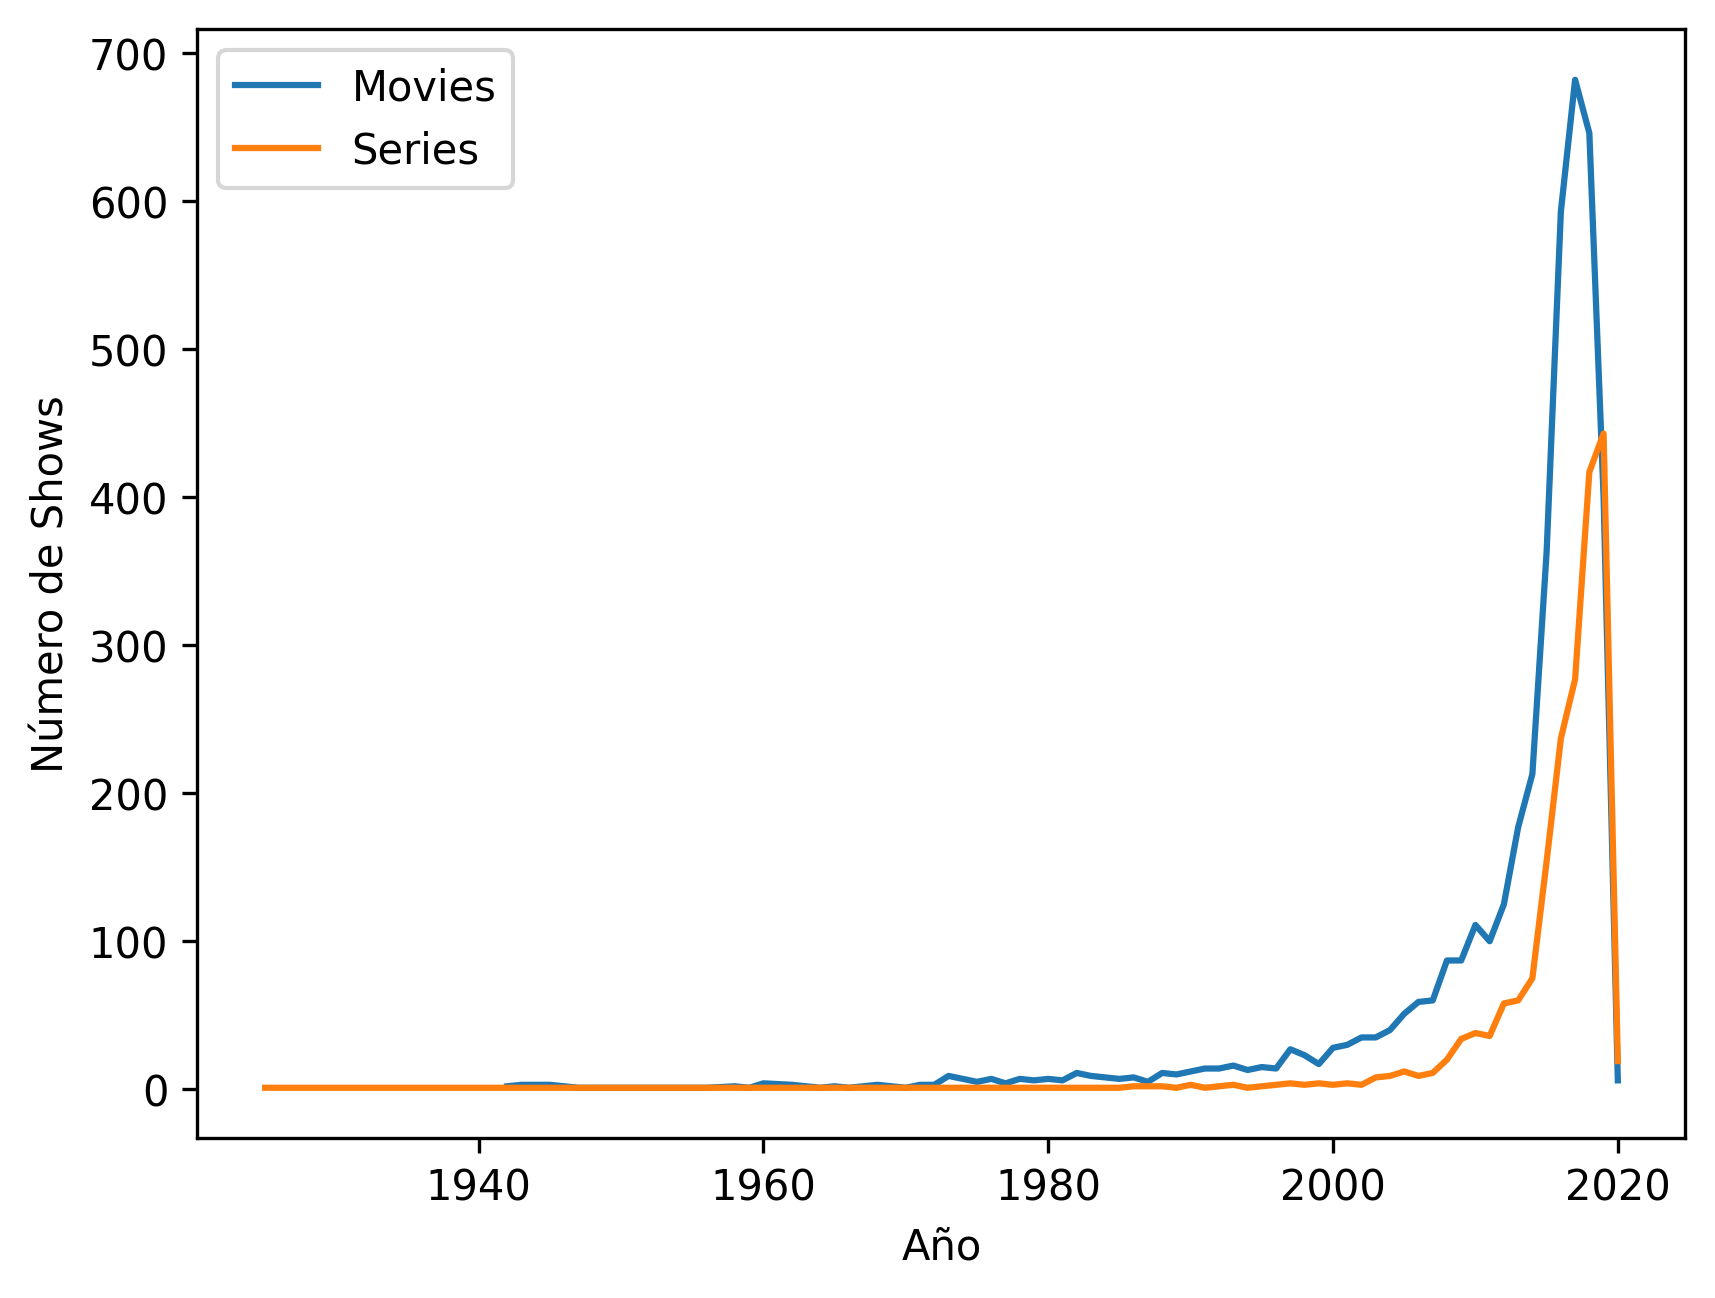

In [8]:
# P4
import matplotlib.pyplot as plt

series = netflix_df[netflix_df['type'] == 'TV Show']  # obtenemos las vistas de día
# notar que movies viene de antes
movies_count = movies.groupby('release_year').count() # agrupamos y contamos cuantos hay por año
series_count = series.groupby('release_year').count() # agrupamos y contamos cuantos hay por año
# Si ven los dataframes quedan agrupados por año en el índice del DataFrame
# graficamos
fig, ax = plt.subplots(dpi = 300)
ax.plot(movies_count.index, movies_count['show_id'], label='Movies')
ax.plot(series_count.index, series_count['show_id'], label='Series')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Shows')
ax.legend()
plt.show()




# VideoJuegos

## P1

In [9]:
vj_df = read_course_dataset('Video_Game_Sales_as_of_Jan_2017.csv')
vj_df.head(5)

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue        G           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.54          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.80      3.79         3.29         35.57          82.0   
3     15.61     10.95      3.28         2.95         32.78          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Rating  
0          51.0         8.0       324.0      E  
1           NaN         NaN         NaN    NaN  
2          73.0         8.3       712.0      E  
3          73.0         8.0       193.0      E  
4           NaN         NaN         NaN    NaN

In [10]:

vj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [11]:
vj_df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     17408.000000  17416.000000  17416.000000  17416.000000   
mean       2006.630859      0.254534      0.140727      0.075020   
std           5.901598      0.800673      0.497341      0.303412   
min        1976.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2008.000000      0.070000      0.020000      0.000000   
75%        2011.000000      0.230000      0.100000      0.030000   
max        2017.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  17416.000000  17416.000000   8336.000000   8336.000000  7798.000000   
mean       0.045908      0.516469     68.912548     26.192059     7.117056   
std        0.183932      1.526124     13.964937     18.991526     1.502410   
min        0.000000      0.010000     13.000000      3.000000     0.000000   
25%        0.000000      0.050000     60.000000     11.000000     6.400000   
50%        0.010000      0.160000     71.000000     21.000000     7.500000   
75%        0.030000      0.450000     79.000000     36.000000     8.200000   
max       10.570000     82.540000     98.000000    113.000000     9.700000   

         User_Count  
count   7798.000000  
mean     162.672480  
std      562.837954  
min        4.000000  
25%       10.000000  
50%       25.000000  
75%       81.000000  
max    10766.000000

In [12]:
vj_df.groupby('Platform').describe()

Year_of_Release                                                 \
                   count         mean       std     min     25%     50%   
Platform                                                                  
2600               133.0  1981.827068  2.397951  1976.0  1981.0  1981.0   
3DO                  3.0  1994.666667  0.577350  1994.0  1994.5  1995.0   
3DS                553.0  2013.157324  1.726453  2005.0  2012.0  2013.0   
DC                  52.0  1999.942308  1.808623  1998.0  1999.0  2000.0   
DS                2249.0  2008.211650  1.763264  1985.0  2007.0  2008.0   
G                   98.0  1995.969388  4.157850  1988.0  1992.0  1997.0   
GBA                844.0  2003.241706  1.494431  2000.0  2002.0  2003.0   
GC                 563.0  2003.388988  1.387419  2001.0  2002.0  2003.0   
GEN                 27.0  1993.037037  1.091276  1990.0  1992.0  1993.0   
GG                   1.0  1992.000000       NaN  1992.0  1992.0  1992.0   
N64                319.0  1998.557994  1.330197  1996.0  1998.0  1999.0   
NES                 98.0  1987.153061  2.793040  1983.0  1985.0  1986.5   
NG                  12.0  1994.500000  1.000000  1993.0  1994.0  1994.5   
PC                1128.0  2009.037234  4.600301  1985.0  2007.0  2010.0   
PCFX                 1.0  1996.000000       NaN  1996.0  1996.0  1996.0   
PS                1200.0  1998.016667  1.848667  1994.0  1997.0  1998.0   
PS2               2206.0  2004.647325  2.592998  2000.0  2002.0  2005.0   
PS3               1362.0  2010.856094  2.458740  2006.0  2009.0  2011.0   
PS4                424.0  2015.207547  0.866688  2013.0  2015.0  2015.0   
PSP               1302.0  2008.820276  2.470416  2004.0  2007.0  2009.0   
PSV                502.0  2014.290837  1.474695  2008.0  2013.0  2015.0   
SAT                173.0  1996.028902  1.291420  1994.0  1995.0  1996.0   
SCD                  6.0  1993.833333  0.408248  1993.0  1994.0  1994.0   
SNES               239.0  1993.845188  1.679426  1990.0  1993.0  1994.0   
TG16                 2.0  1995.000000  0.000000  1995.0  1995.0  1995.0   
WS                   7.0  2000.285714  1.112697  1999.0  1999.5  2000.0   
Wii               1357.0  2008.971997  1.554074  2006.0  2008.0  2009.0   
WiiU               153.0  2013.712418  1.296114  2012.0  2013.0  2014.0   
X                  833.0  2003.629052  1.371226  2000.0  2003.0  2004.0   
X360              1297.0  2009.902082  2.474026  2005.0  2008.0  2010.0   
XOne               264.0  2015.015152  0.955153  2013.0  2014.0  2015.0   

                         NA_Sales            ... User_Score      User_Count  \
             75%     max    count      mean  ...        75%  max      count   
Platform                                     ...                              
2600      1982.0  1992.0    133.0  0.681203  ...        NaN  NaN        0.0   
3DO       1995.0  1995.0      3.0  0.000000  ...        NaN  NaN        0.0   
3DS       2015.0  2016.0    553.0  0.158318  ...      7.900  9.6      179.0   
DC        2000.0  2008.0     52.0  0.104423  ...      9.075  9.4       14.0   
DS        2009.0  2014.0   2251.0  0.170253  ...      8.000  9.5      521.0   
G         2000.0  2001.0     98.0  1.166531  ...        NaN  NaN        0.0   
GBA       2004.0  2007.0    844.0  0.222310  ...      8.600  9.6      265.0   
GC        2005.0  2007.0    563.0  0.237176  ...      8.500  9.4      373.0   
GEN       1994.0  1994.0     27.0  0.713704  ...        NaN  NaN        0.0   
GG        1992.0  1992.0      1.0  0.000000  ...        NaN  NaN        0.0   
N64       1999.0  2008.0    319.0  0.435799  ...        NaN  NaN        0.0   
NES       1989.0  1994.0     98.0  1.285102  ...        NaN  NaN        0.0   
NG        1995.0  1996.0     12.0  0.000000  ...        NaN  NaN        0.0   
PC        2012.0  2016.0   1128.0  0.084734  ...      8.200  9.3      859.0   
PCFX      1996.0  1996.0      1.0  0.000000  ...        NaN  NaN        0.0   
PS        1999.0  2003.0   1200.0  0

###P1 a

In [13]:
# P1
# a


glob_sales = group_and_describe(vj_df, 'Platform', 'Global_Sales')
glob_sales

count      mean       std   min     25%    50%     75%    max  \
Platform                                                                   
2600       133.0  0.729925  0.917241  0.07  0.2900  0.460  0.7800   7.81   
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06   
3DS        553.0  0.489946  1.465103  0.01  0.0400  0.110  0.3200  14.92   
DC          52.0  0.307115  0.469912  0.02  0.0775  0.135  0.2975   2.42   
DS        2251.0  0.359343  1.396752  0.01  0.0400  0.100  0.2600  29.81   
G           98.0  2.606633  5.365287  0.06  0.3025  1.165  2.1650  31.37   
GBA        844.0  0.377630  0.886786  0.01  0.0500  0.160  0.3800  15.85   
GC         563.0  0.354227  0.682301  0.01  0.0700  0.150  0.3500   7.07   
GEN         27.0  1.050370  1.492217  0.03  0.0700  0.150  1.7100   6.03   
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04   
N64        319.0  0.686144  1.315965  0.01  0.1350  0.270  0.5950  11.89   
NES         98.0  2.561939  5.108195  0.06  1.0000  1.375  2.2225  40.24   
NG          12.0  0.120000  0.082241  0.02  0.0550  0.100  0.2000   0.25   
PC        1128.0  0.234885  0.635929  0.01  0.0200  0.040  0.1400   8.01   
PCFX         1.0  0.030000       NaN  0.03  0.0300  0.030  0.0300   0.03   
PS        1200.0  0.608925  1.053492  0.01  0.1000  0.255  0.6600  10.95   
PS2       2206.0  0.569397  1.129208  0.01  0.0800  0.230  0.5500  20.81   
PS3       1362.0  0.692577  1.381501  0.01  0.0900  0.260  0.7400  21.12   
PS4        424.0  0.803750  1.647781  0.01  0.0500  0.185  0.7275  14.80   
PSP       1304.0  0.226771  0.504686  0.01  0.0200  0.080  0.2125   7.69   
PSV        503.0  0.113380  0.205254  0.01  0.0200  0.040  0.1200   2.11   
SAT        173.0  0.194162  0.217849  0.02  0.0800  0.120  0.2600   1.93   
SCD          6.0  0.311667  0.583144  0.05  0.0525  0.065  0.1225   1.50   
SNES       239.0  0.837029  1.869059  0.01  0.1350  0.320  0.7050  20.61   
TG16         2.0  0.080000  0.084853  0.02  0.0500  0.080  0.1100   0.14   
WS           7.0  0.204286  0.168904  0.01  0.1000  0.180  0.2650   0.51   
Wii       1359.0  0.669742  3.084600  0.01  0.0800  0.190  0.4700  82.54   
WiiU       153.0  0.555098  1.061721  0.01  0.0600  0.210  0.5400   7.23   
X          833.0  0.310144  0.532330  0.01  0.0600  0.140  0.3400   8.49   
X360      1298.0  0.751533  1.601207  0.01  0.1000  0.270  0.7300  21.86   
XOne       264.0  0.658409  1.065821  0.01  0.0600  0.215  0.6900   7.44   

             IQR  Rango  Mean - Median  
Platform                                
2600      0.4900   7.74        0.26992  
3DO       0.0200   0.04        0.01333  
3DS       0.2800  14.91        0.37995  
DC        0.2200   2.40        0.17212  
DS        0.2200  29.80        0.25934  
G         1.8625  31.31        1.44163  
GBA       0.3300  15.84        0.21763  
GC        0.2800   7.06        0.20423  
GEN       1.6400   6.00        0.90037  
GG        0.0000   0.00        0.00000  
N64       0.4600  11.88        0.41614  
NES       1.2225  40.18        1.18694  
NG        0.1450   0.23        0.02000  
PC        0.1200   8.00        0.19488  
PCFX      0.0000   0.00        0.00000  
PS        0.5600  10.94        0.35393  
PS2       0.4700  20.80        0.33940  
PS3       0.6500  21.11        0.43258  
PS4       0.6775  14.79        0.61875  
PSP       0.1925   7.68        0.14677  
PSV       0.1000   2.10        0.07338  
SAT       0.1800   1.91        0.07416  
SCD       0.0700   1.45        0.24667  
SNES      0.5700  20.60        0.51703  
TG16      0.0600   0.12       -0.00000  
WS        0.1650   0.50        0.02429  
Wii       0.3900  82.53        0.47974  
WiiU      0.4800   7.22        0.34510  
X         0.2800   8.48        0.17014  
X360      0.6300  21.85        0.48153  
XOne      0.6300   7.43        0.44341

###P1 b

In [14]:
# P1
# b
us_score = group_and_describe(vj_df, 'Genre', 'User_Score')
us_score

count      mean       std  min   25%   50%  75%  max   IQR  \
Genre                                                                       
Action        1878.0  7.049894  1.429821  0.3  6.30  7.40  8.0  9.5  1.70   
Adventure      314.0  7.121338  1.639944  0.0  6.40  7.60  8.2  9.4  1.80   
Fighting       409.0  7.302689  1.389268  0.9  6.60  7.60  8.3  9.2  1.70   
Misc           446.0  6.823991  1.540213  0.5  6.00  7.10  8.0  9.2  2.00   
Platform       435.0  7.276322  1.540248  0.2  6.50  7.70  8.4  9.4  1.90   
Puzzle         135.0  7.180000  1.535150  1.1  6.35  7.50  8.2  9.5  1.85   
Racing         653.0  7.003216  1.560490  0.3  6.20  7.30  8.2  9.3  2.00   
Role-Playing   766.0  7.602872  1.103277  1.4  7.00  7.80  8.4  9.7  1.40   
Shooter        945.0  7.023069  1.530633  1.2  6.30  7.40  8.1  9.3  1.80   
Simulation     358.0  7.128212  1.623346  1.7  6.50  7.55  8.3  9.6  1.80   
Sports        1123.0  6.967053  1.605072  0.2  6.10  7.40  8.1  9.5  2.00   
Strategy       336.0  7.287500  1.606951  0.6  6.80  7.80  8.4  9.4  1.60   

              Rango  Mean - Median  
Genre                               
Action          9.2       -0.35011  
Adventure       9.4       -0.47866  
Fighting        8.3       -0.29731  
Misc            8.7       -0.27601  
Platform        9.2       -0.42368  
Puzzle          8.4       -0.32000  
Racing          9.0       -0.29678  
Role-Playing    8.3       -0.19713  
Shooter         8.1       -0.37693  
Simulation      7.9       -0.42179  
Sports          9.3       -0.43295  
Strategy        8.8       -0.51250

## P2

### P2 a

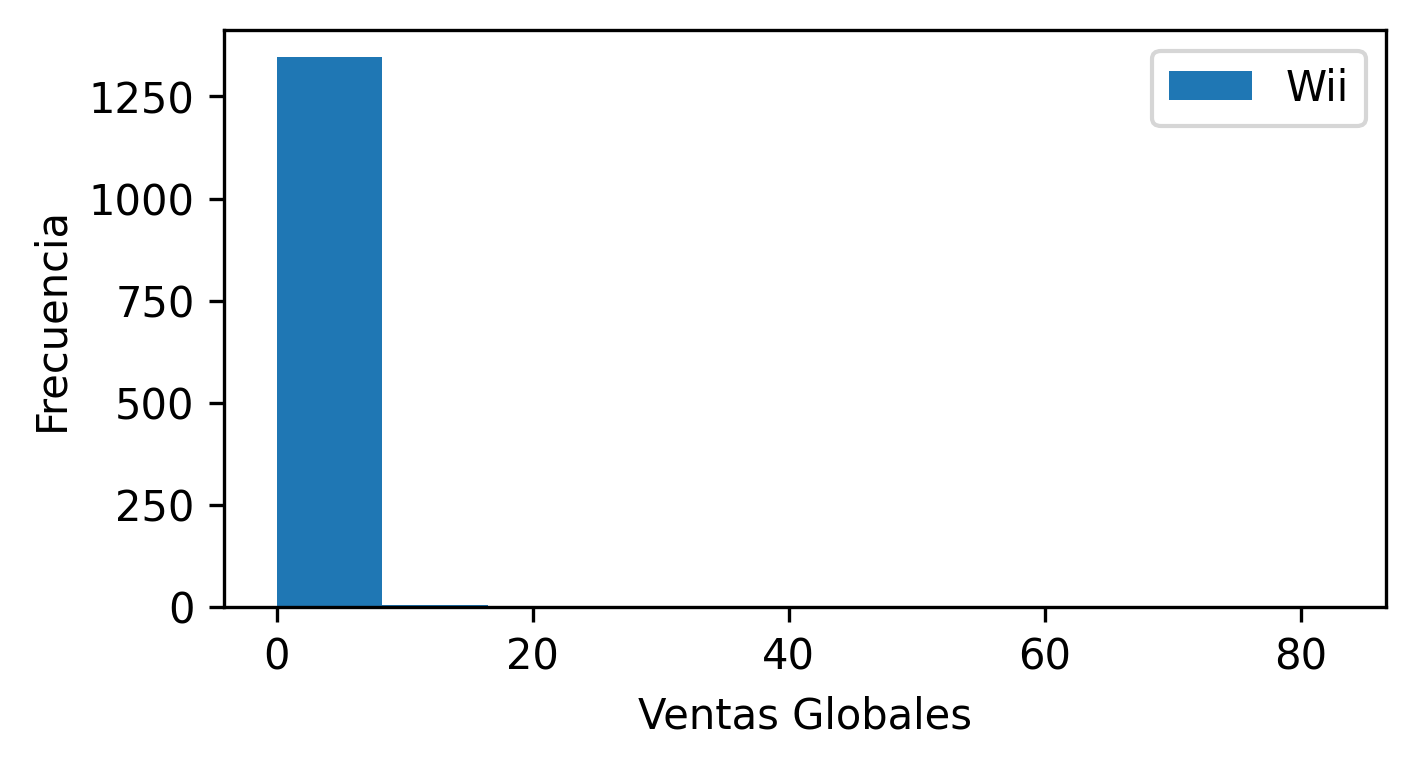

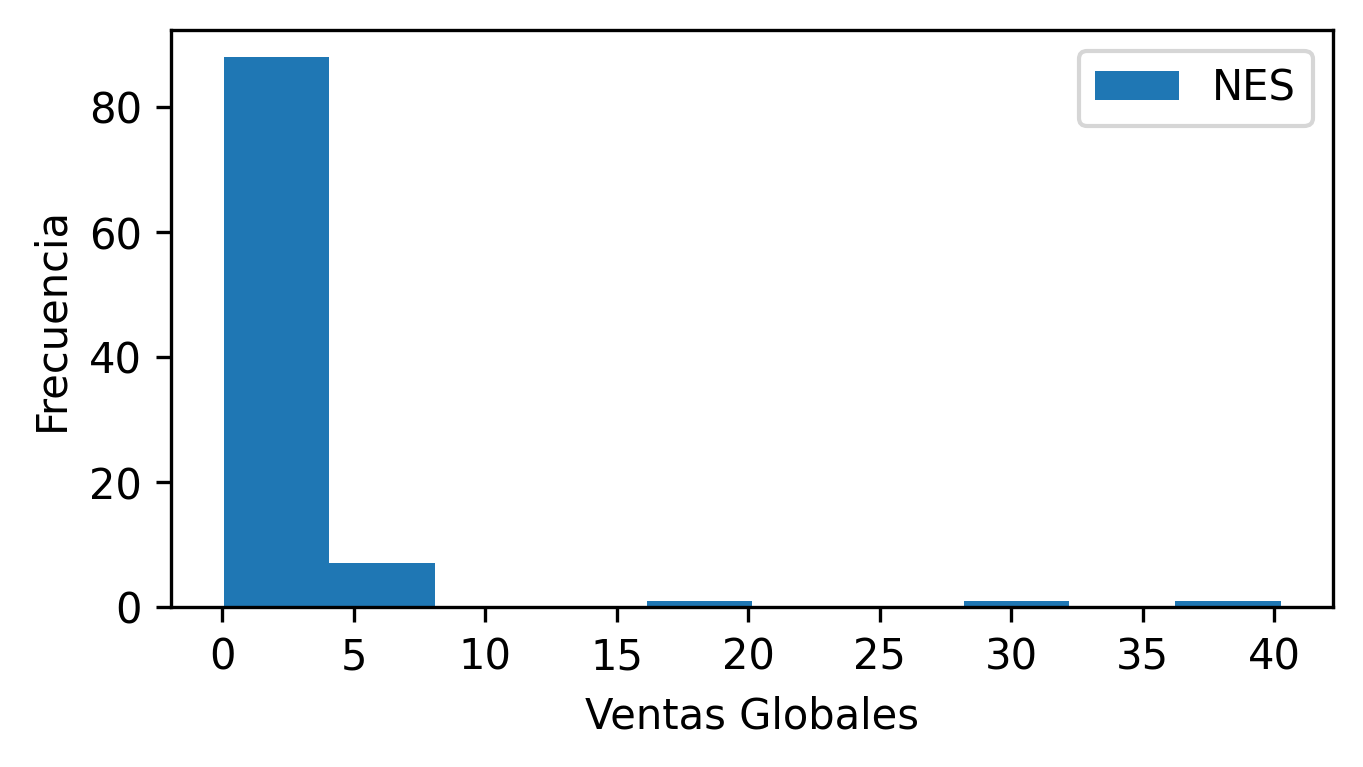

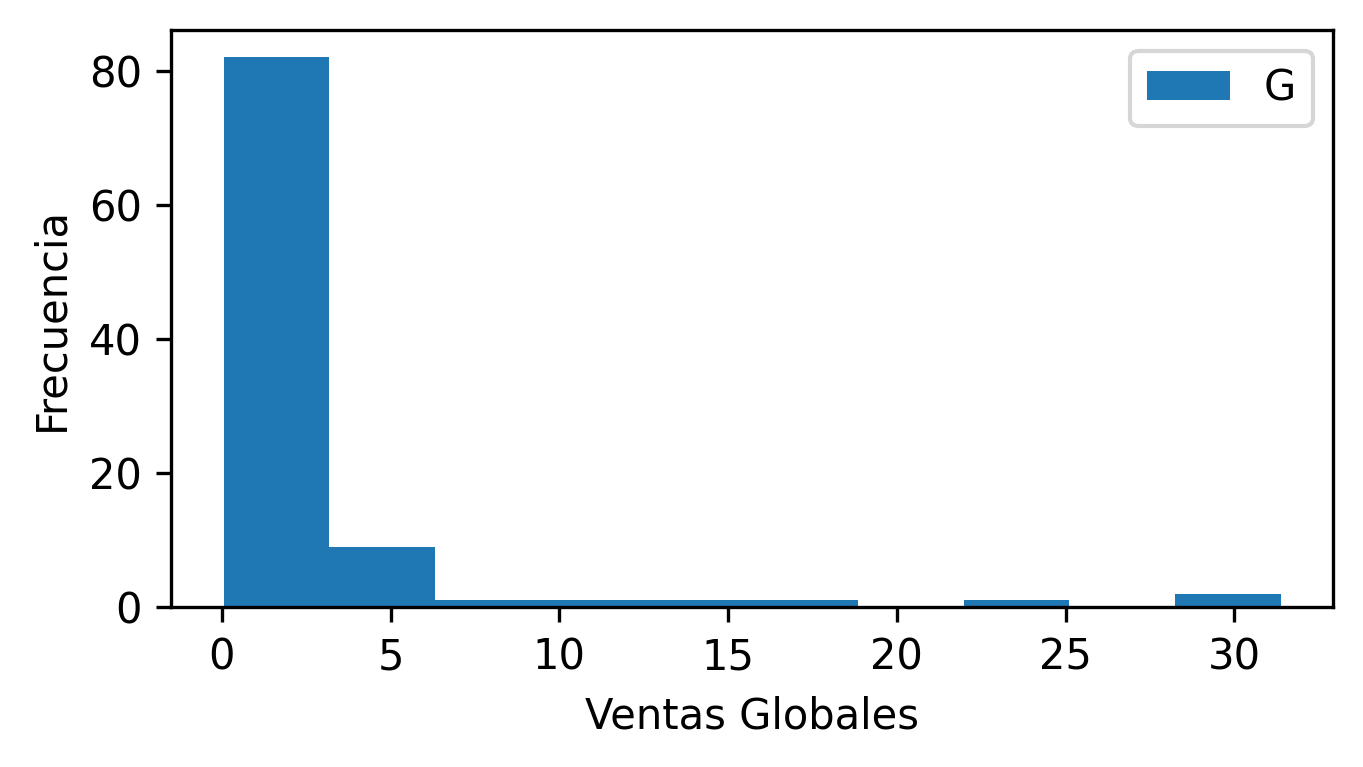

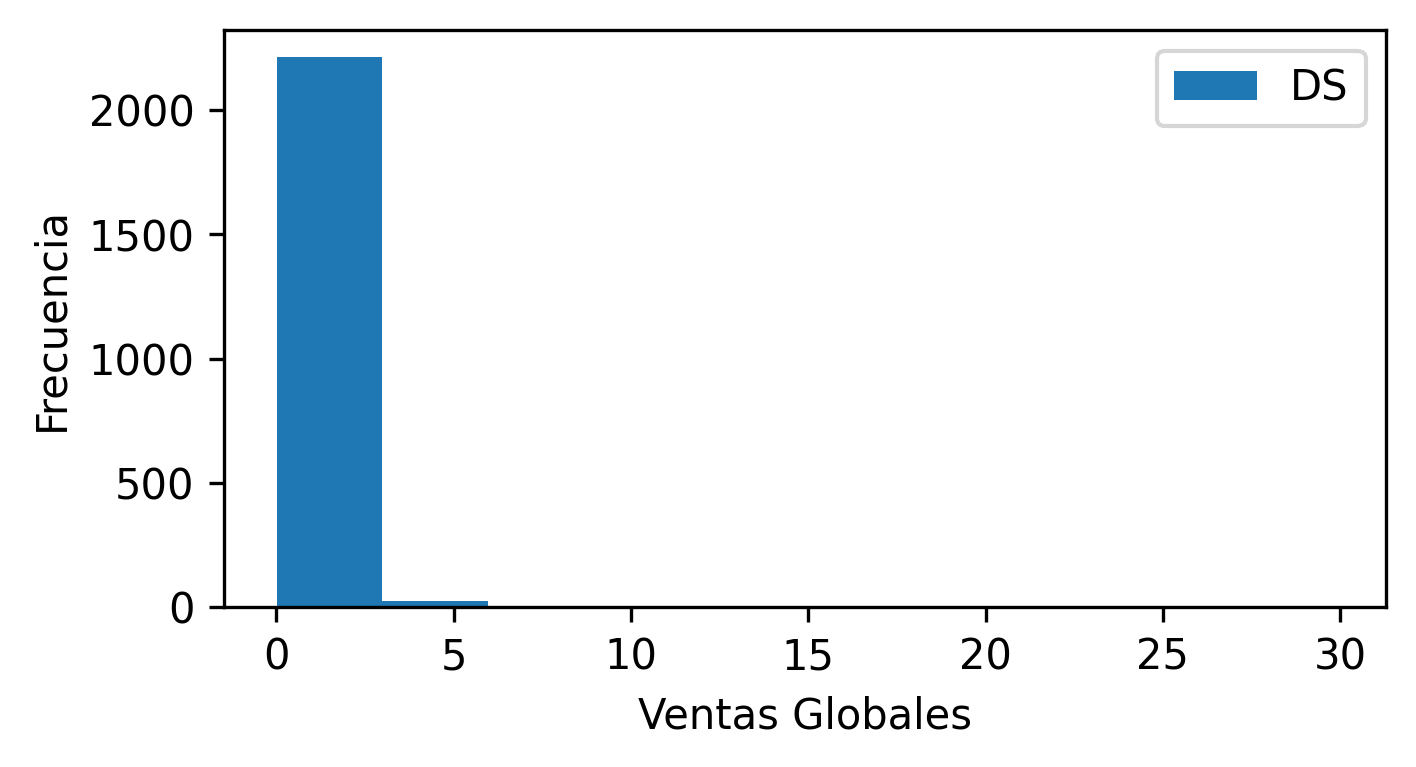

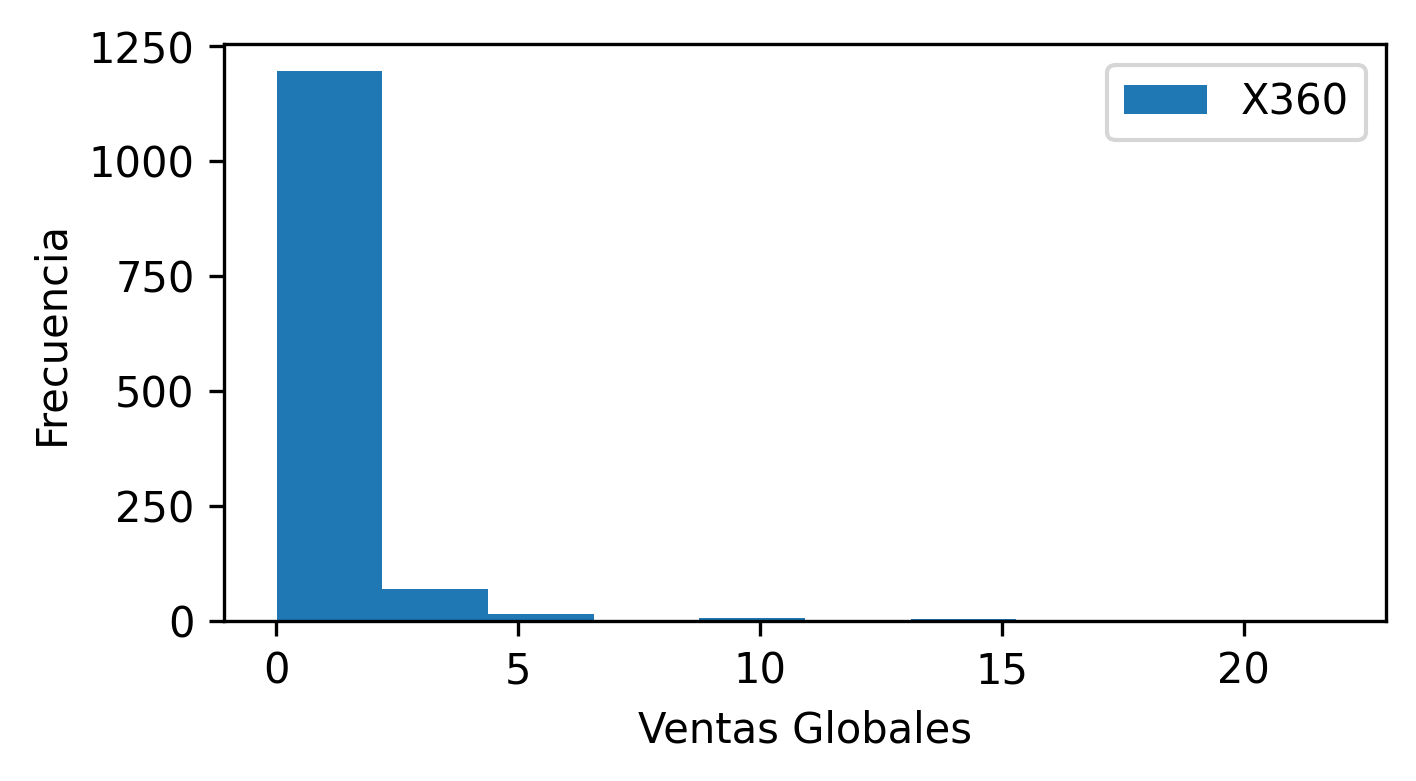

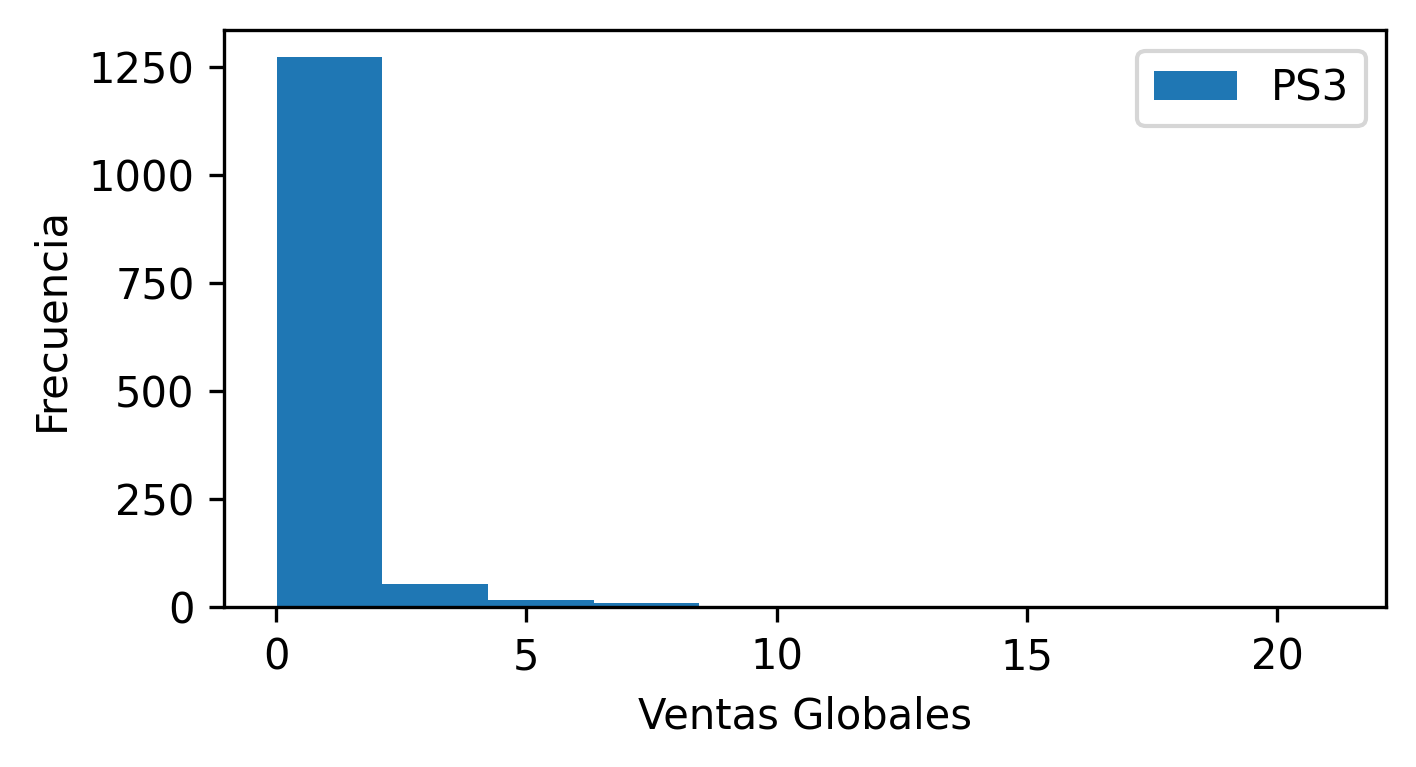

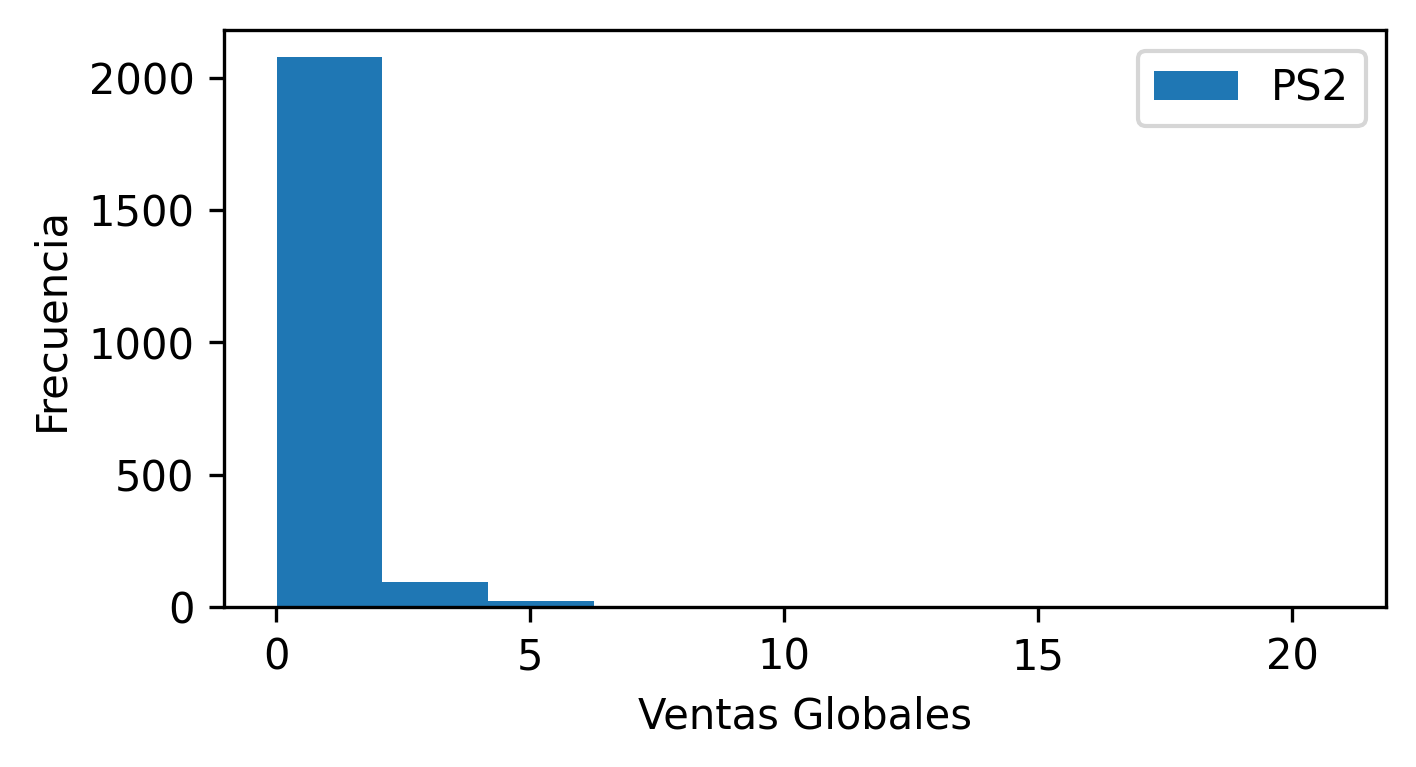

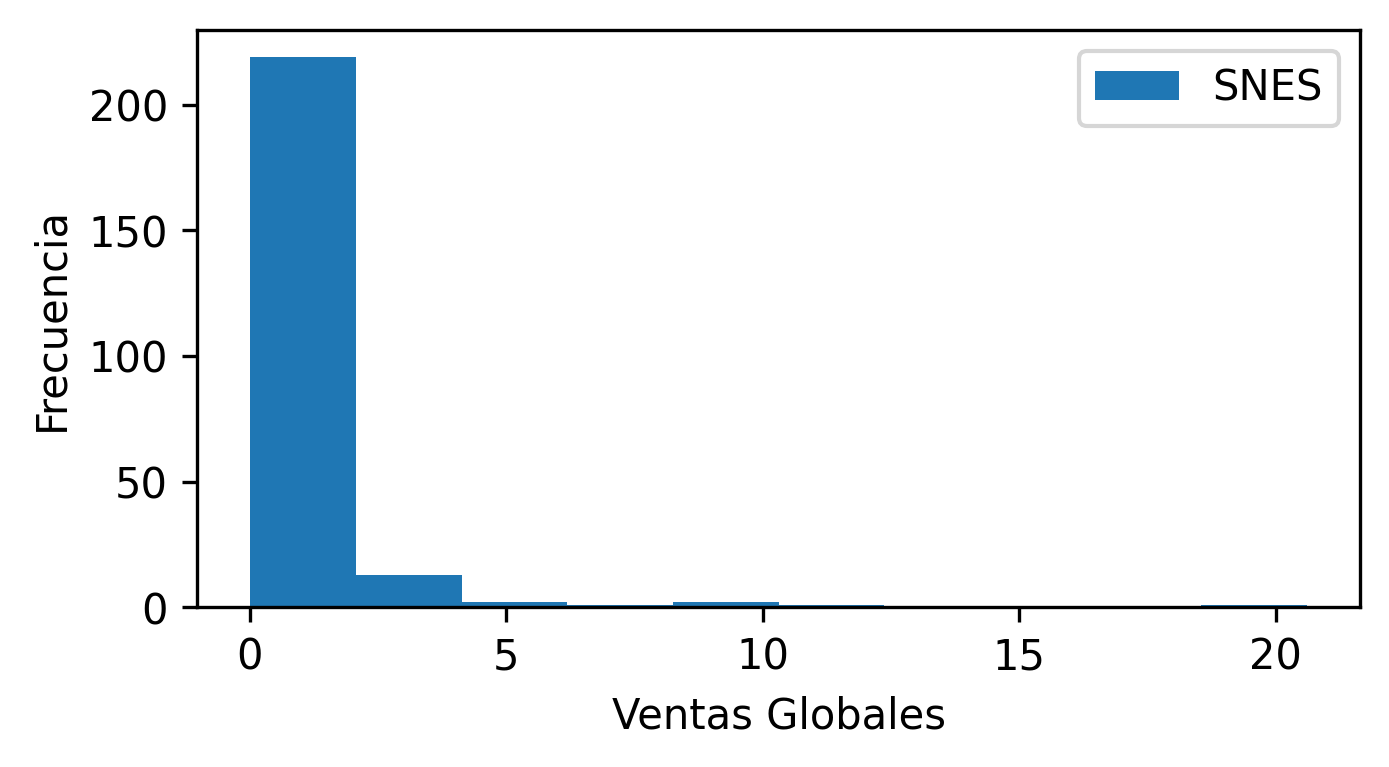

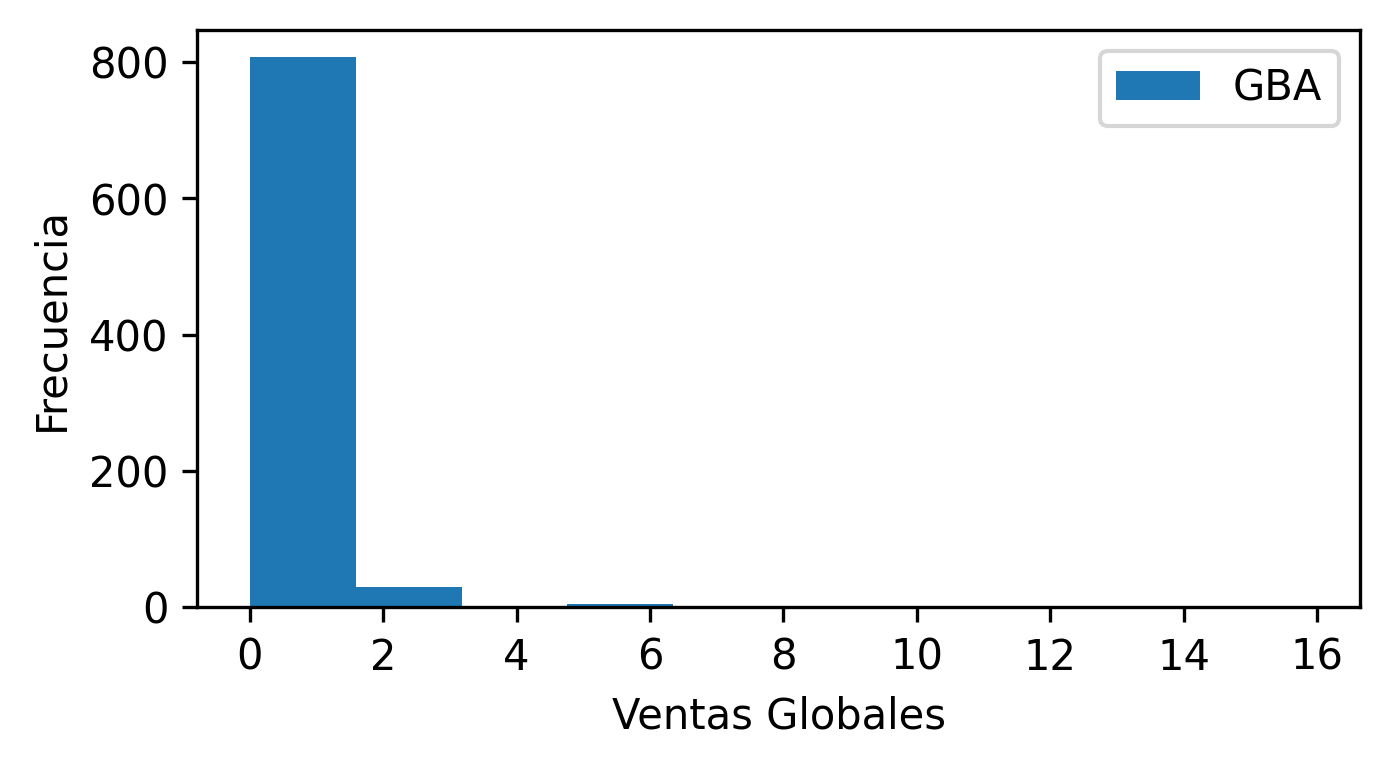

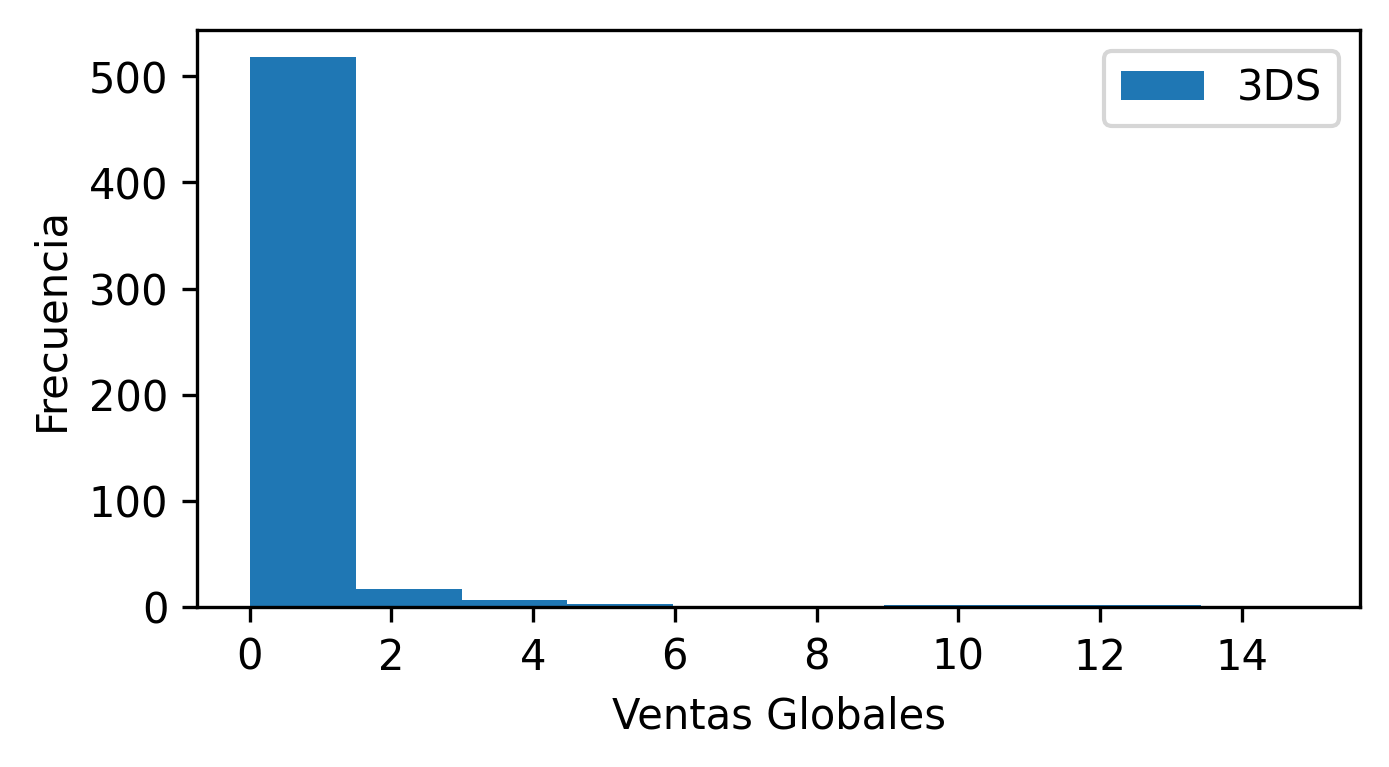

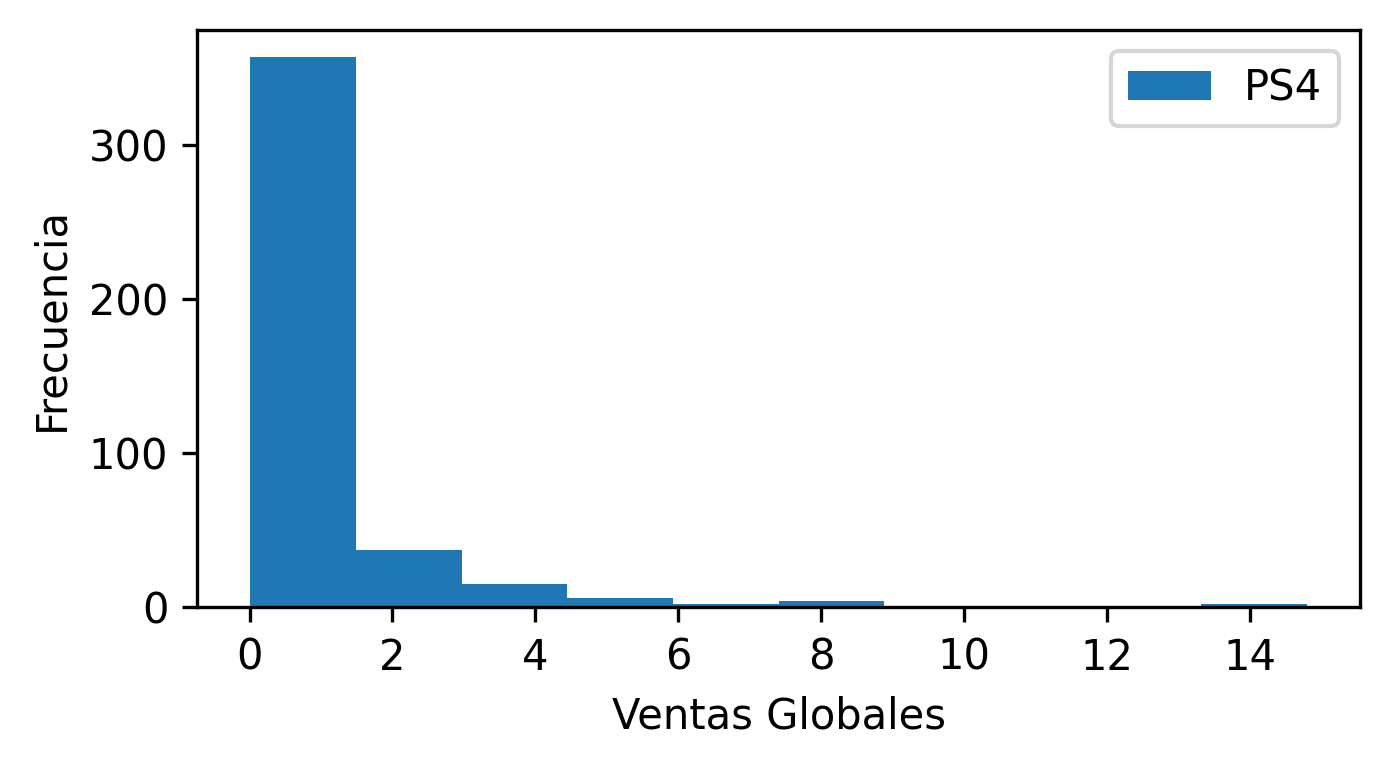

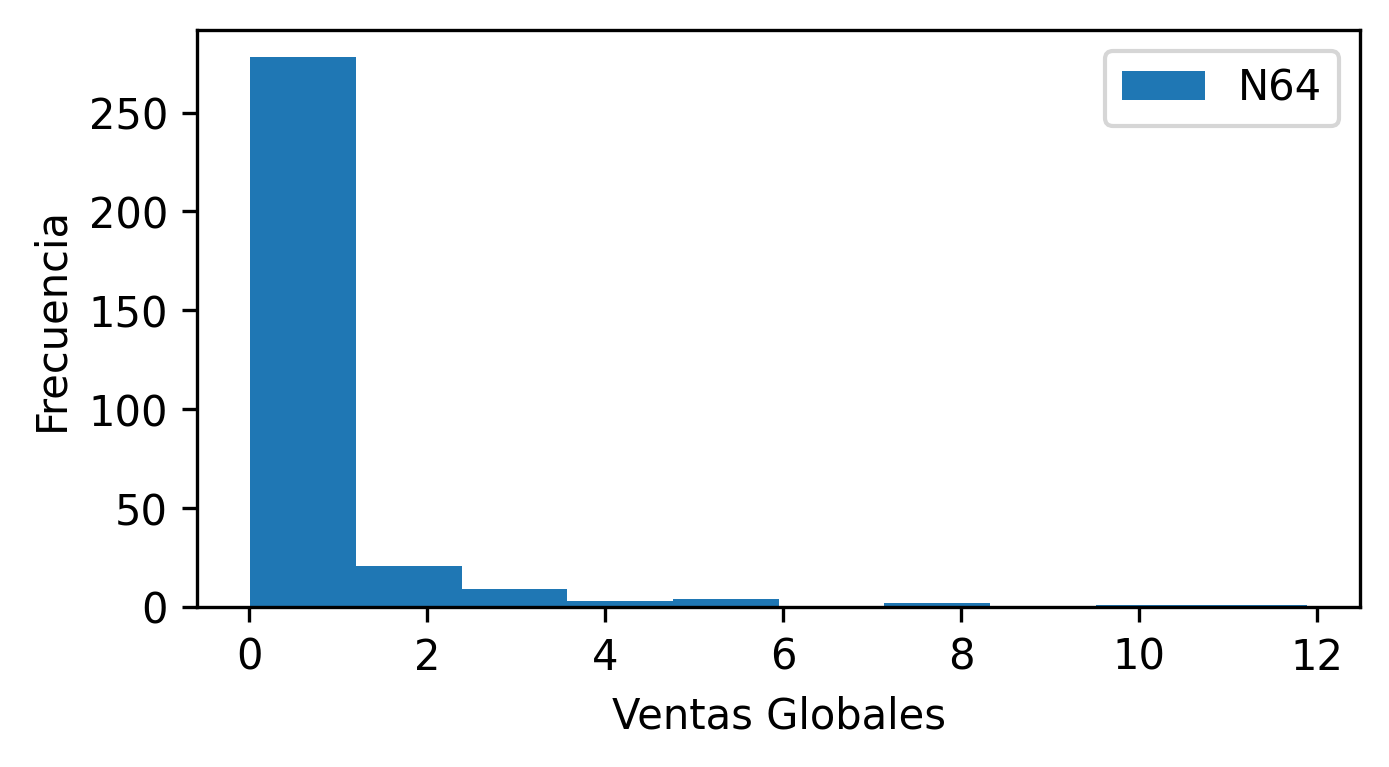

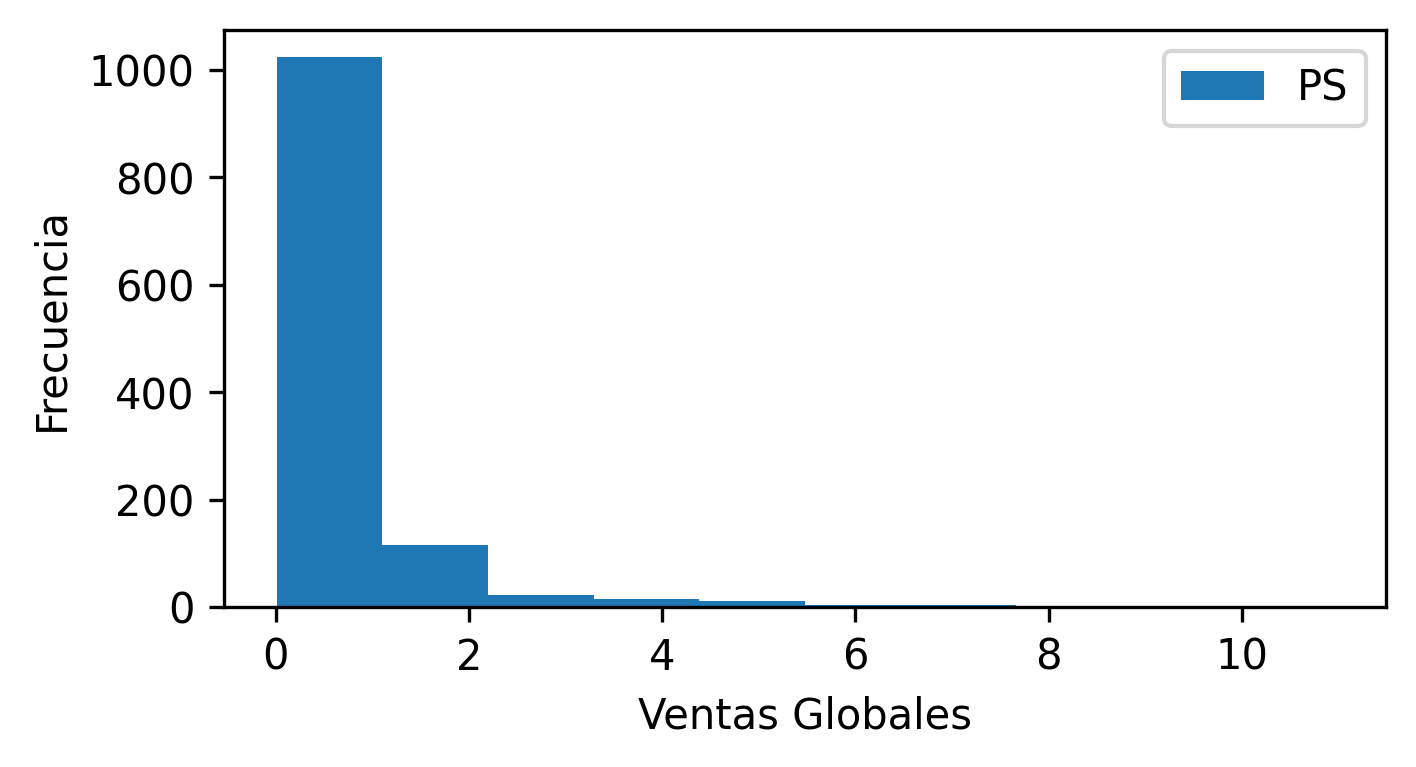

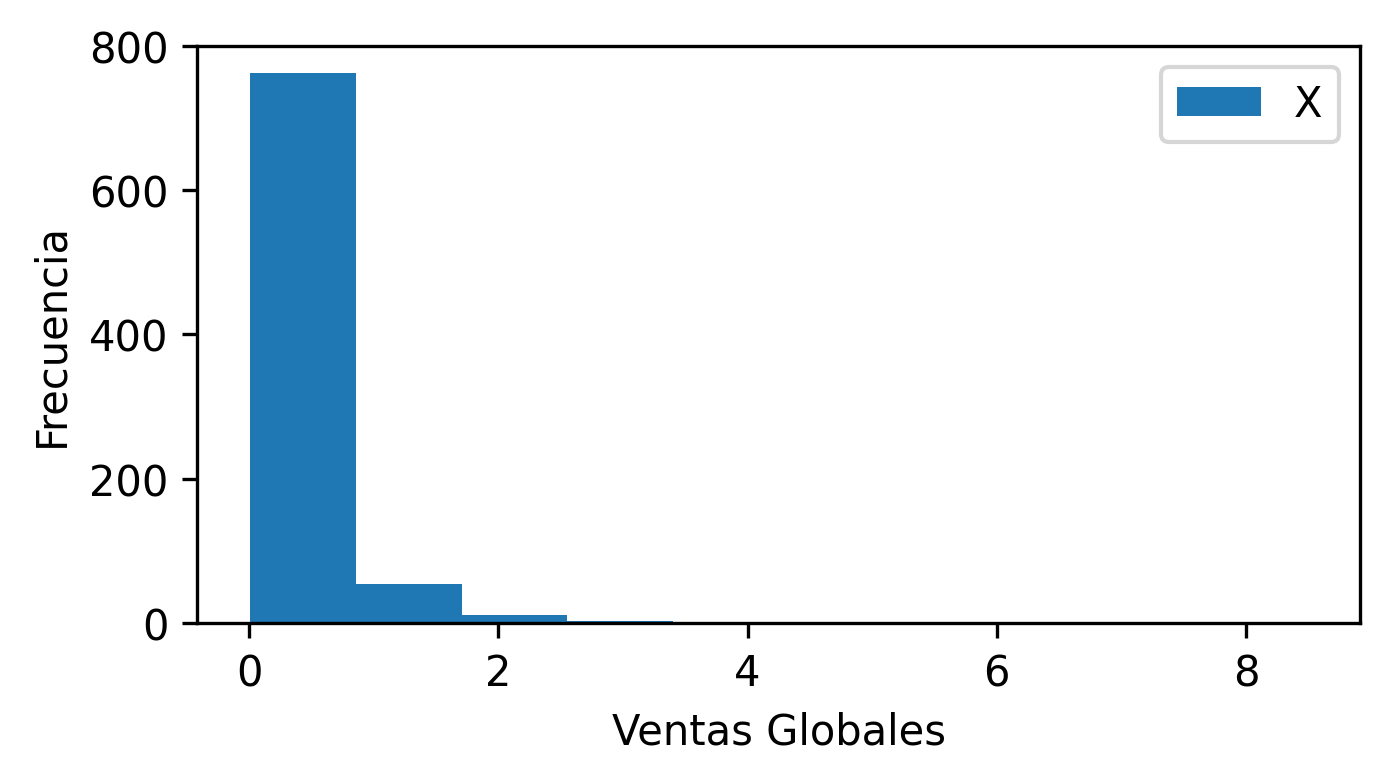

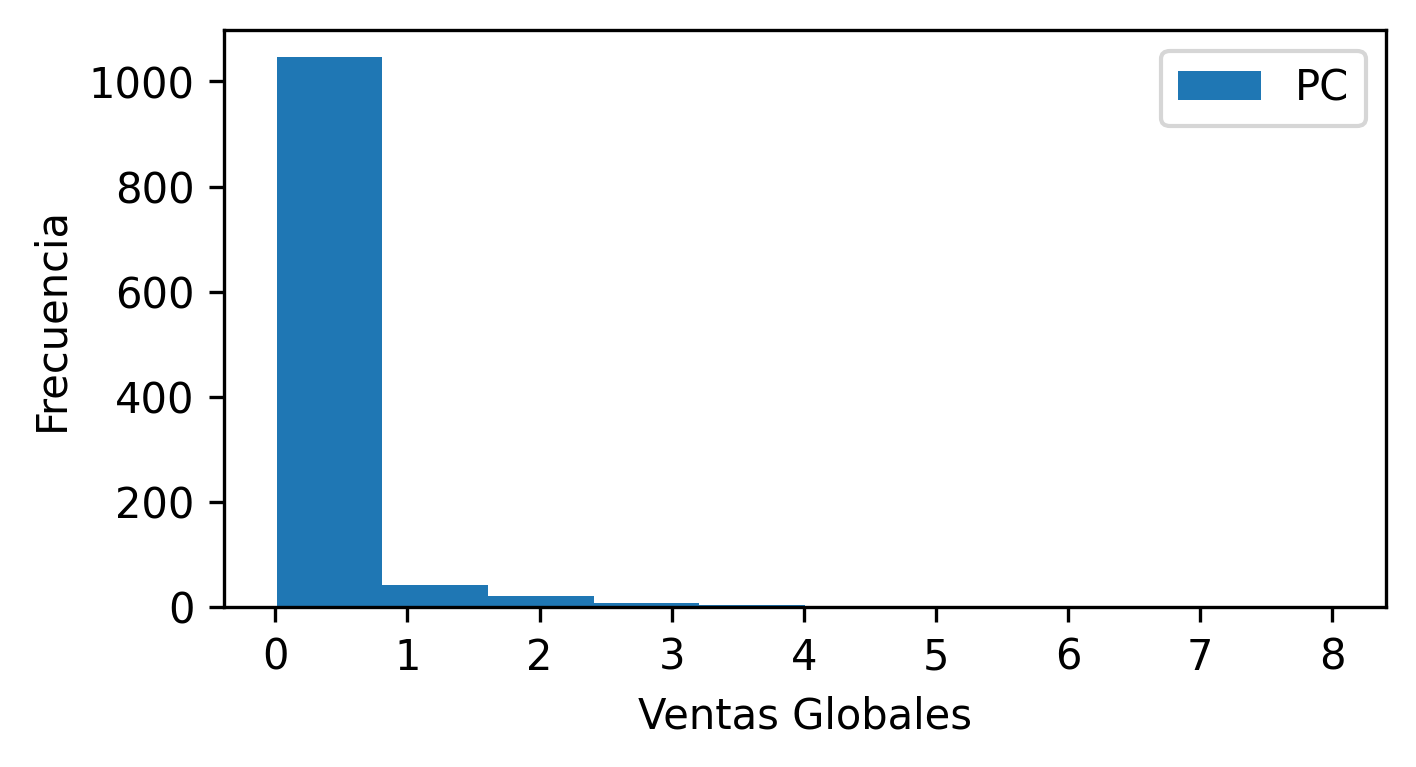

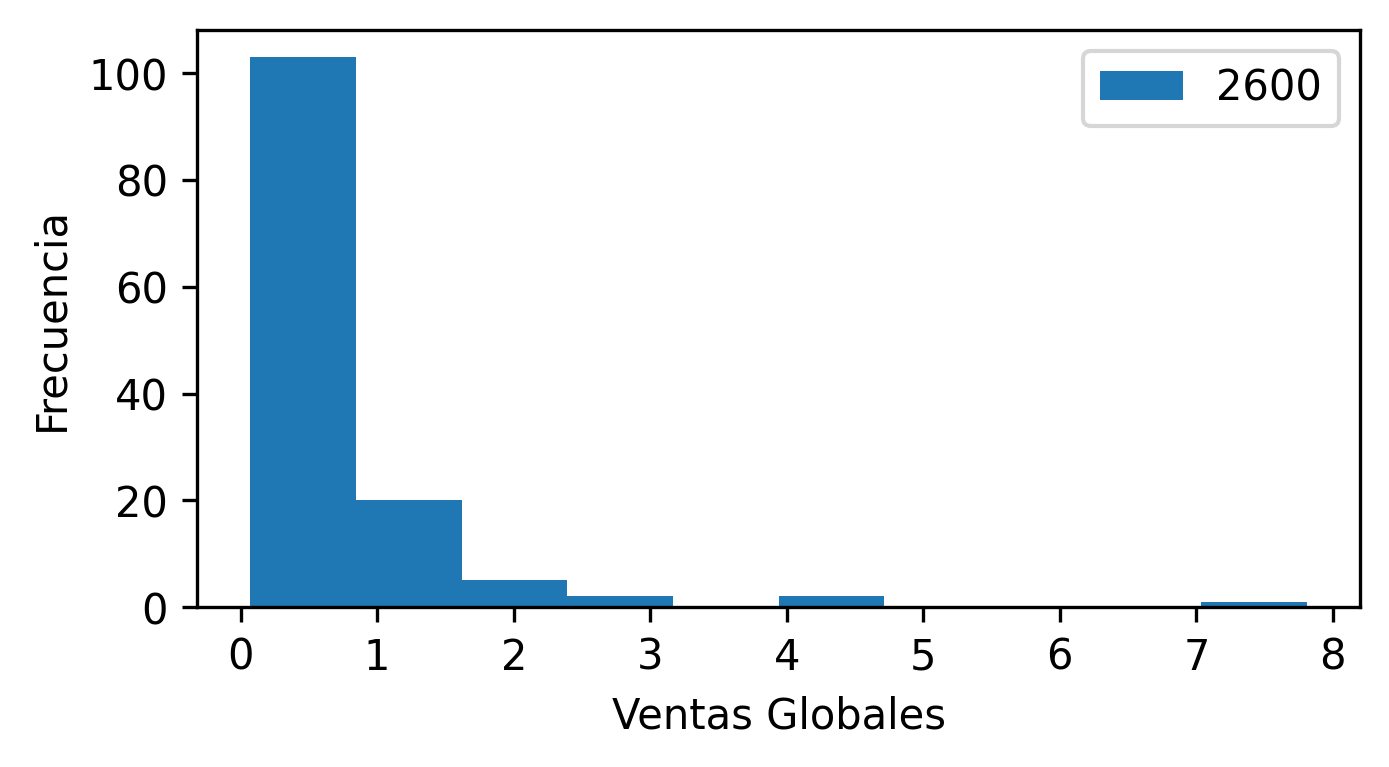

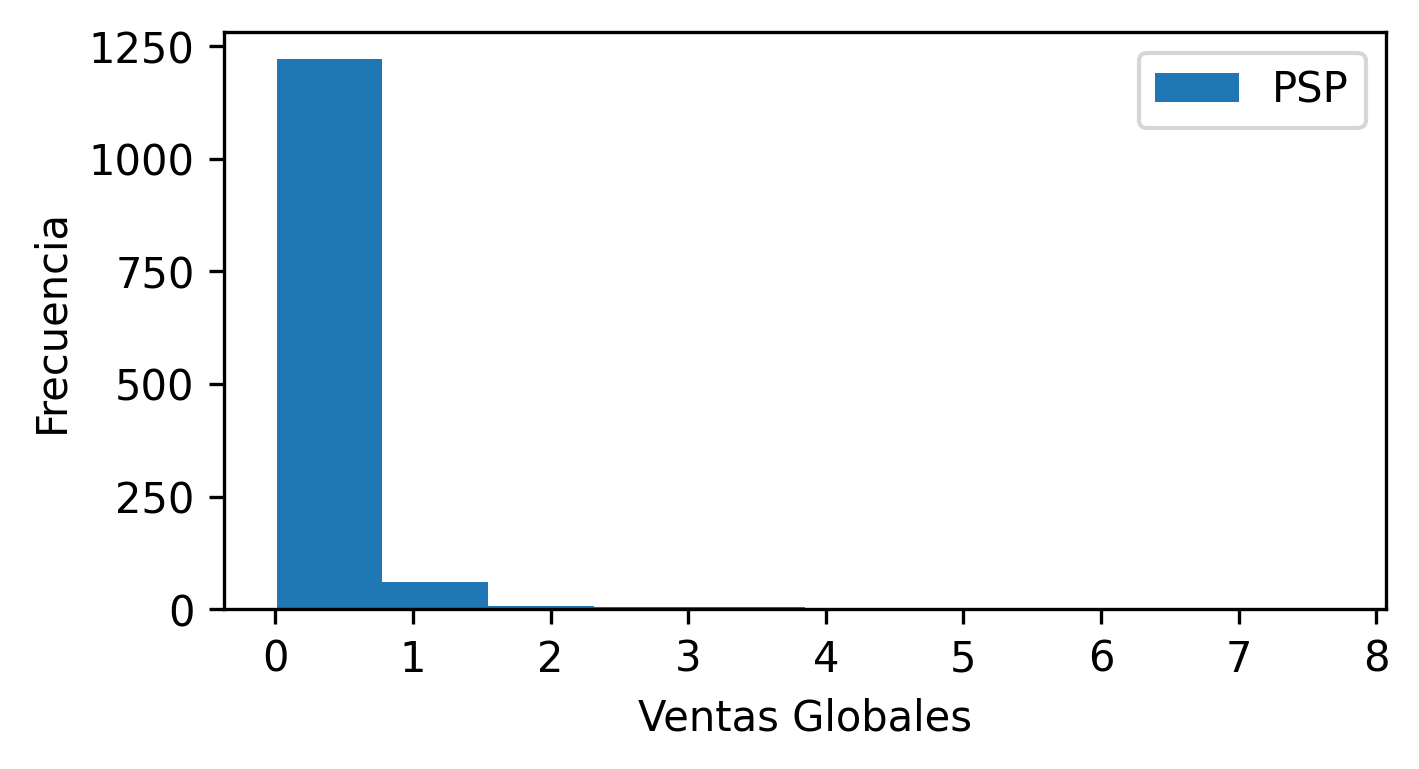

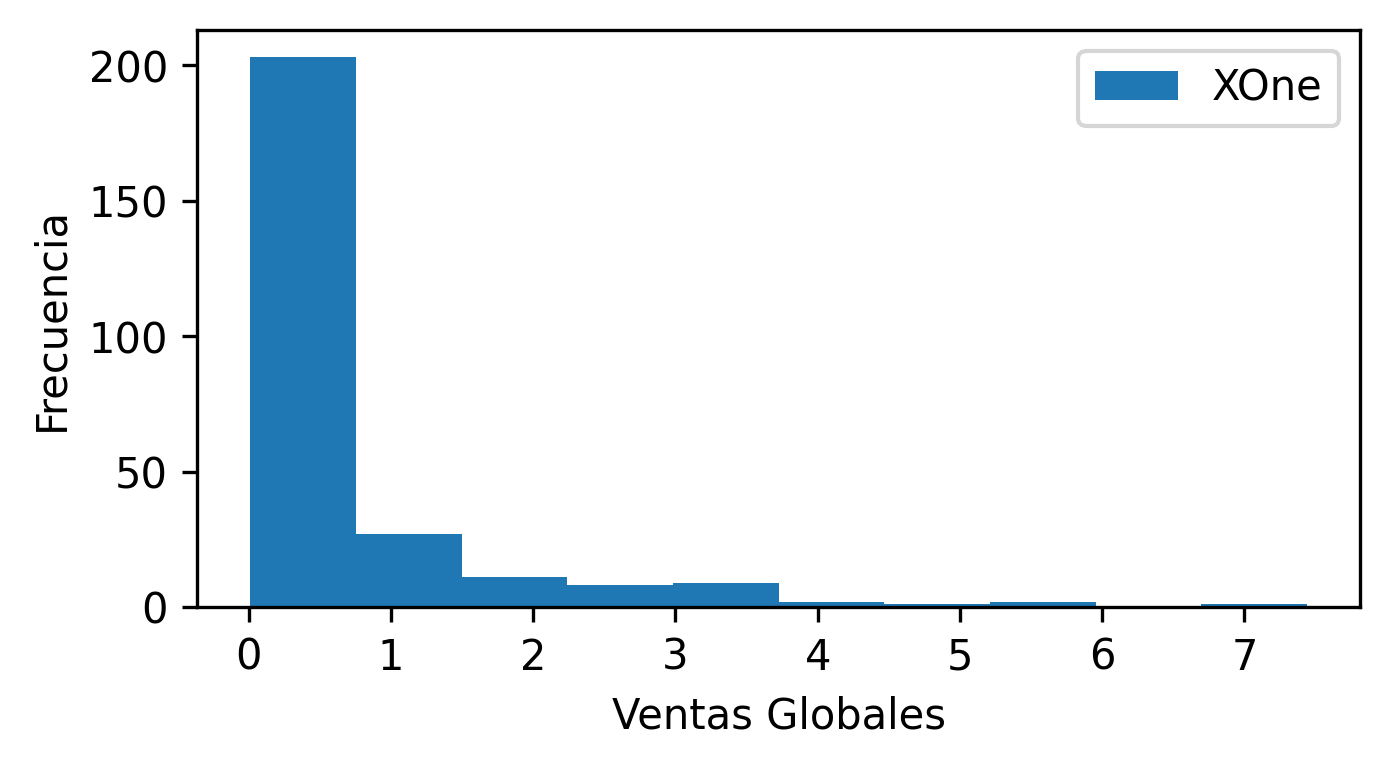

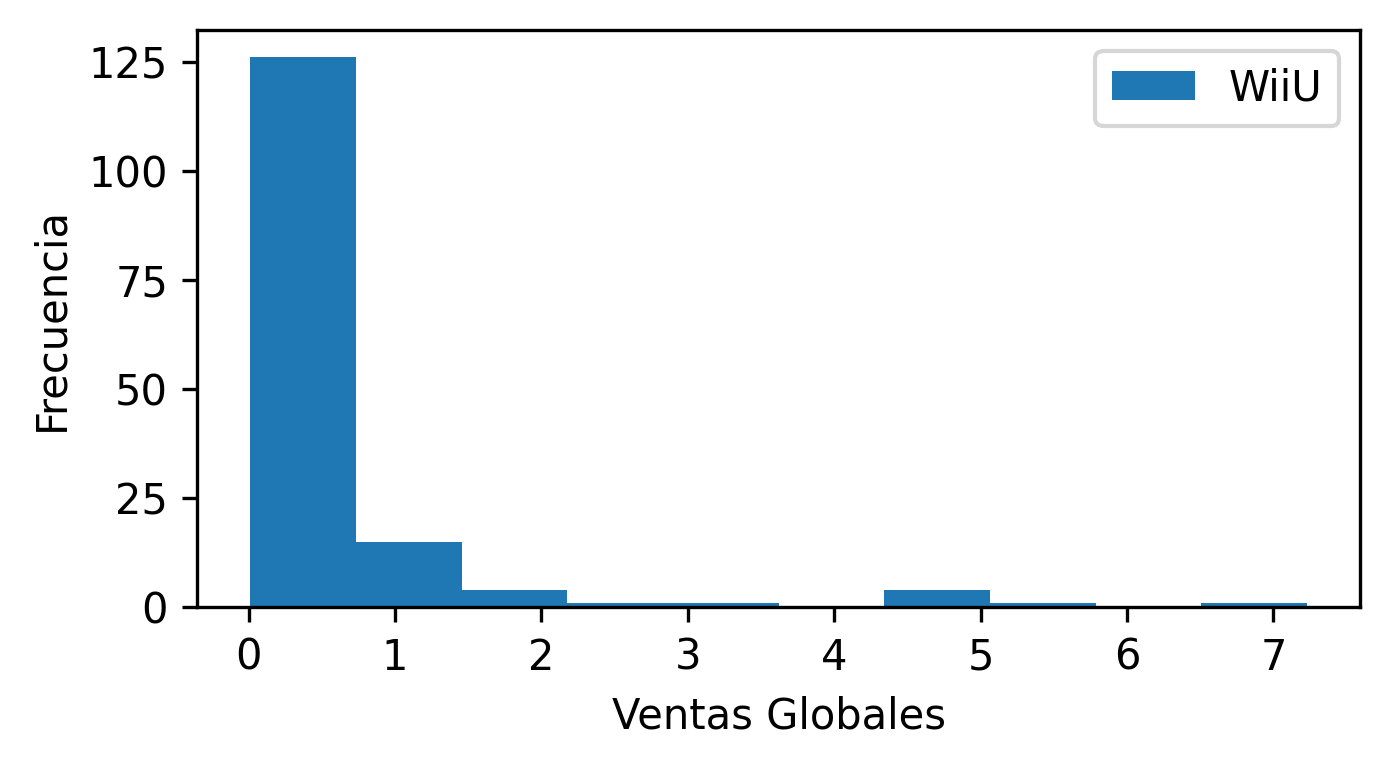

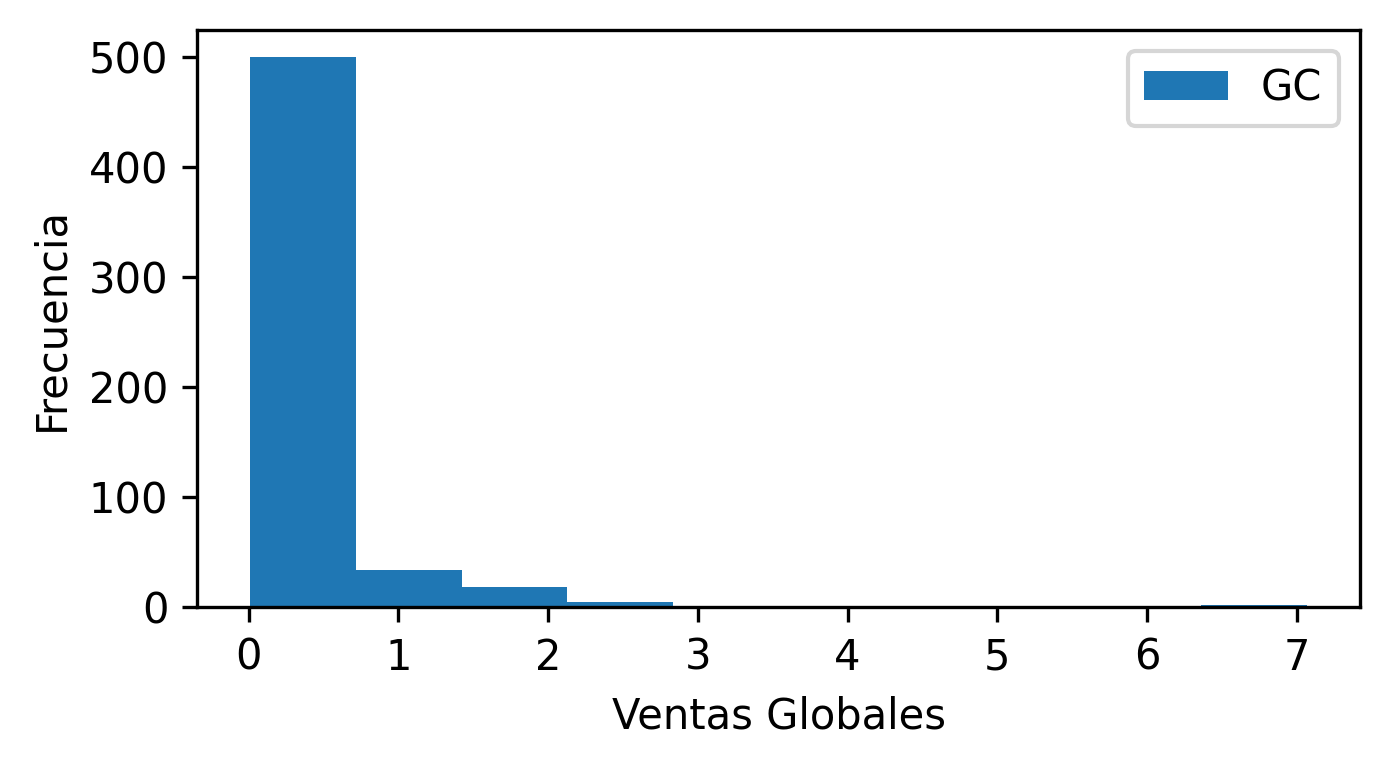

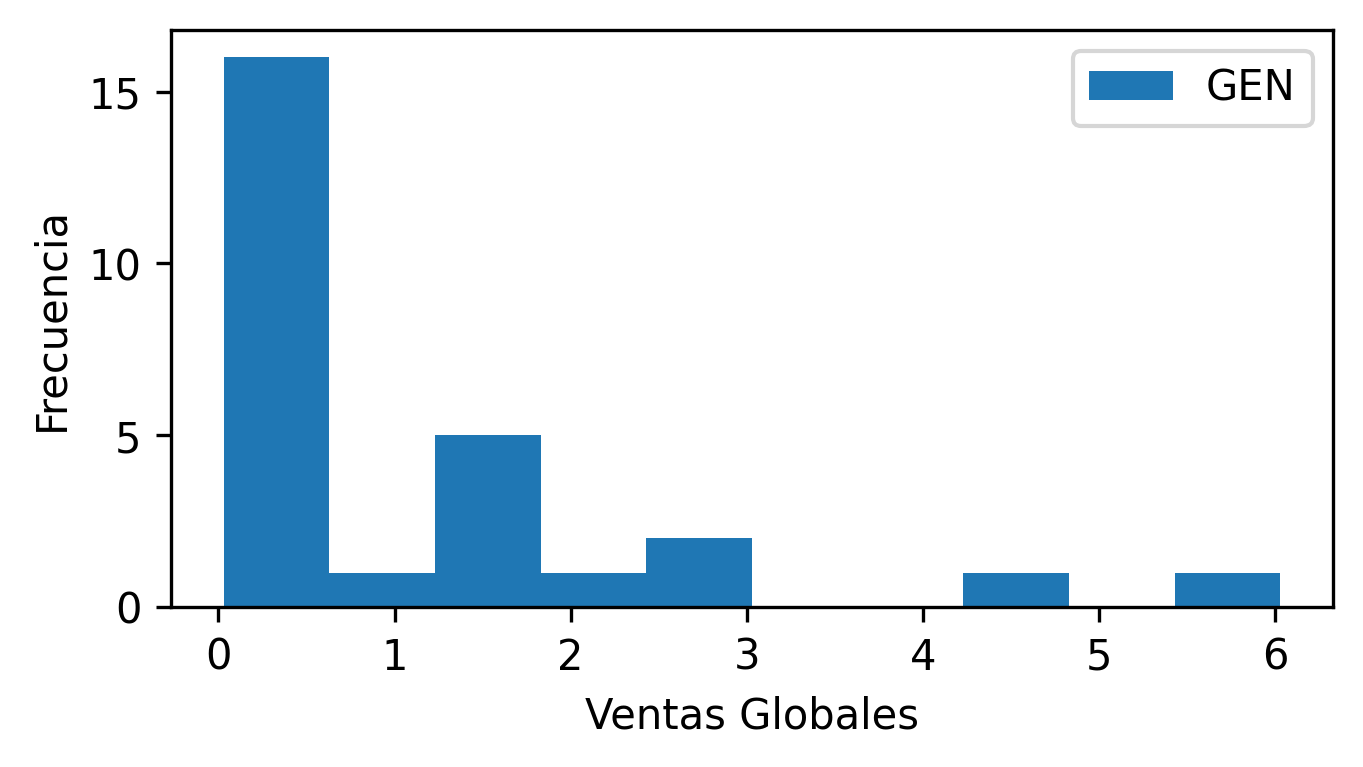

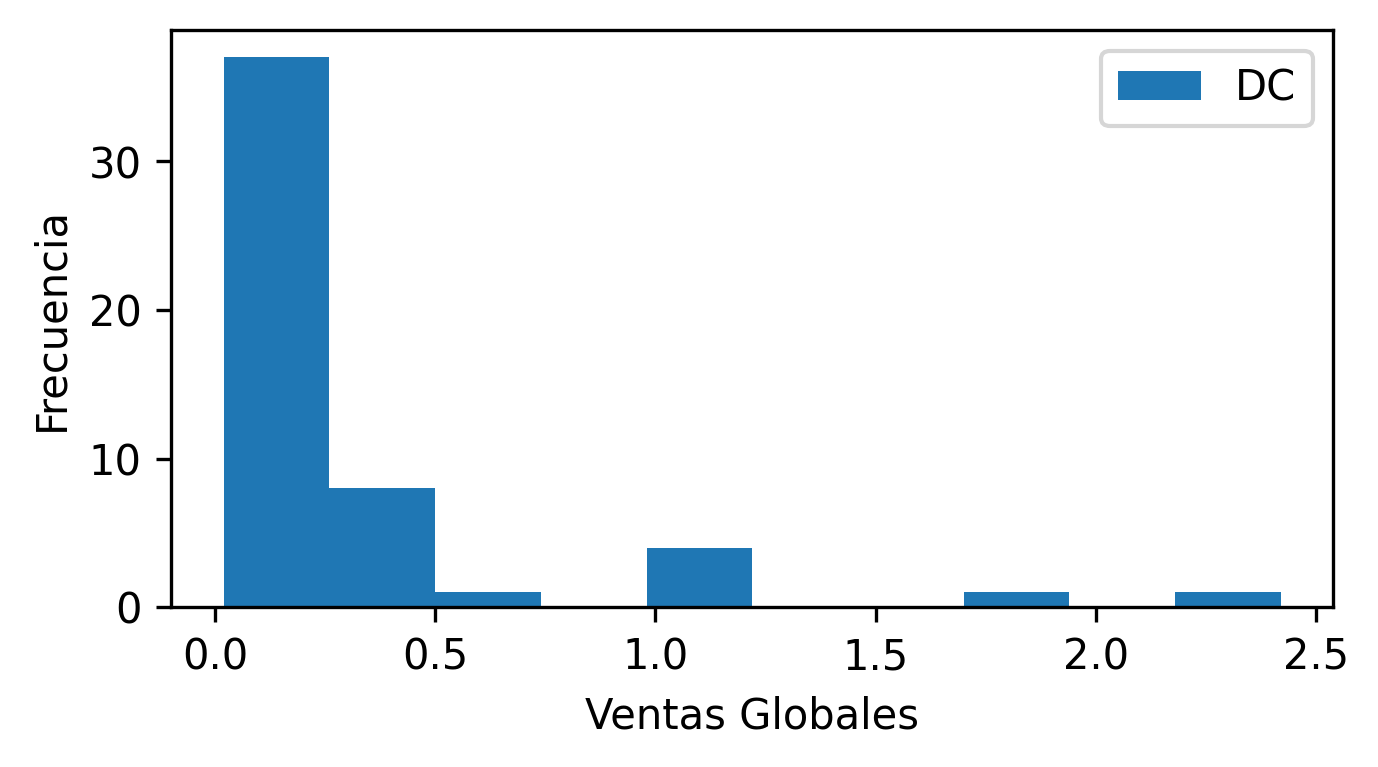

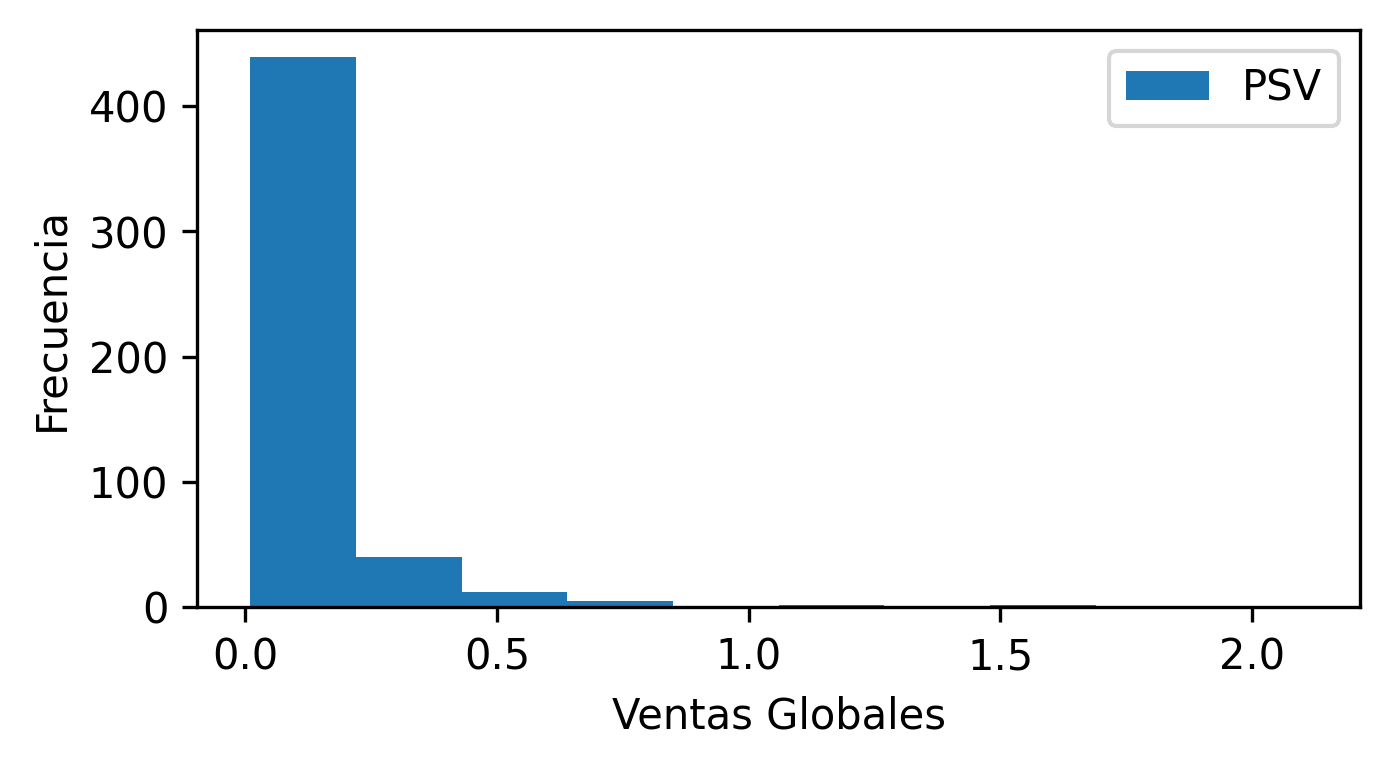

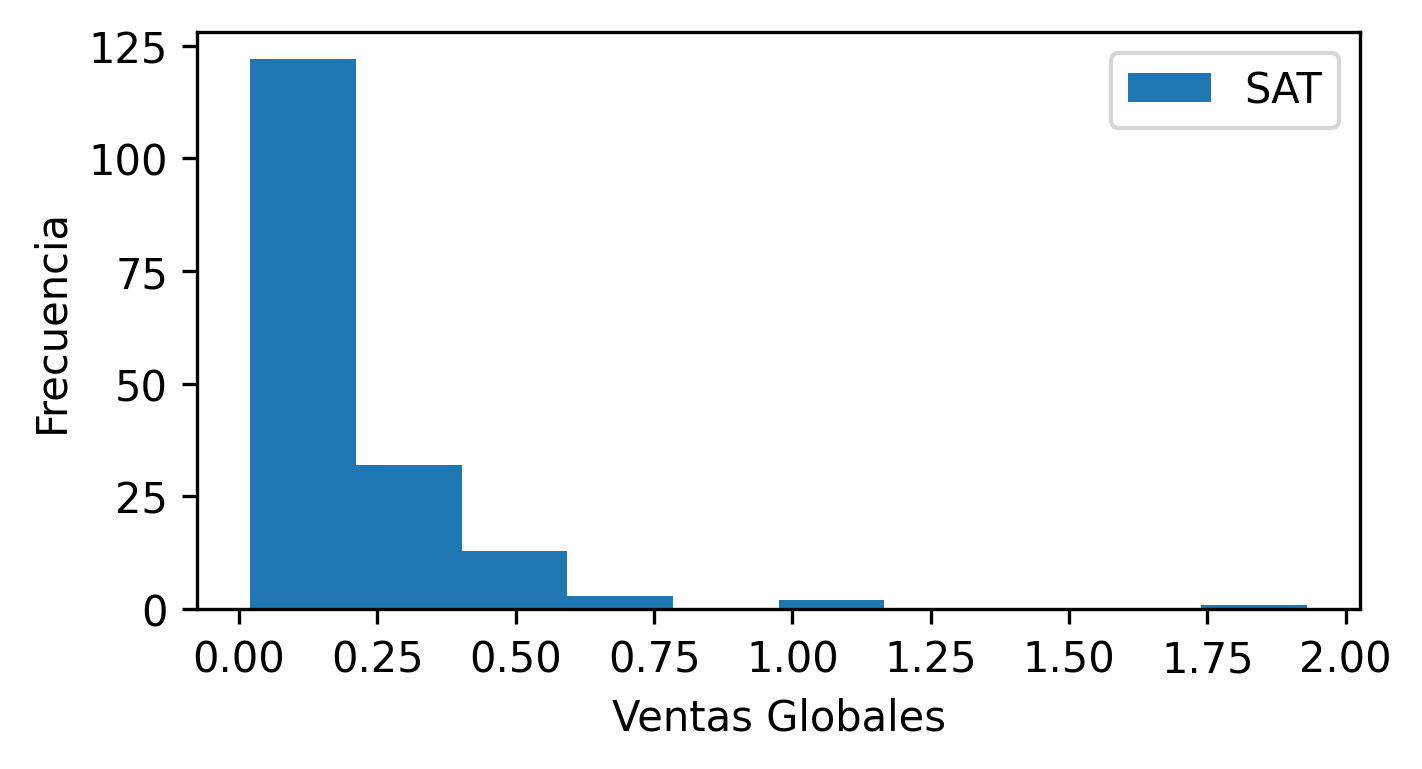

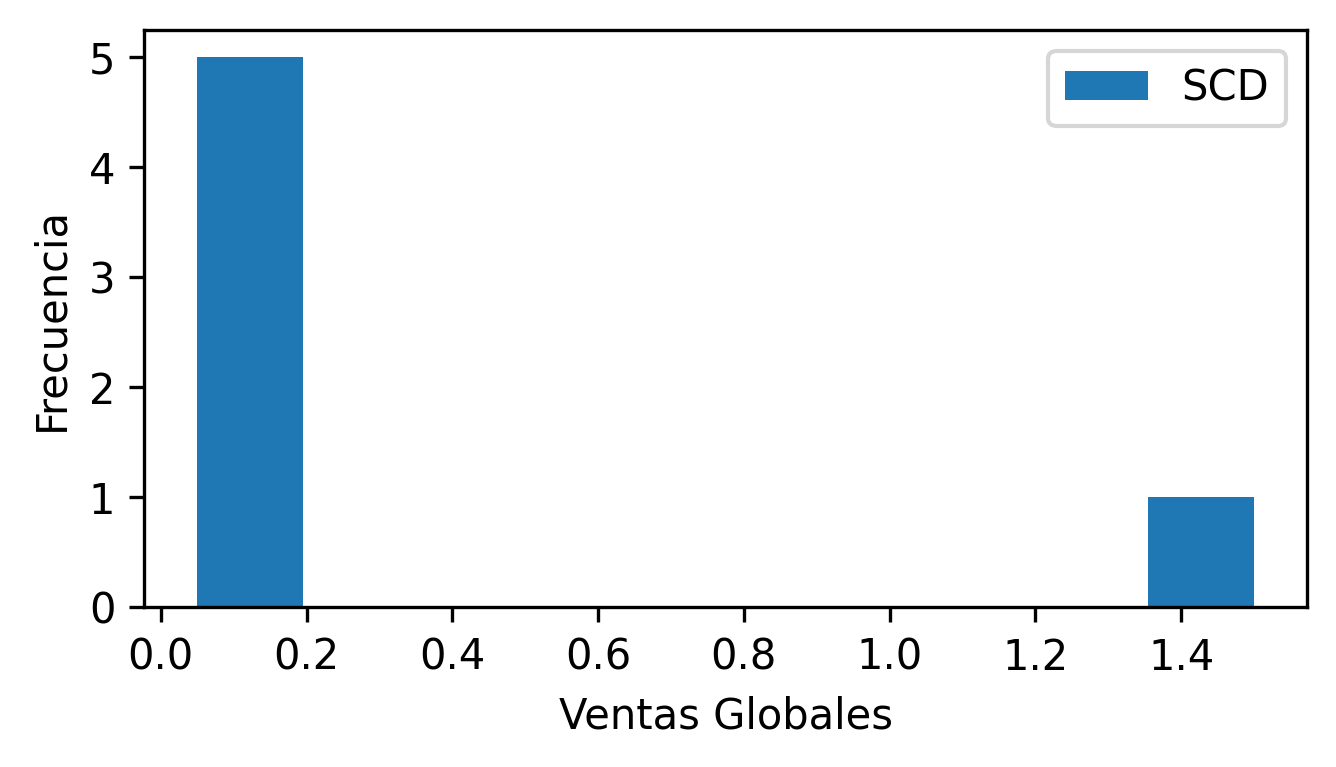

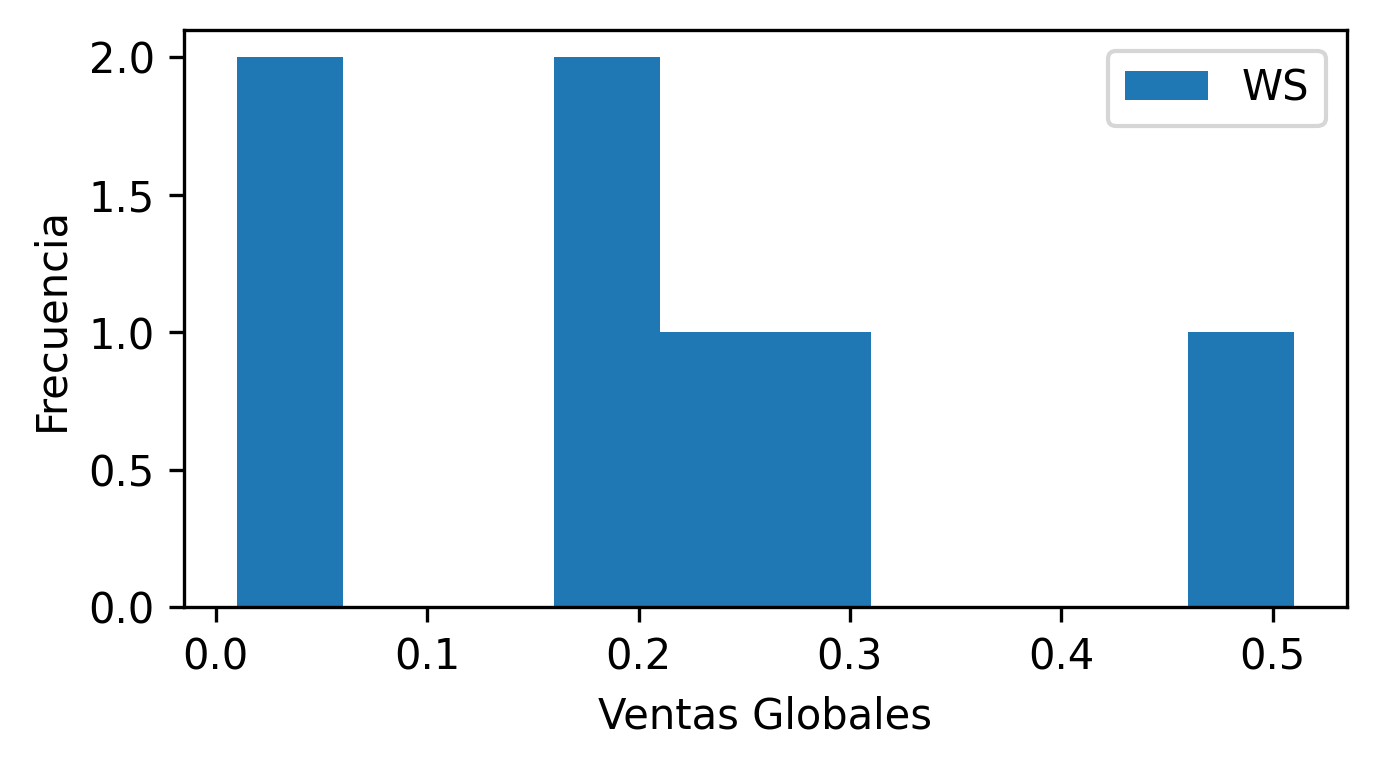

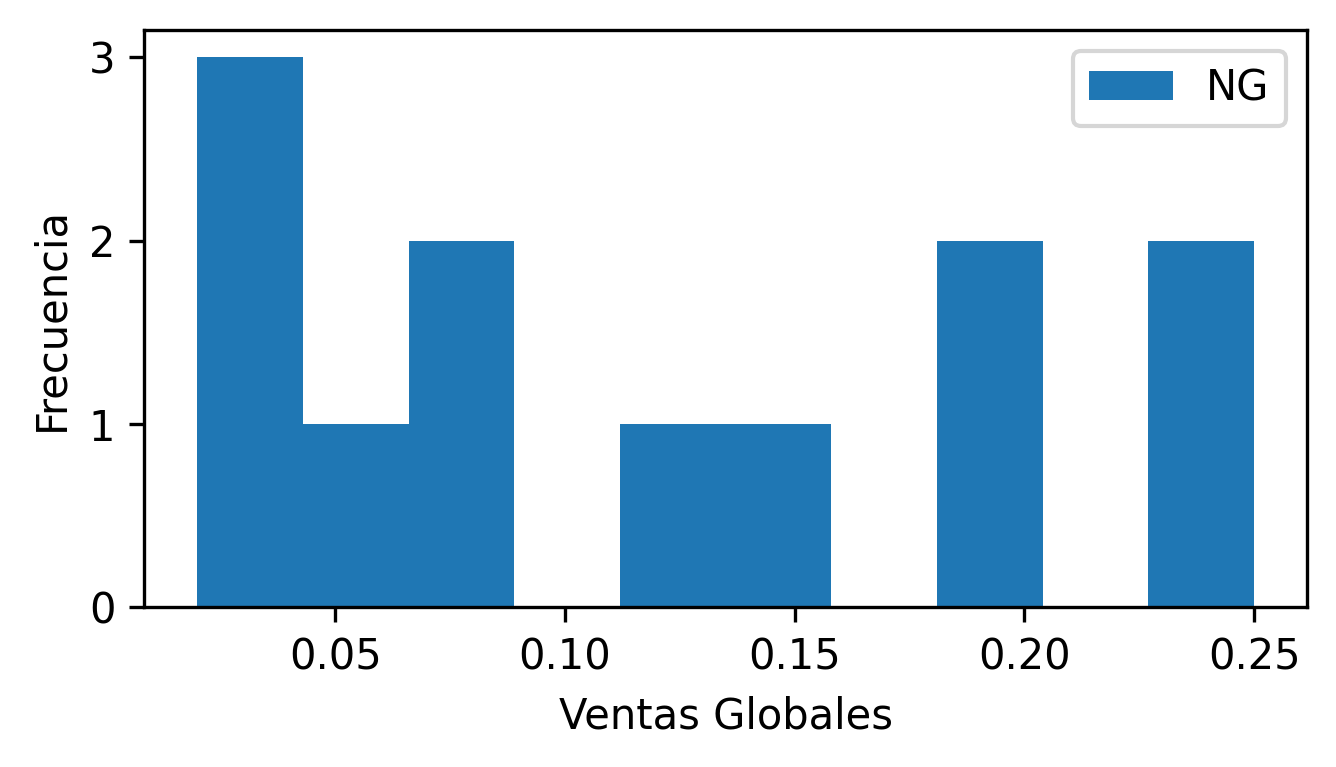

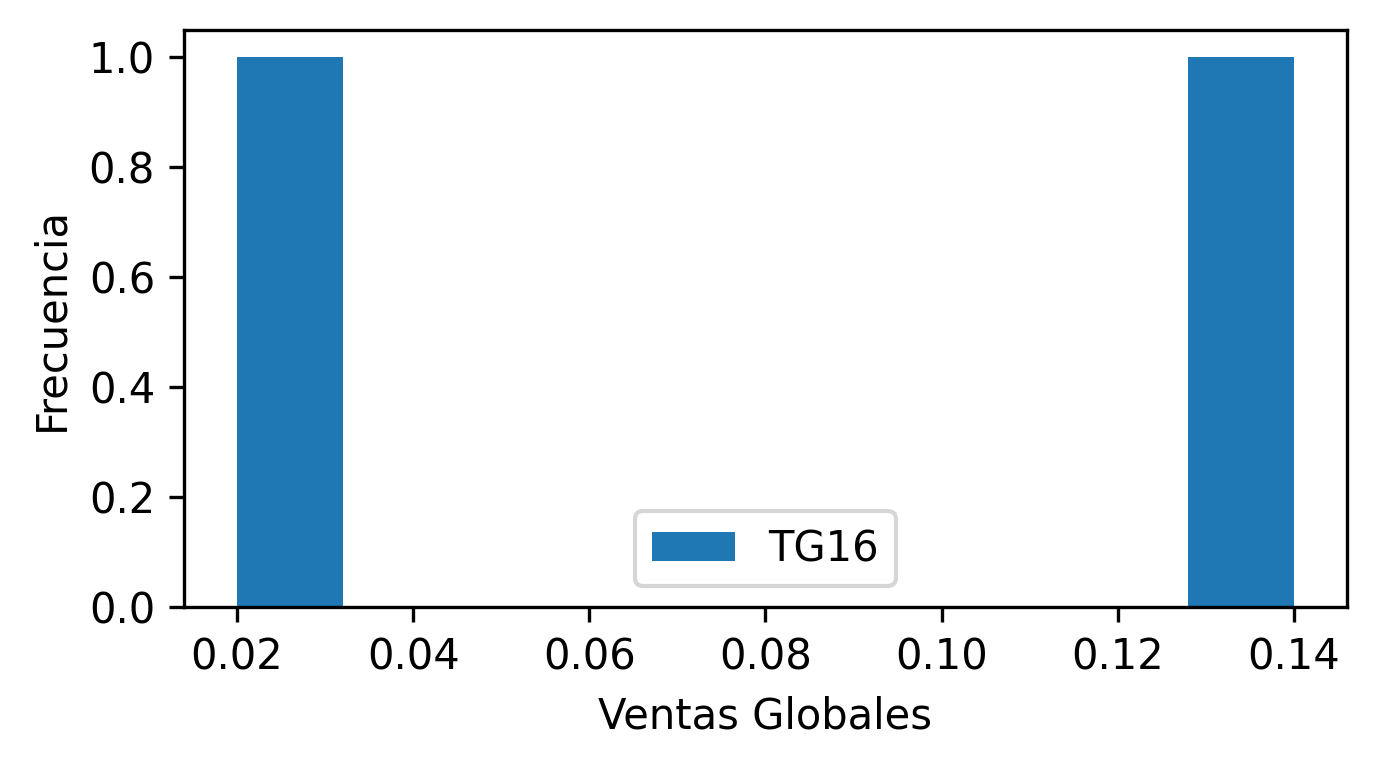

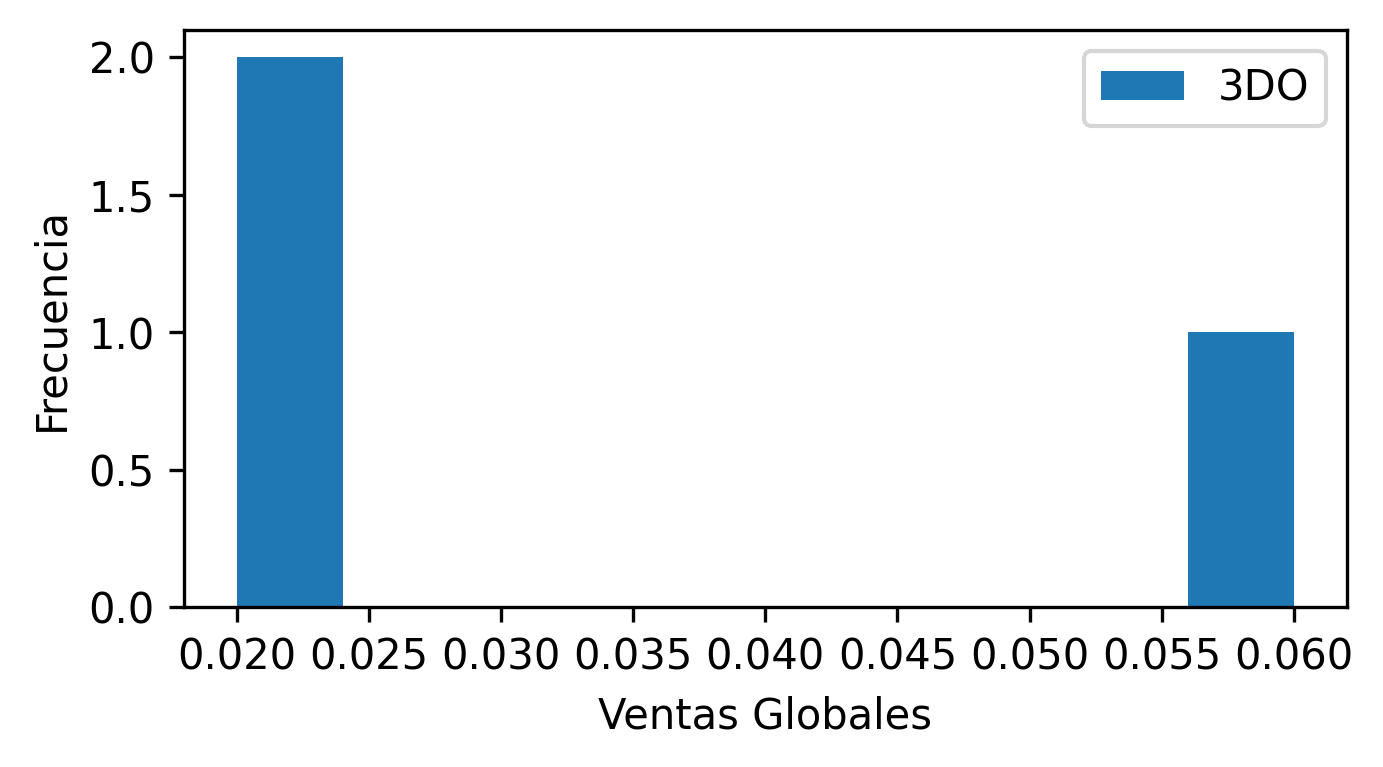

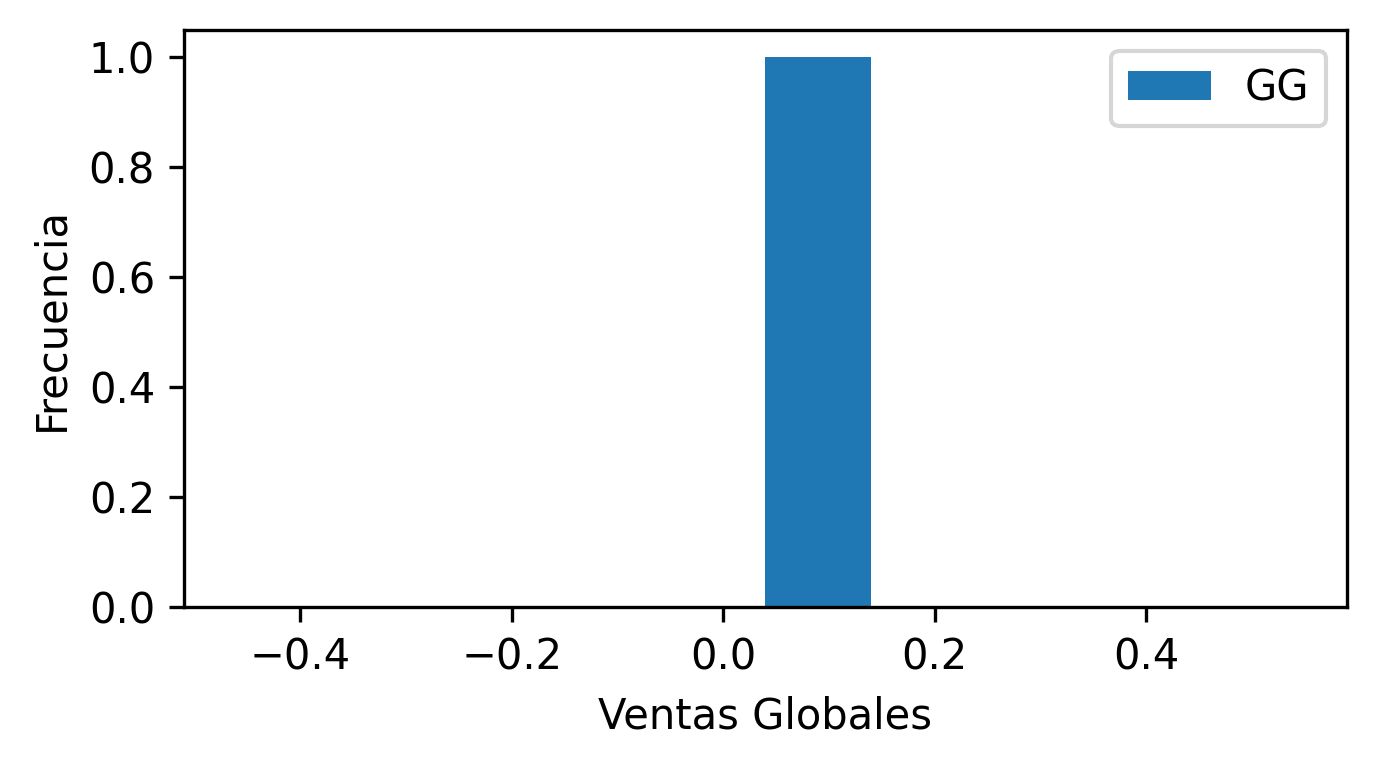

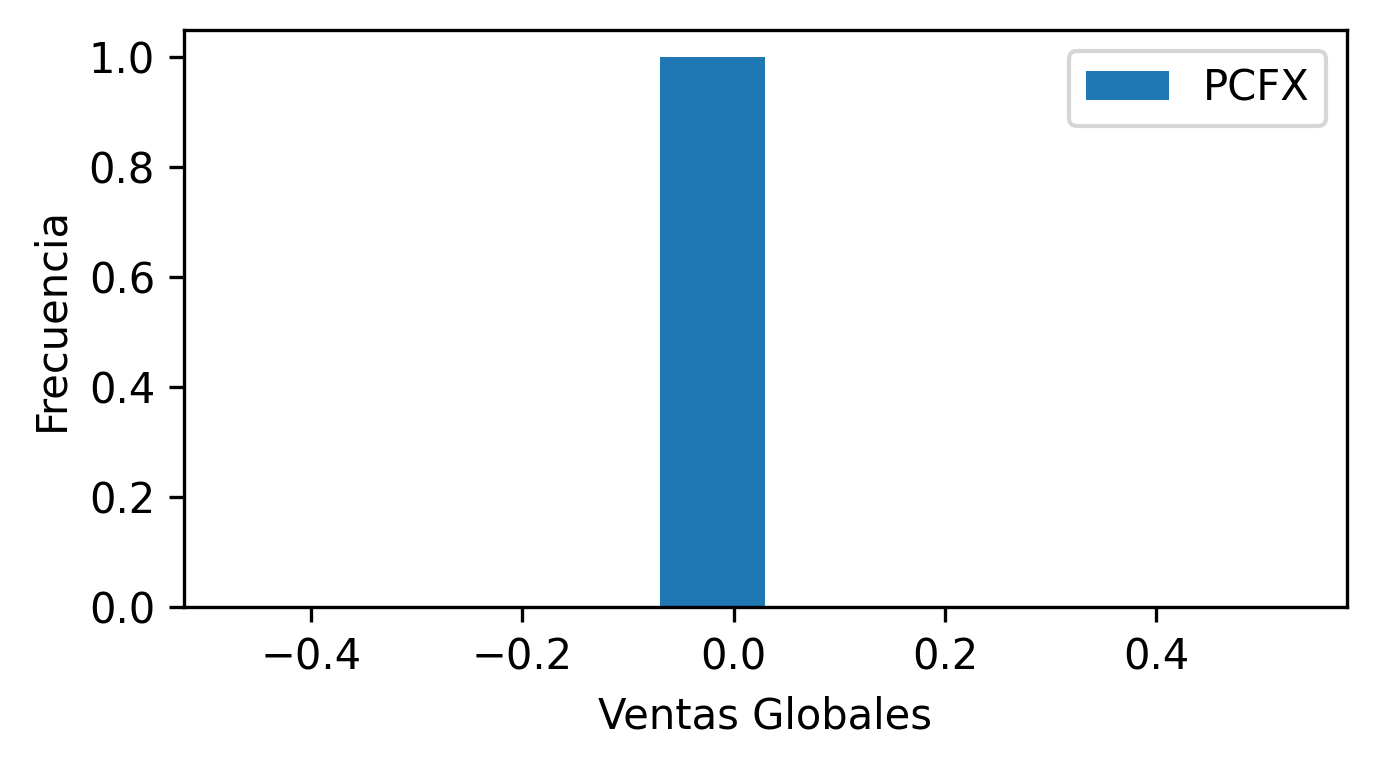

In [15]:
# P2
# a
global_sales_platform = vj_df[['Global_Sales','Platform']]


for genre in global_sales_platform['Platform'].unique():
    genre_df = global_sales_platform[global_sales_platform['Platform'] == genre]
    fig, ax = plt.subplots(dpi = 300, figsize = (5,2.5) )
    ax.hist(genre_df['Global_Sales'], label = genre)
    ax.set_xlabel('Ventas Globales')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    plt.show()



<ipython-input-3-8645382b1feb>:235: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


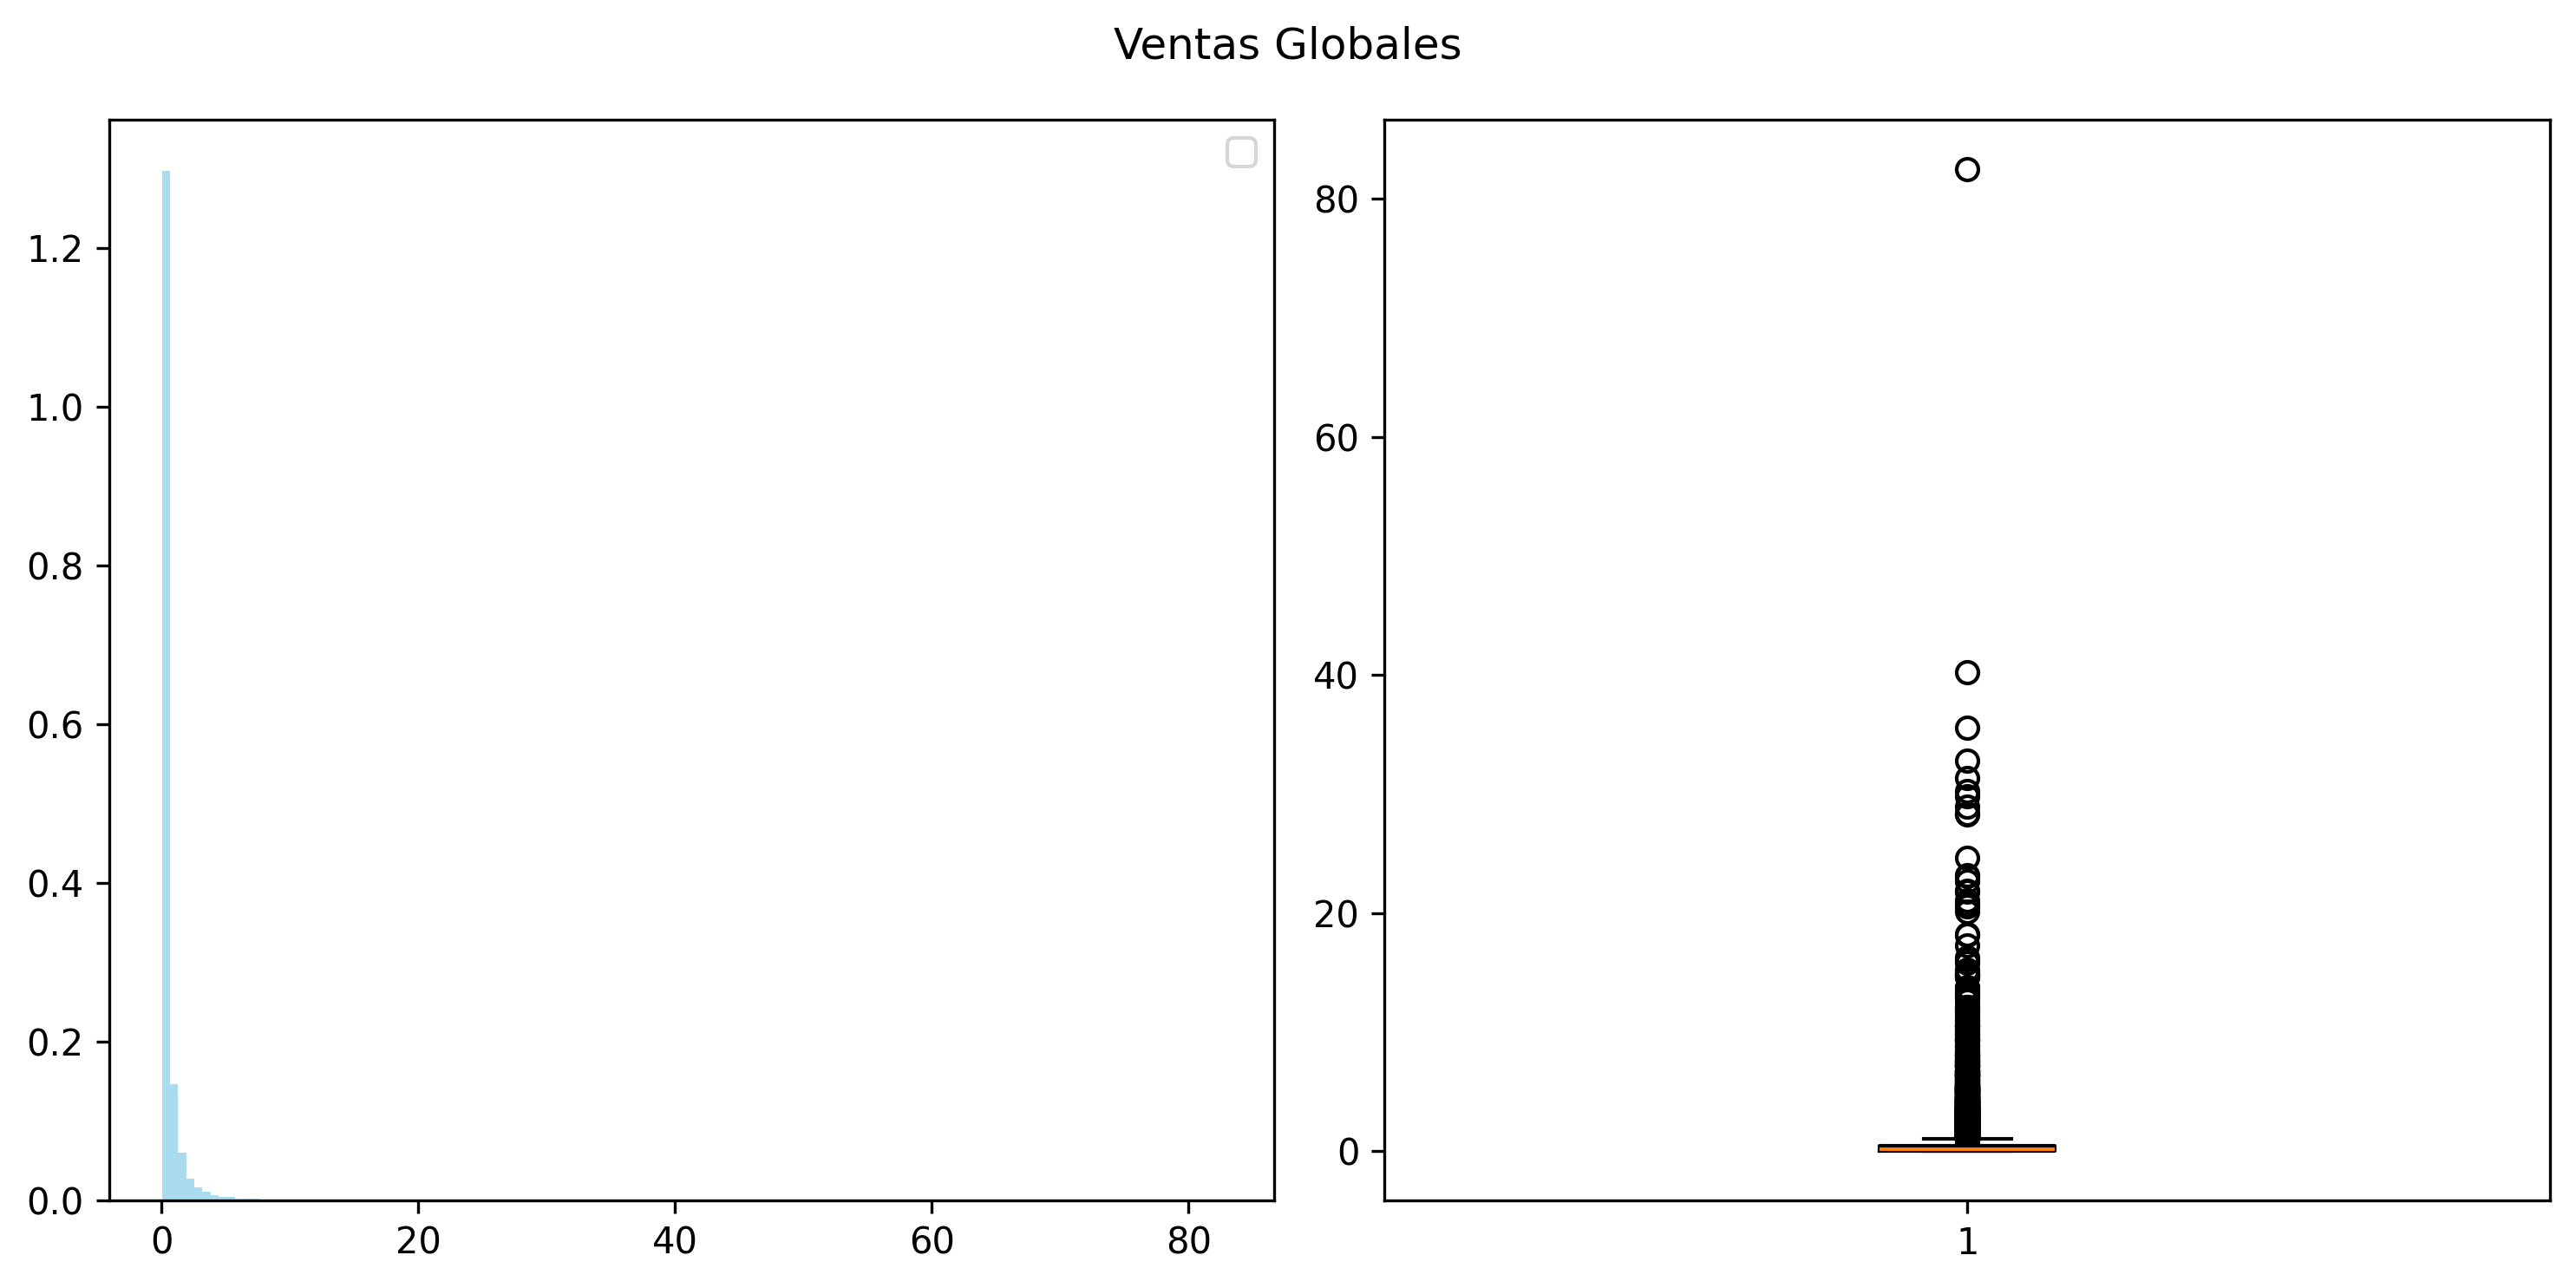

In [16]:
# P2
# a

global_sales_platform = vj_df[['Global_Sales']].dropna()
histogram_boxplot(global_sales_platform['Global_Sales'],
                  mean = False, median = False, mode = False , titulo_general = 'Ventas Globales')

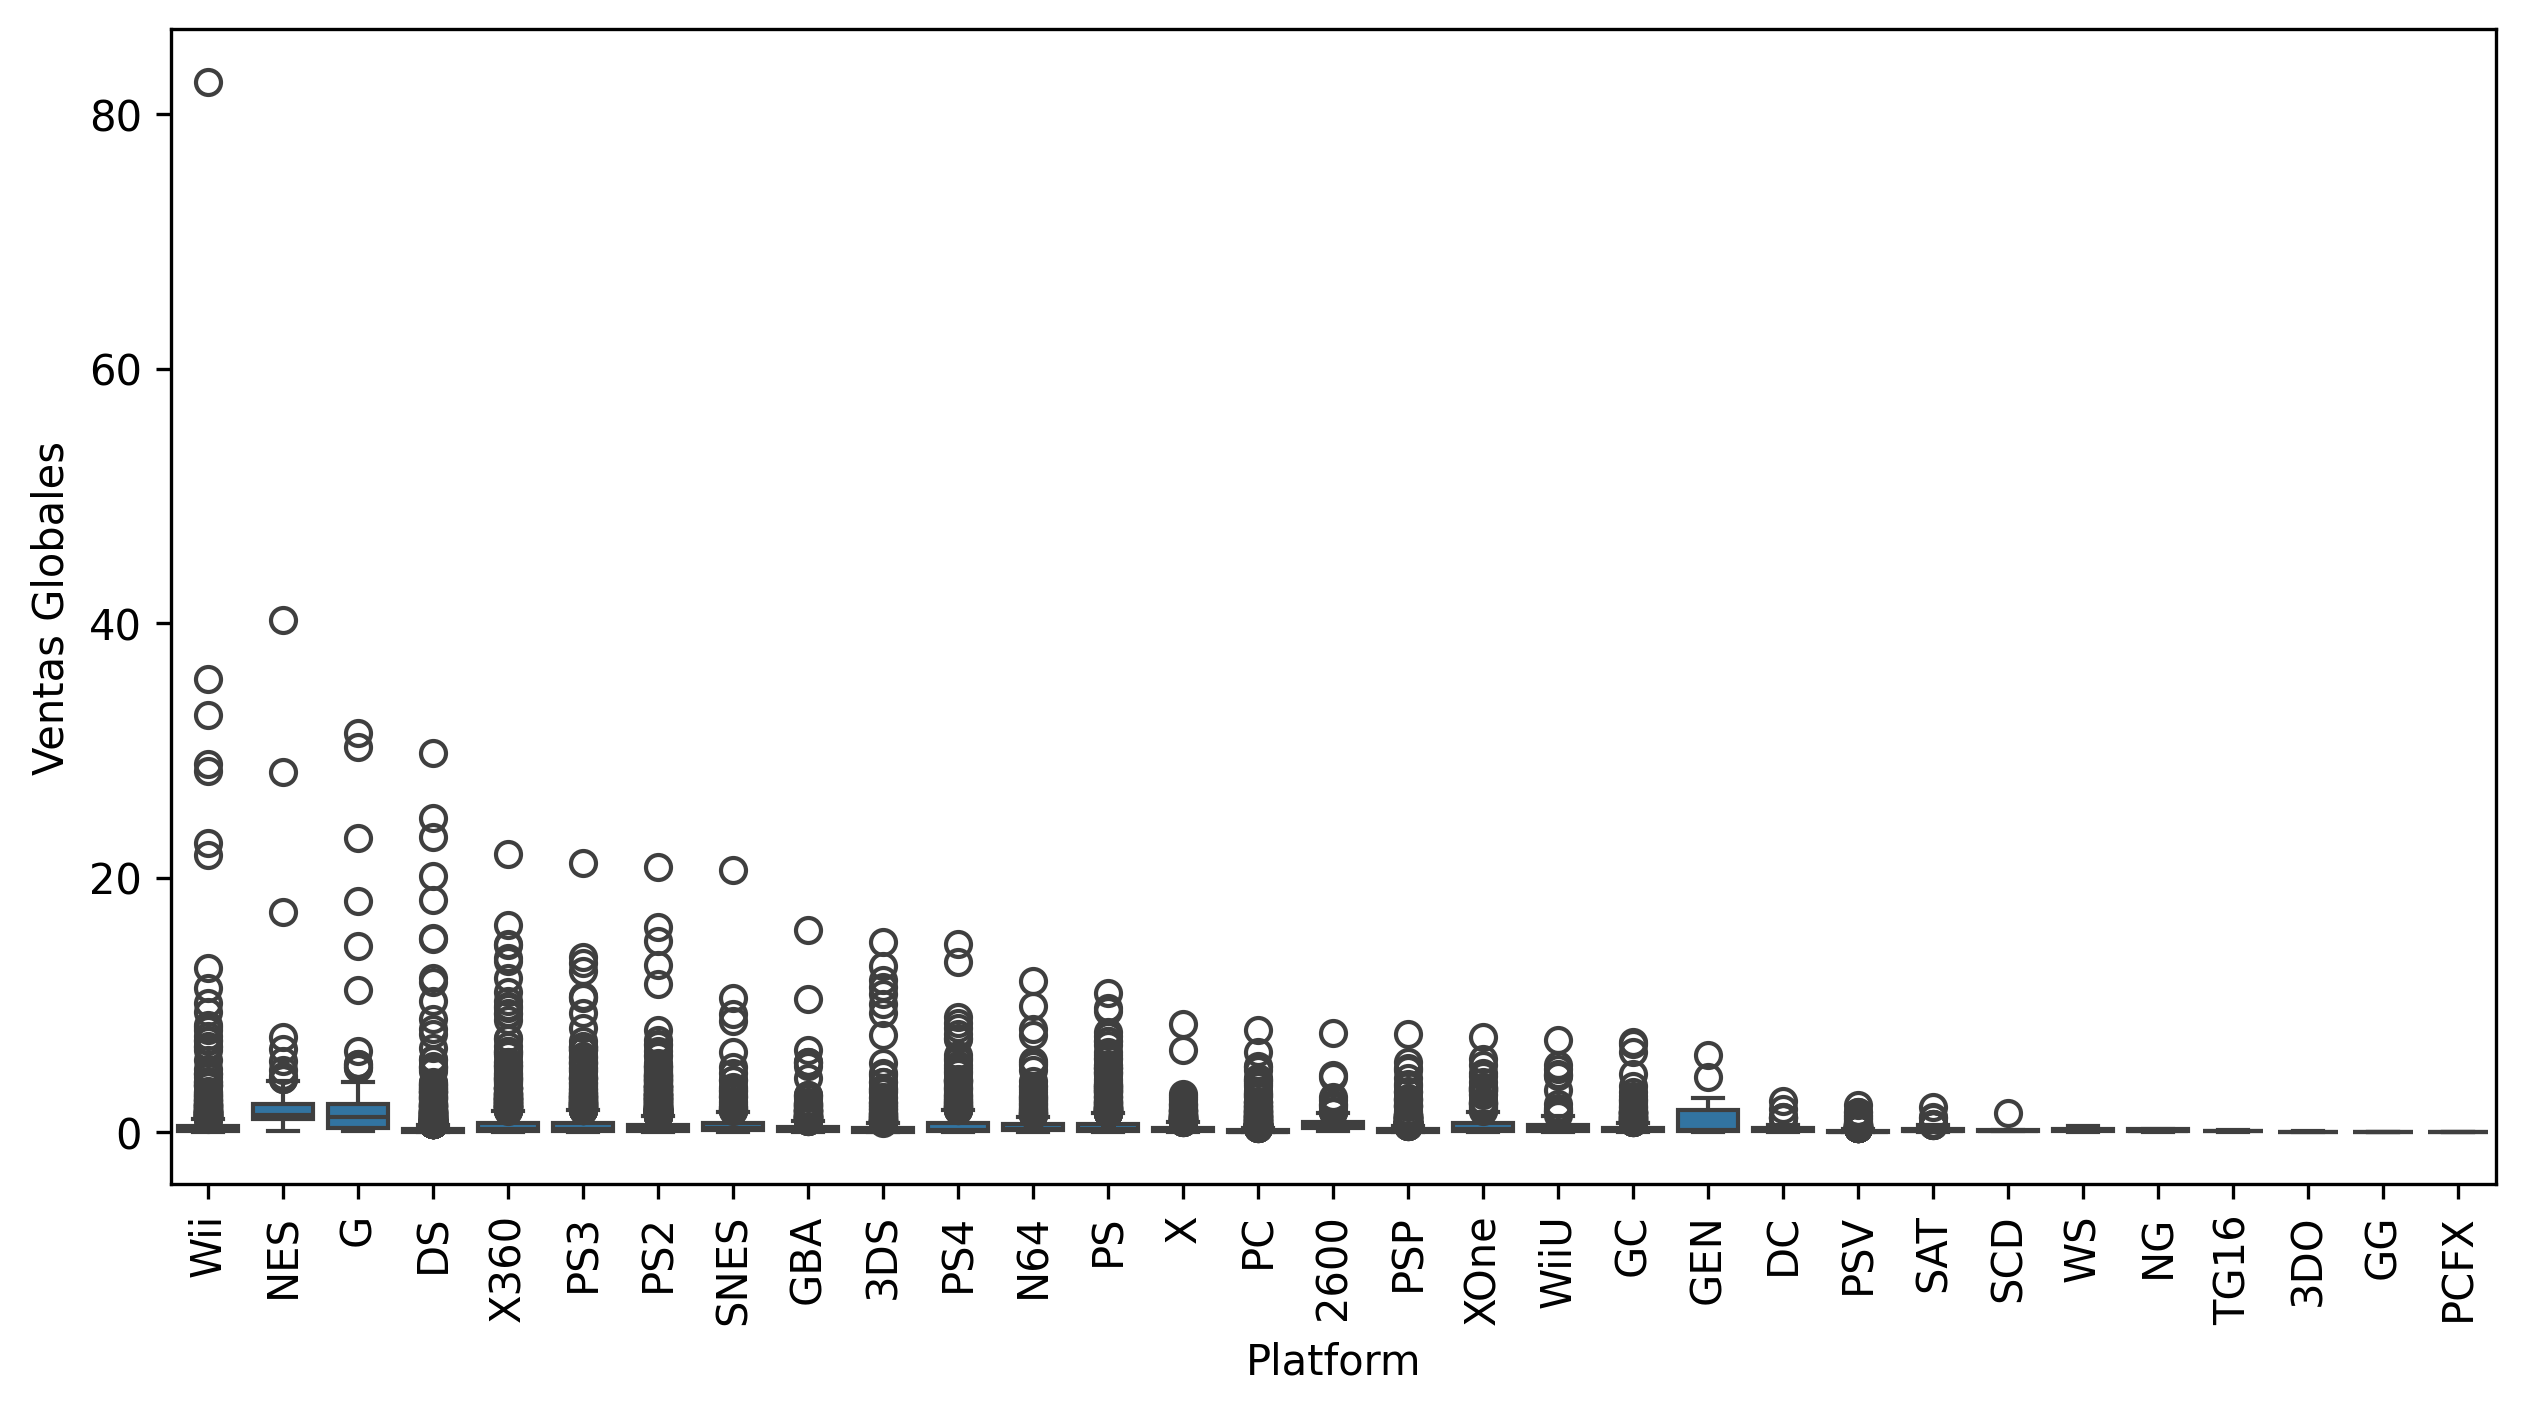

In [17]:
# P2
# a
import seaborn as sns
glob = vj_df[['Platform','Global_Sales']]
fig, ax = plt.subplots(dpi = 300, figsize = (10,5))
sns.boxplot(glob, x = 'Platform', y = 'Global_Sales', ax = ax, orient = 'v')
ax.set_xlabel('Platform')
ax.set_ylabel('Ventas Globales')
plt.xticks(rotation = 90)
plt.show()

###P2 b

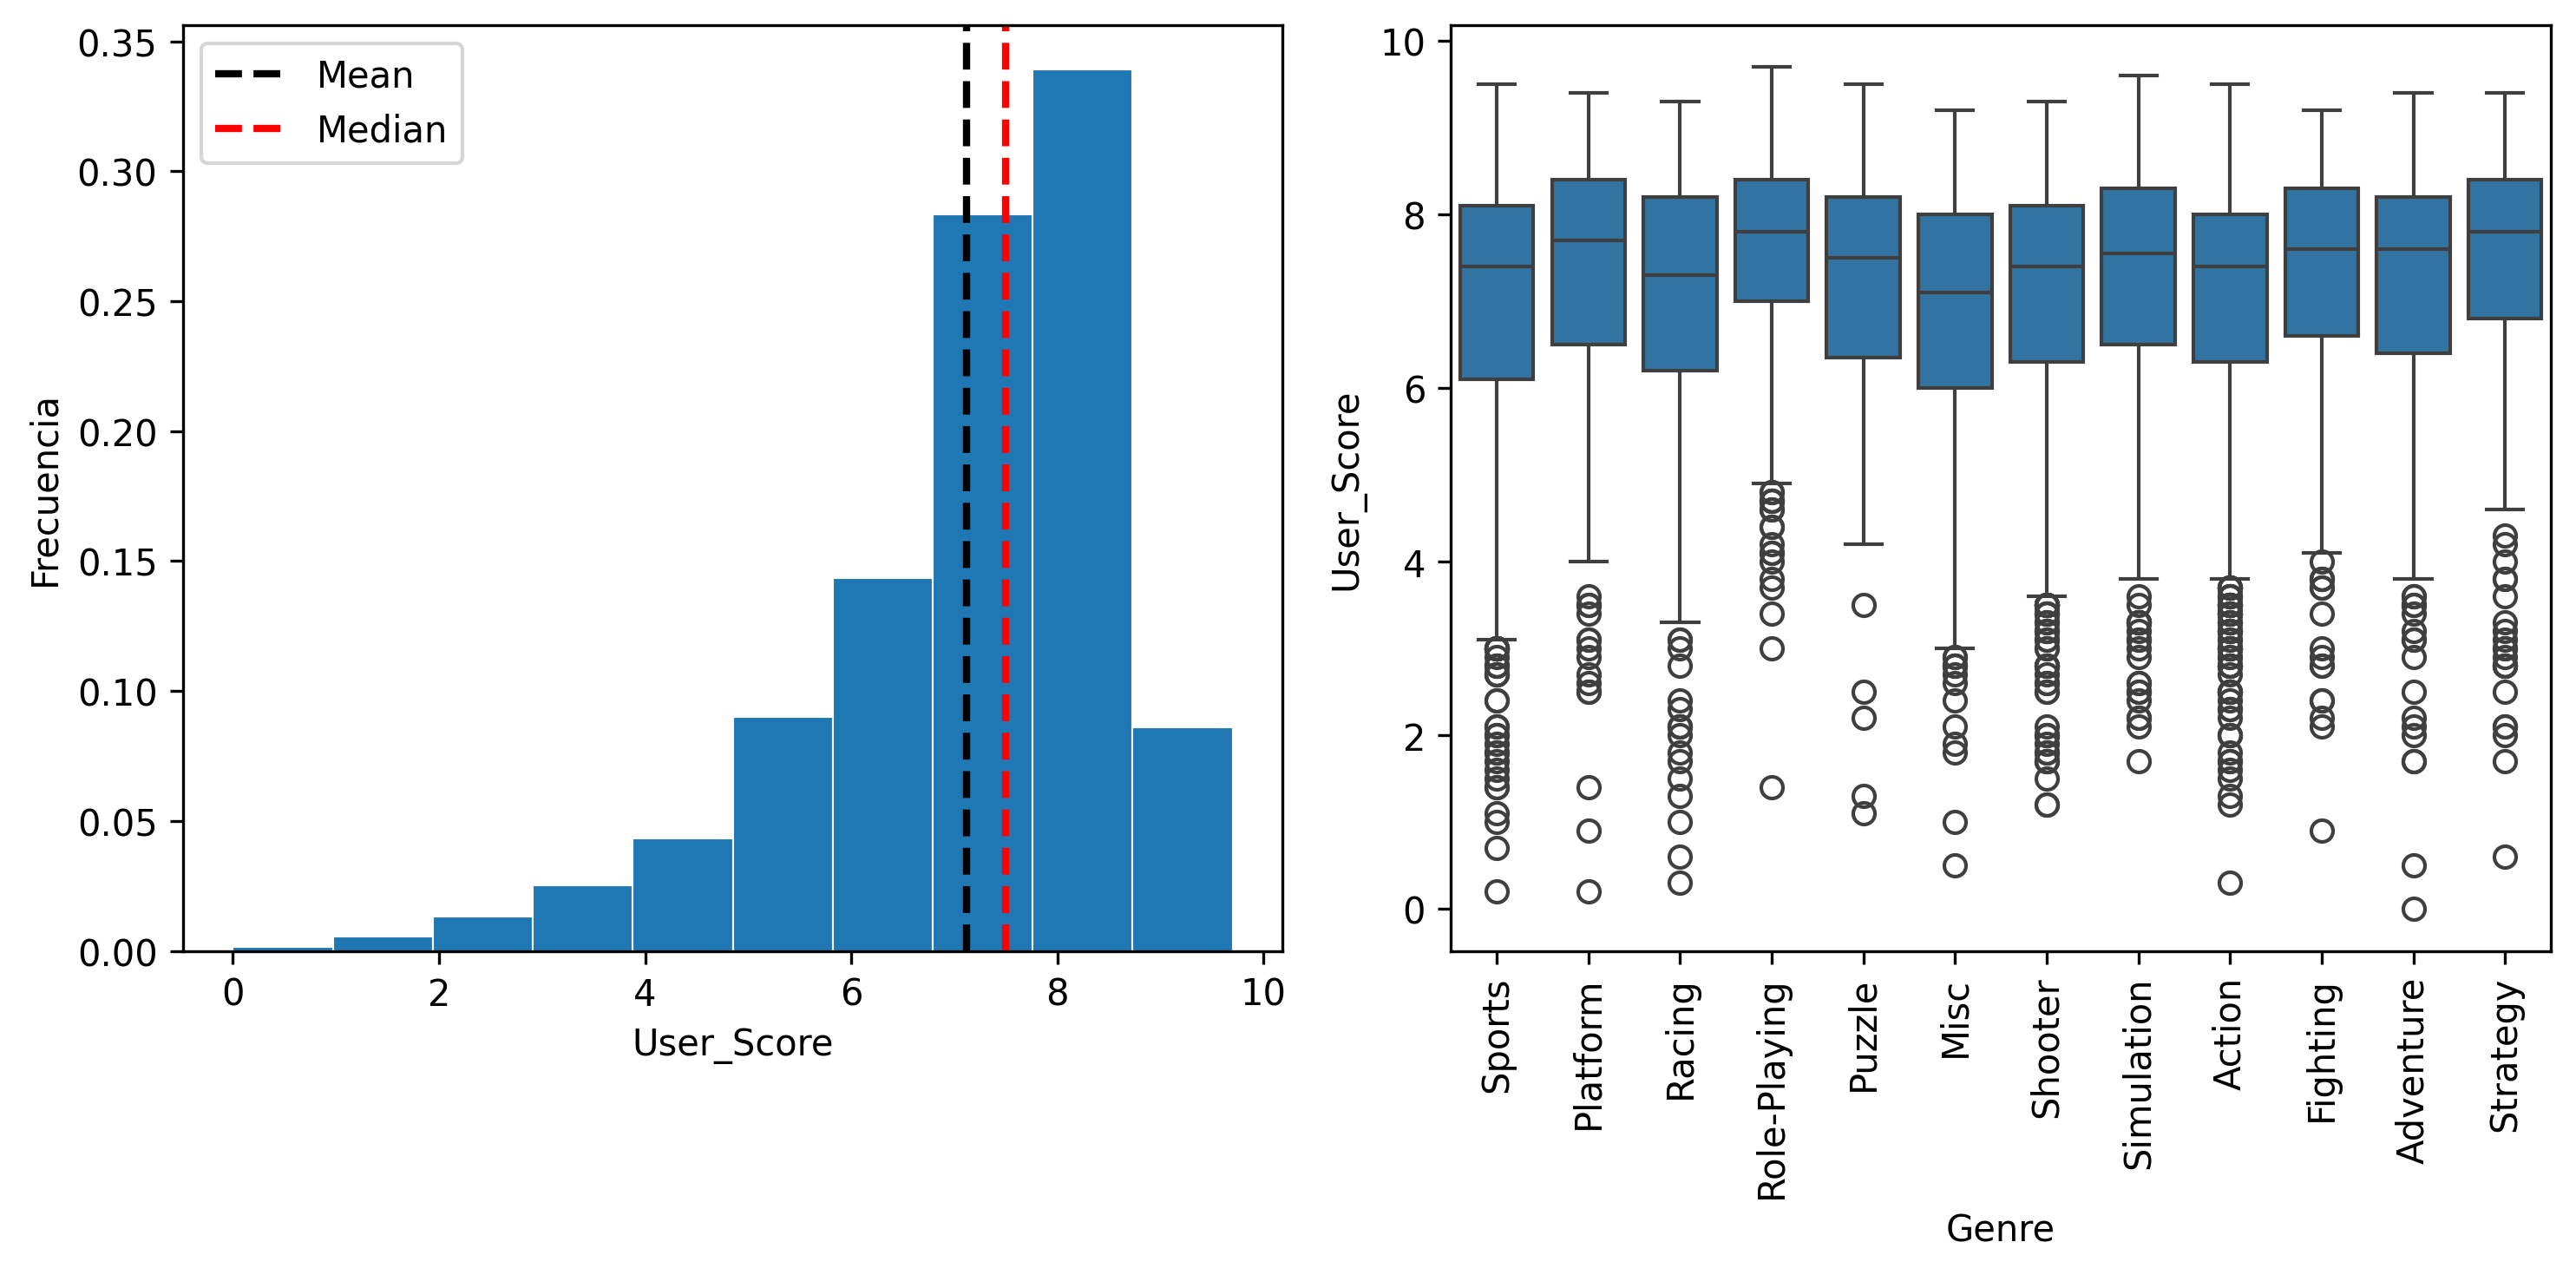

In [18]:
# P2
# b
user_genre = vj_df[['Genre','User_Score']]
fig, ax = plt.subplots(1,2,dpi = 300, figsize = (10,5))
ax[0].hist(user_genre['User_Score'], density = True, linewidth=0.5, edgecolor="white")
ax[0].set_xlabel('User_Score')
ax[0].set_ylabel('Frecuencia')
mean_score = user_genre['User_Score'].mean()
ax[0].axvline(mean_score, color='k', linestyle='dashed', linewidth=2, label = 'Mean')
median_score = user_genre['User_Score'].median()
ax[0].axvline(median_score, color='r', linestyle='dashed', linewidth=2, label = 'Median')
ax[0].legend()
sns.boxplot(user_genre, x = 'Genre', y = 'User_Score', ax = ax[1], orient = 'v')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('User_Score')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()


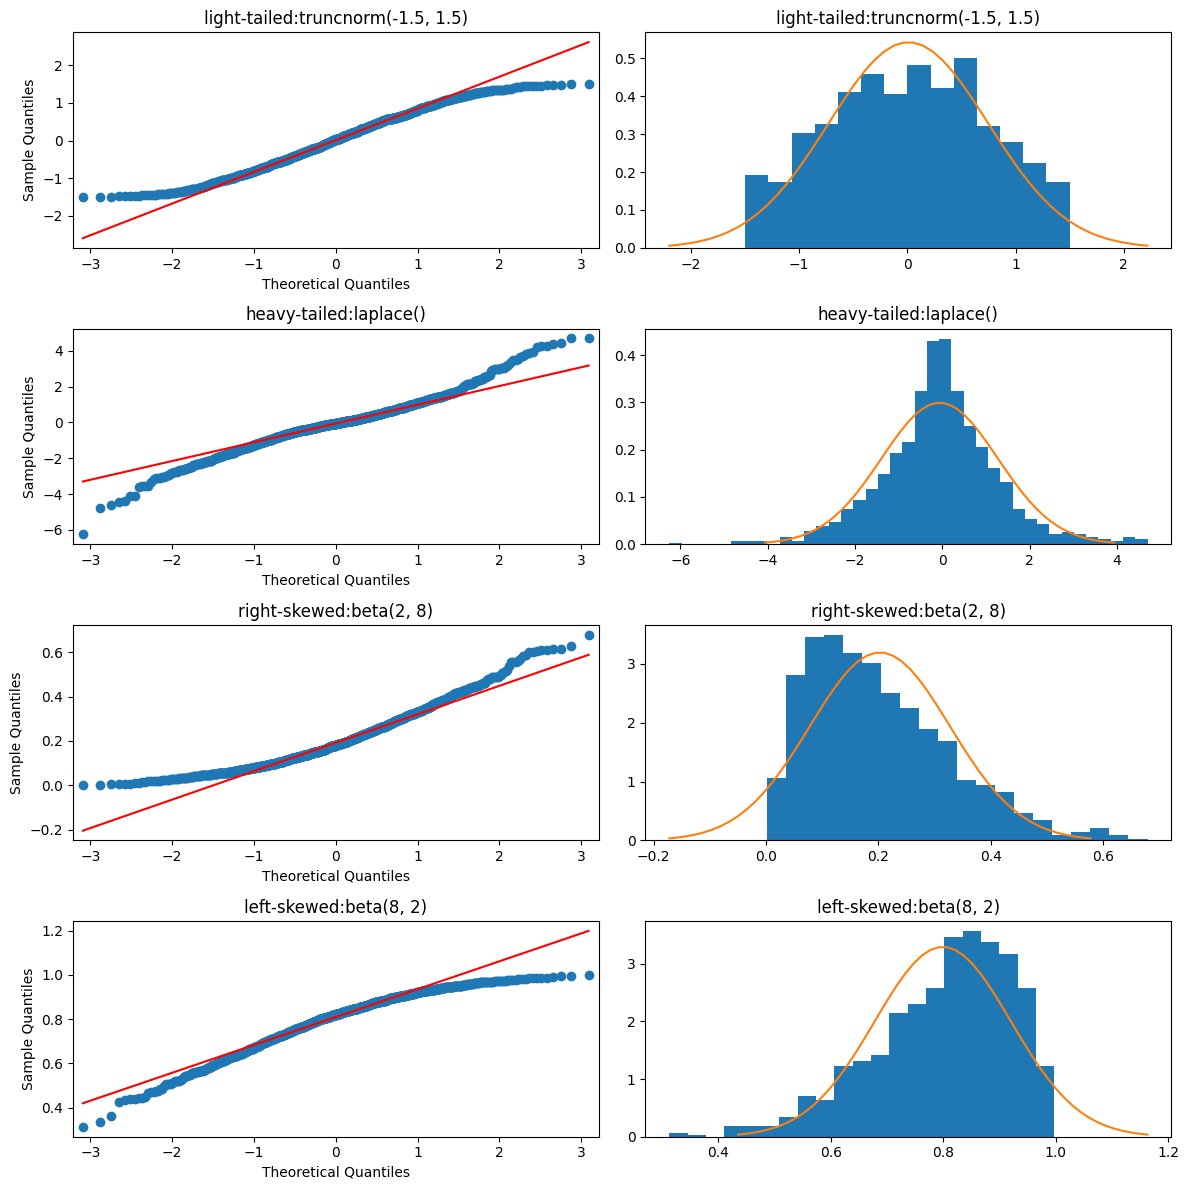

In [19]:
# QQ plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats


N = 1000


dists = {'light-tailed':stats.truncnorm(-1.5,1.5), 'heavy-tailed':stats.laplace(), 'right-skewed':stats.beta(2,8),'left-skewed':stats.beta(8,2)}


fig,axs = plt.subplots(4,2,figsize=(12,12))
for (name, dist),(ax1,ax2) in zip(dists.items(),axs):
    x = dist.rvs(N)
    qqplot(x, line='q',ax=ax1)
    ax2.hist(x, density=True, bins='auto', histtype='stepfilled')
    normal_approx = stats.norm(loc=x.mean(),scale=x.std())
    xgrid = np.linspace(x.mean()-x.std()*3,x.mean()+x.std()*3,50)
    ax2.plot(xgrid, normal_approx.pdf(xgrid),)
    label = name + ":" + dist.dist.name + str(dist.args)
    ax1.set_title(label)
    ax2.set_title(label)


plt.tight_layout()

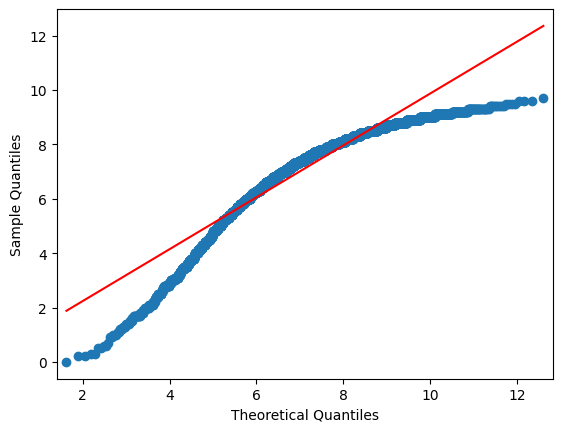

In [20]:
from statsmodels.graphics.gofplots import qqplot, qqline
import scipy.stats as stats

data = vj_df['User_Score'].dropna()

qqplot(data, stats.norm, loc = np.mean(data),scale = np.std(data), line='r')
plt.show()

### P2 c

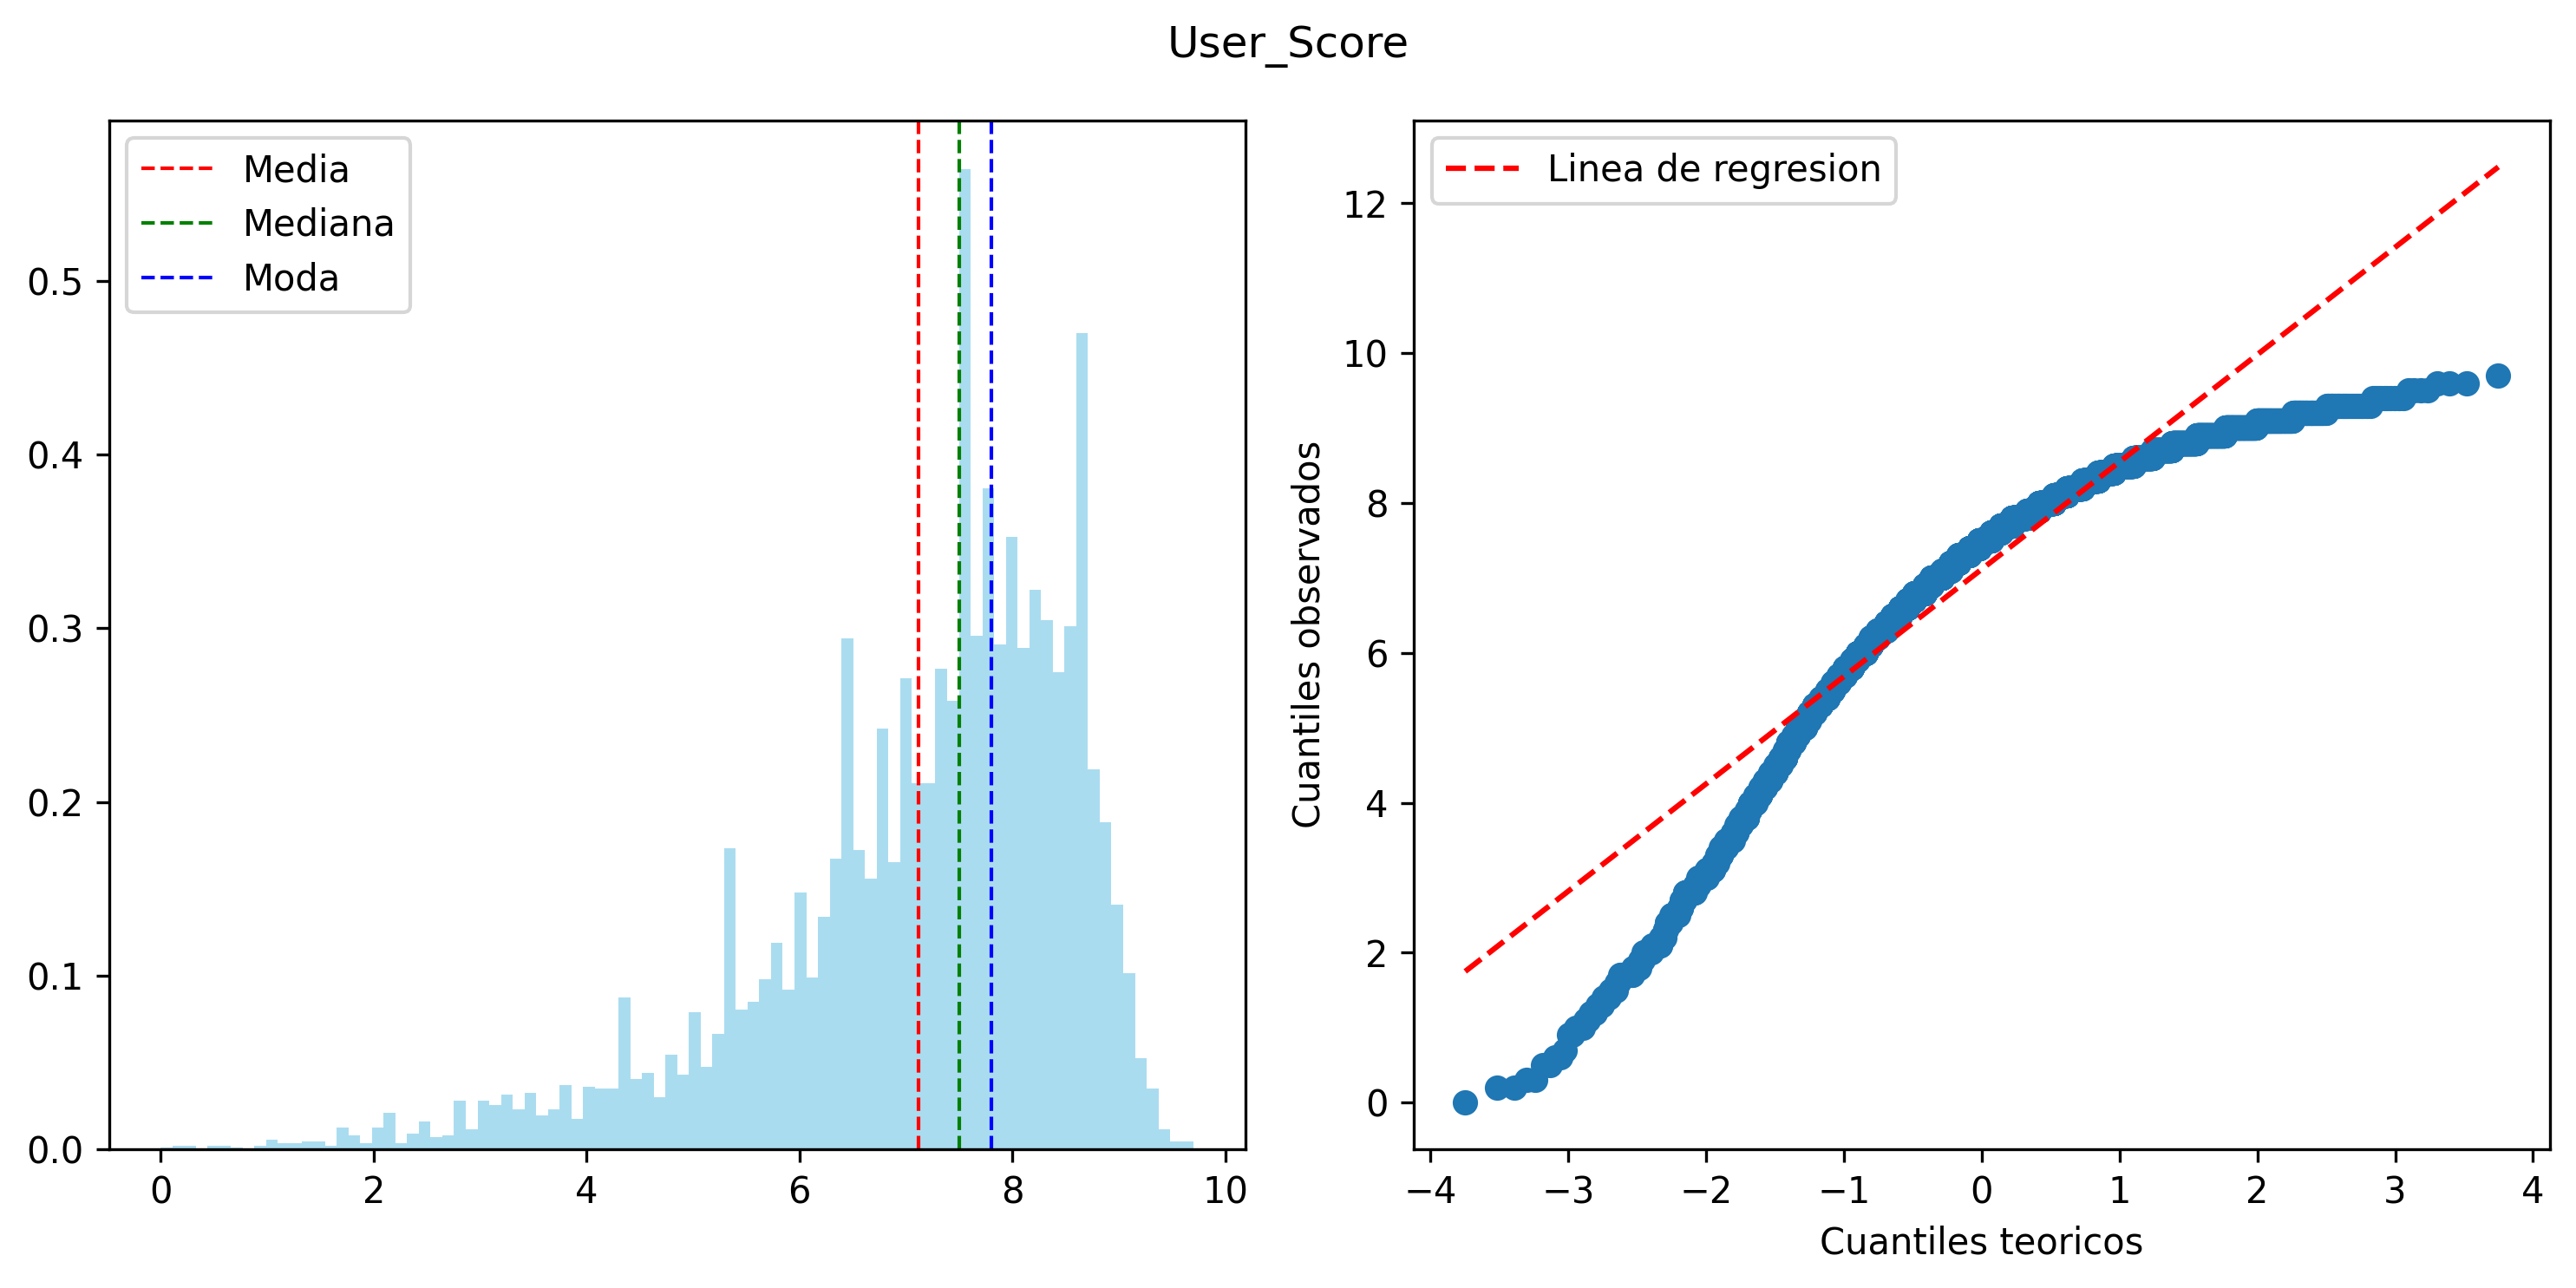

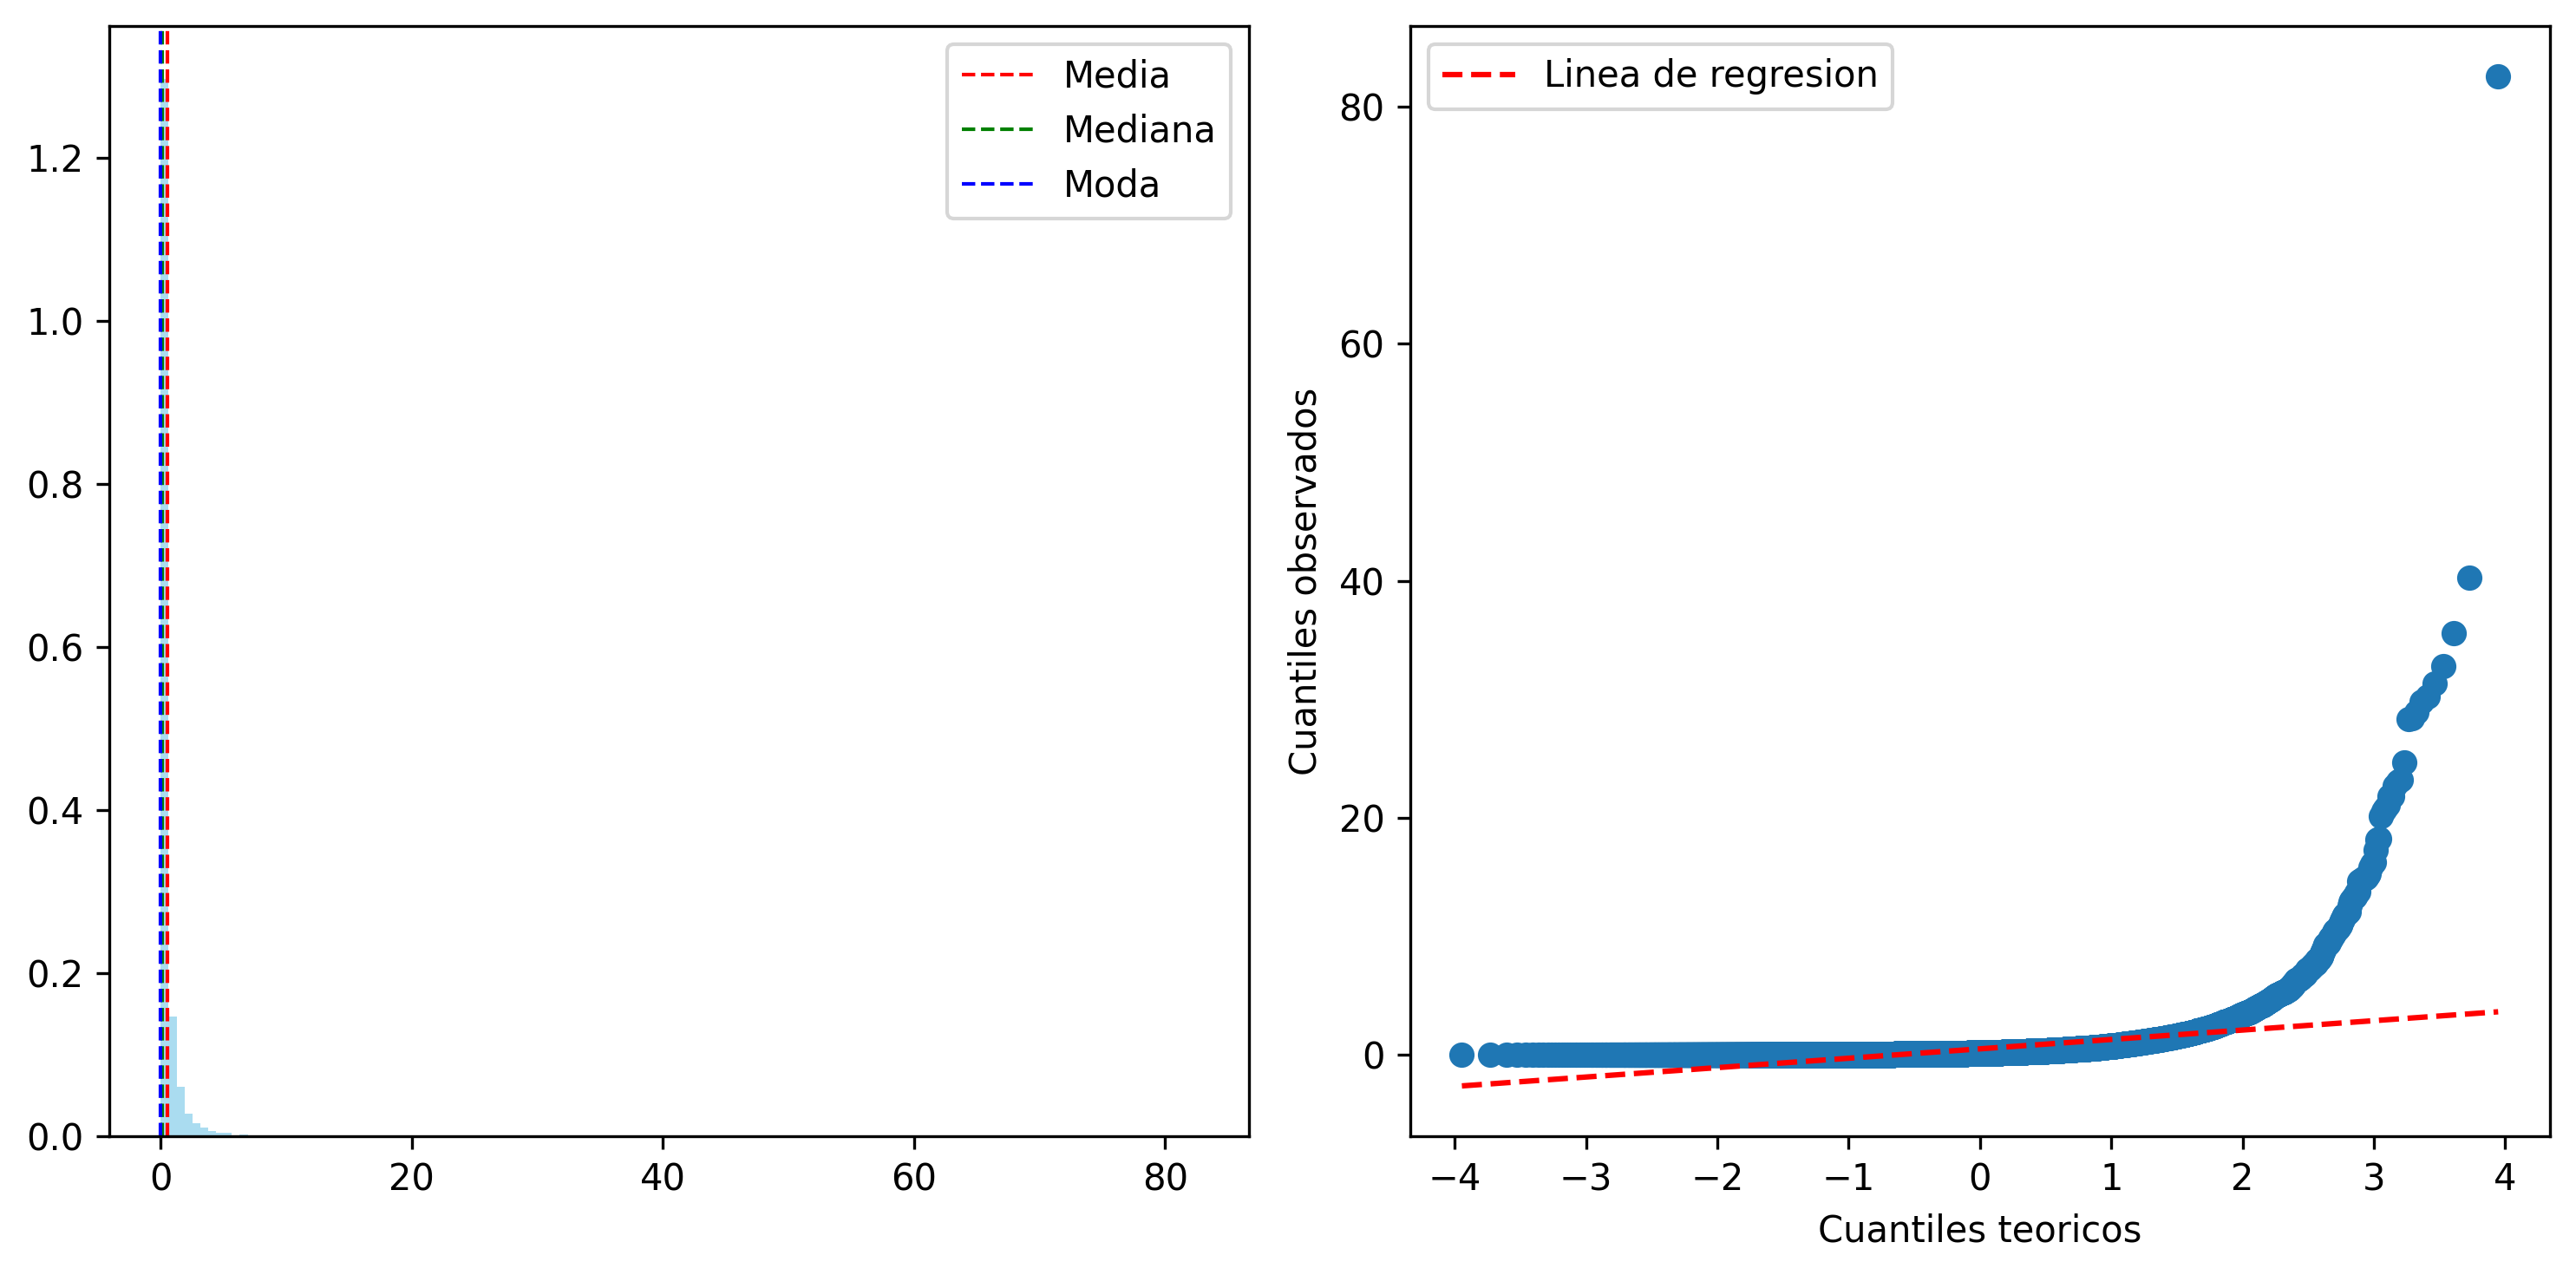

In [21]:
# P2
# c

from statsmodels.graphics.gofplots import qqplot, qqline
import scipy.stats as stats

data = vj_df['User_Score'].dropna()

histogram_qqplot(data, titulo_general = 'User_Score')

data2 = vj_df['Global_Sales'].dropna()
histogram_qqplot(data2)


### P3

In [22]:
# P3
categorias = vj_df['Publisher'].unique()
categorias


array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Bethesda Softworks', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Or', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
      

In [23]:
vj_df['Publisher'].value_counts()

Publisher
Electronic Arts                 1380
Activision                      1005
Namco Bandai Games               972
Ubisoft                          970
Konami Digital Entertainment     865
                                ... 
Vap                                1
TYO                                1
Navarre Corp                       1
Pow                                1
Team Meat                          1
Name: count, Length: 627, dtype: int64

## P4

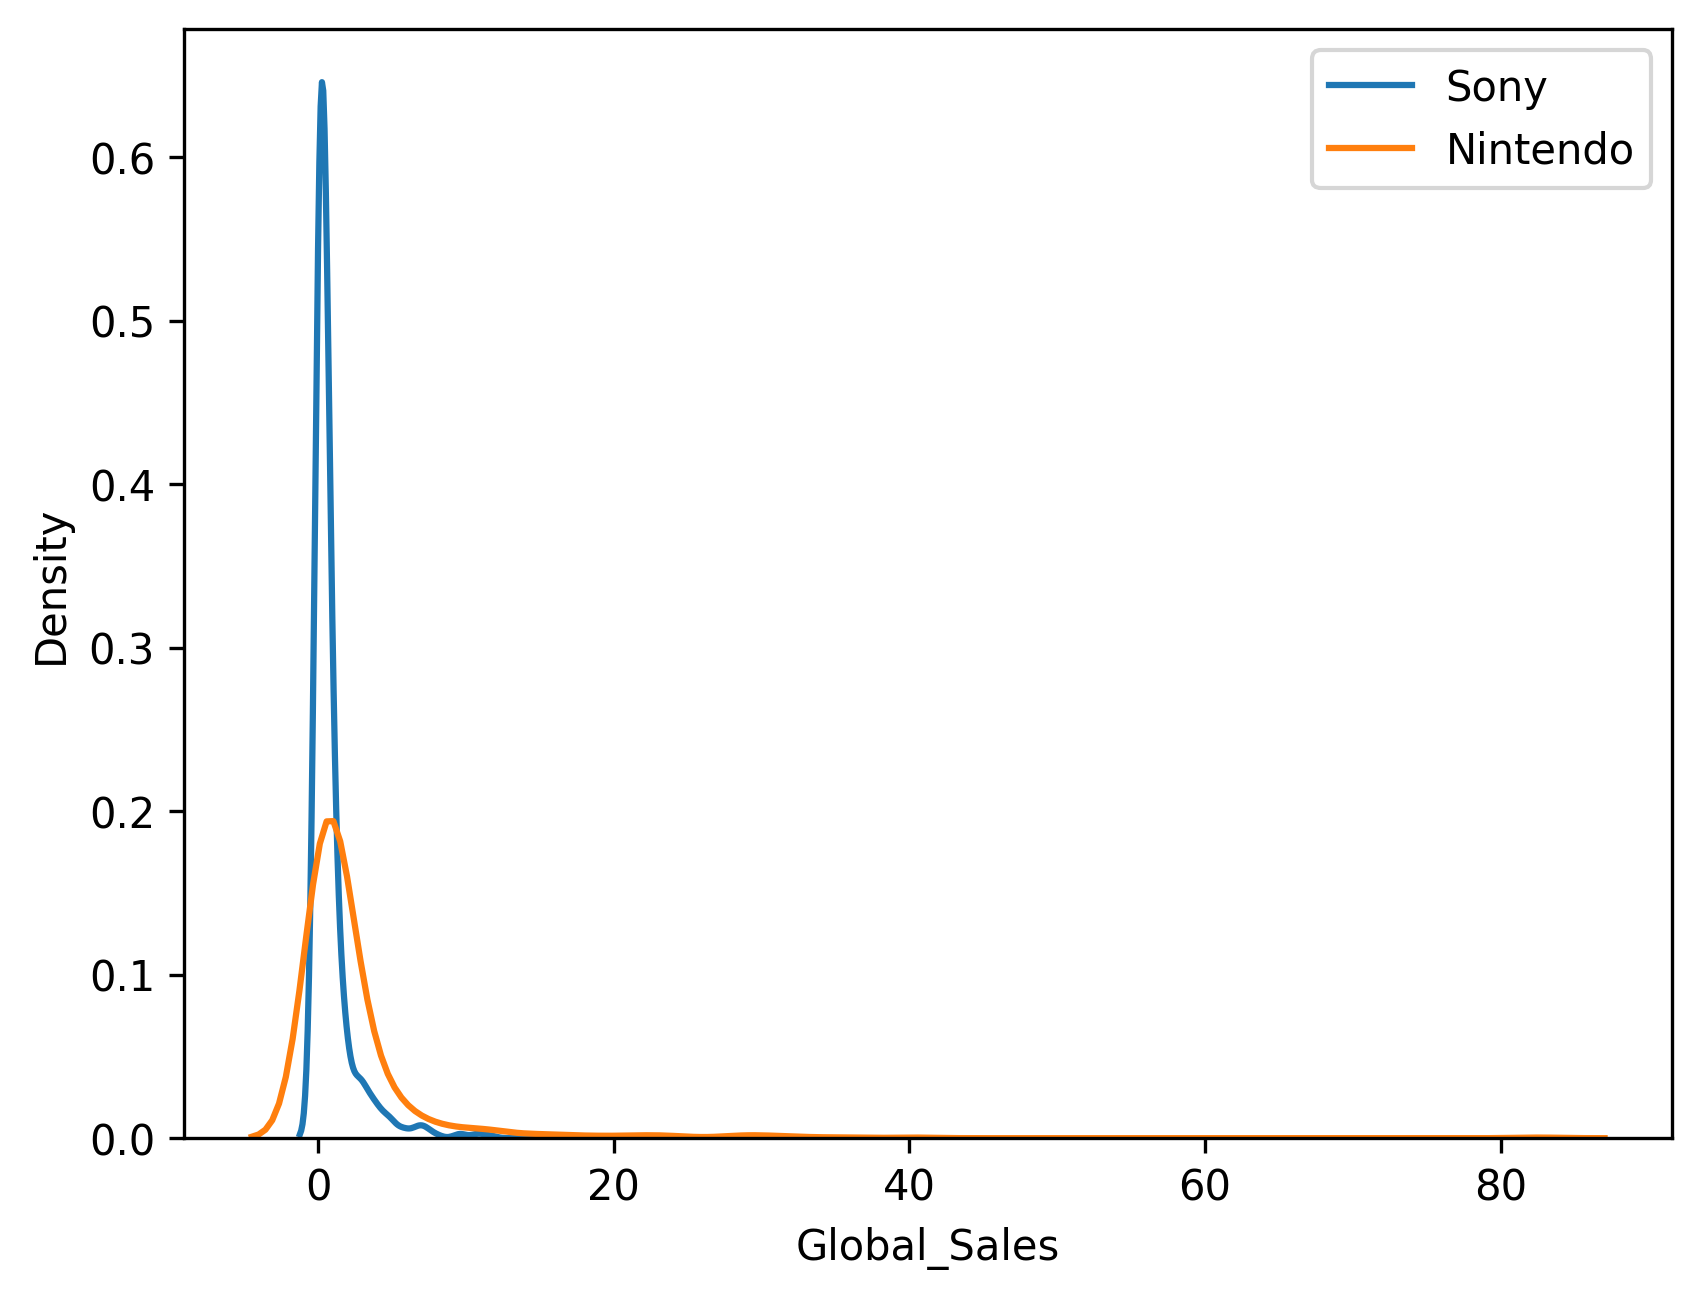

In [24]:
# P4

nintendo = []
sony = []
pub_nonnan = vj_df['Publisher'].dropna()
for i in pub_nonnan.index:
    publisher = pub_nonnan.loc[i]
    if 'Nintendo' in publisher:
        nintendo.append(publisher)
    elif 'Sony' in publisher:
        sony.append(publisher)
nintendo = np.unique(nintendo)
sony = np.unique(sony)
ventas_sony = vj_df[vj_df['Publisher'].isin(sony)]['Global_Sales']
ventas_nintendo = vj_df[vj_df['Publisher'].isin(nintendo)]['Global_Sales']
fig, ax = plt.subplots(dpi = 300)
sns.kdeplot(ventas_sony, label = 'Sony')
sns.kdeplot(ventas_nintendo, label = 'Nintendo')
plt.legend()
plt.show()

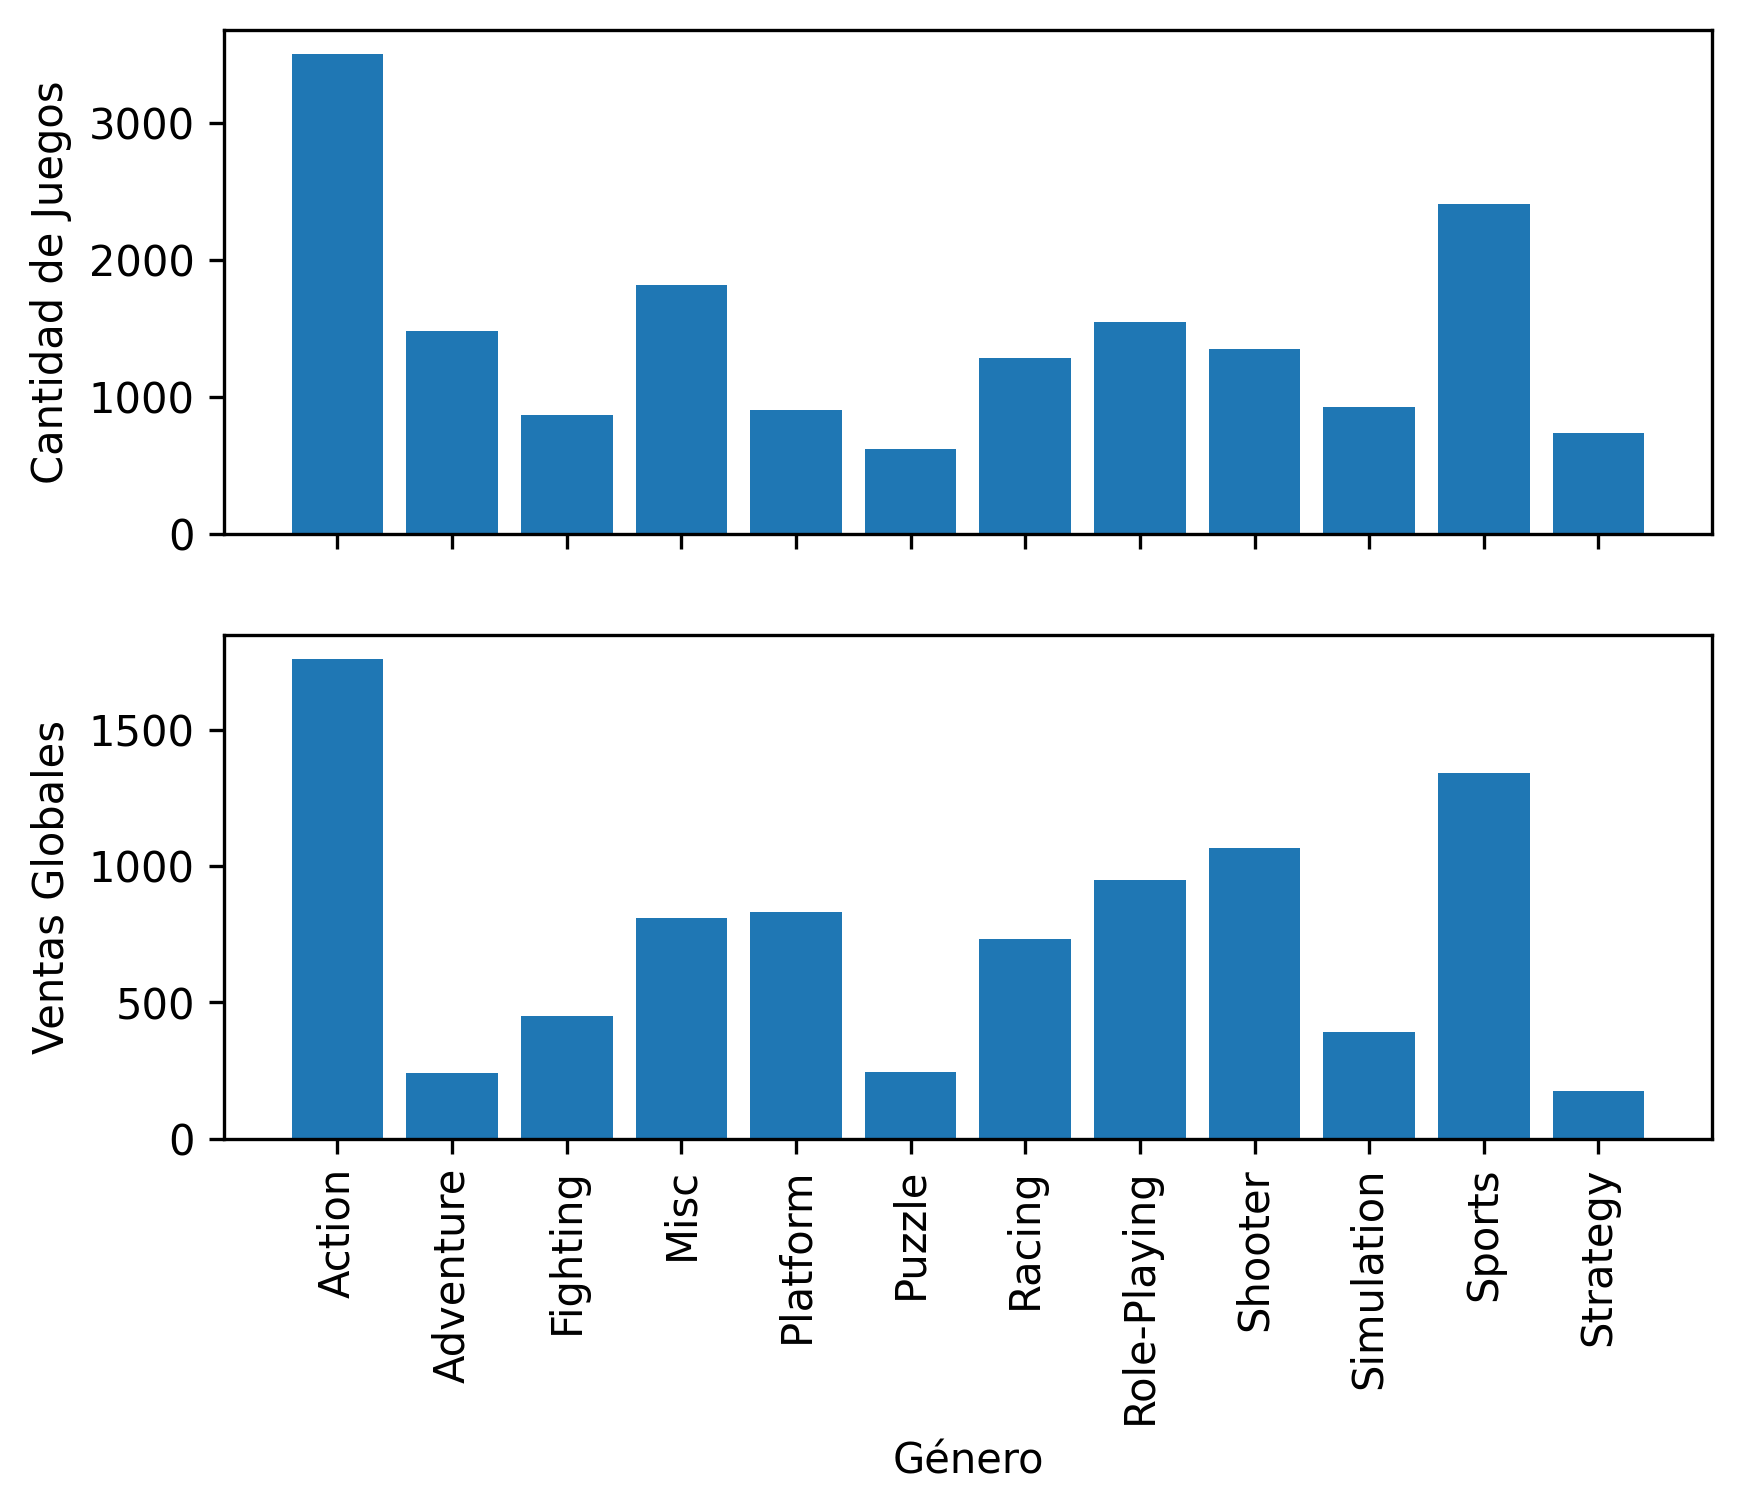

In [25]:
#P5
game_per_genre = vj_df.groupby('Genre').count()
quantity_gpg = game_per_genre['Name'] # sabemos que son unicos
sales_gpg = vj_df.groupby('Genre').sum()['Global_Sales']
fig, ax = plt.subplots(2,1,dpi = 300, sharex = True)
ax[0].bar(quantity_gpg.index, quantity_gpg)
ax[0].set_ylabel('Cantidad de Juegos')
ax[1].bar(sales_gpg.index, sales_gpg)
ax[1].set_ylabel('Ventas Globales')
plt.xticks(rotation = 90)
plt.xlabel('Género')
plt.show()

In [26]:
game_per_genre

Name  Platform  Year_of_Release  Publisher  NA_Sales  EU_Sales  \
Genre                                                                          
Action        3503      3503             3500       3502      3503      3503   
Adventure     1478      1478             1478       1478      1478      1478   
Fighting       864       864              864        864       864       864   
Misc          1813      1813             1812       1813      1813      1813   
Platform       900       900              900        900       900       900   
Puzzle         615       615              615        615       615       615   
Racing        1282      1282             1281       1282      1282      1282   
Role-Playing  1545      1545             1545       1545      1545      1545   
Shooter       1349      1349             1348       1349      1349      1349   
Simulation     925       925              924        925       925       925   
Sports        2408      2408             2407       2408      2408      2408   
Strategy       734       734              734        734       734       734   

              JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
Genre                                                                           
Action            3503         3503          3503          1933          1933   
Adventure         1478         1478          1478           342           342   
Fighting           864          864           864           418           418   
Misc              1813         1813          1813           528           528   
Platform           900          900           900           501           501   
Puzzle             615          615           615           232           232   
Racing            1282         1282          1282           756           756   
Role-Playing      1545         1545          1545           759           759   
Shooter           1349         1349          1349           963           963   
Simulation         925          925           925           367           367   
Sports            2408         2408          2408          1213          1213   
Strategy           734          734           734           324           324   

              User_Score  User_Count  Rating  
Genre                                         
Action              1878        1878    2250  
Adventure            314         314     472  
Fighting             409         409     448  
Misc                 446         446     902  
Platform             435         435     581  
Puzzle               135         135     364  
Racing               653         653     898  
Role-Playing         766         766     796  
Shooter              945         945    1042  
Simulation           358         358     590  
Sports              1123        1123    1541  
Strategy             336         336     368

In [27]:
sales_gpg

Genre
Action          1761.97
Adventure        241.55
Fighting         449.17
Misc             808.80
Platform         831.74
Puzzle           243.76
Racing           731.67
Role-Playing     949.31
Shooter         1067.30
Simulation       392.84
Sports          1341.00
Strategy         175.72
Name: Global_Sales, dtype: float64

# Oscar

In [28]:
# P1

oscar_df = read_course_dataset('oscars_df.csv')
descripcion = oscar_df.describe()
# importante analizar los datos, notar que IMDB votes son numeros, que son tomados como categorias por pandas
oscar_df['IMDB Votes'] = oscar_df['IMDB Votes'].str.replace(',', '').astype(int)
oscar_df.head(5)

Film Oscar Year Film Studio/Producer(s)    Award  \
0                Wings    1927/28    Famous Players-Lasky   Winner   
1           7th Heaven    1927/28                     Fox  Nominee   
2           The Racket    1927/28       The Caddo Company  Nominee   
3  The Broadway Melody    1928/29     Metro-Goldwyn-Mayer   Winner   
4                Alibi    1928/29     Feature Productions  Nominee   

   Year of Release  Movie Time            Movie Genre  IMDB Rating  \
0             1927         144      Drama,Romance,War          7.5   
1             1927         110          Drama,Romance          7.7   
2             1928          84  Crime,Drama,Film-Noir          6.7   
3             1929         100  Drama,Musical,Romance          5.7   
4             1929          91   Action,Crime,Romance          5.8   

   IMDB Votes                                         Movie Info  ...  \
0       12221  With World War I afoot, David Armstrong (Richa...  ...   
1        3439                                                NaN  ...   
2        1257                                                NaN  ...   
3        6890  Vaudeville sisters "Hank" (Bessie Love) and Qu...  ...   
4         765                                                NaN  ...   

  Tomatometer Status Tomatometer Rating Tomatometer Count Audience Status  \
0    Certified-Fresh               93.0              46.0         Upright   
1                NaN                NaN               NaN             NaN   
2                NaN                NaN               NaN             NaN   
3             Rotten               33.0              24.0         Spilled   
4                NaN                NaN               NaN             NaN   

  Audience Rating Audience Count Tomatometer Top Critics Count  \
0            78.0         3530.0                           9.0   
1             NaN            NaN                           NaN   
2             NaN            NaN                           NaN   
3            21.0         1813.0                           7.0   
4             NaN            NaN                           NaN   

  Tomatometer Fresh Critics Count Tomatometer Rotten Critics Count  \
0                            43.0                              3.0   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             8.0                             16.0   
4                             NaN                              NaN   

                                Film ID  
0  2becf7d5-a3de-46ab-ae45-abdd6b588067  
1  19ed3295-a878-4fd2-8e60-5cd7b5f93dad  
2  3111c2d8-0908-4093-8ff3-99c89f2f2f08  
3  de063f3f-2d35-4e1c-8636-6eb4c16bd236  
4  609887c2-877c-43a4-b88c-e40e31096a98  

[5 rows x 29 columns]

In [29]:
descrip_group = oscar_df.groupby('Award').describe()
descrip_group

Year of Release                                                  \
                  count         mean        std     min     25%     50%   
Award                                                                     
Nominee           478.0  1973.361925  29.843420  1927.0  1943.0  1972.0   
Winner             93.0  1973.333333  26.587564  1927.0  1951.0  1973.0   

                        Movie Time              ...  \
            75%     max      count        mean  ...   
Award                                           ...   
Nominee  2002.0  2021.0      478.0  122.228033  ...   
Winner   1996.0  2019.0       93.0  138.602151  ...   

        Tomatometer Fresh Critics Count         \
                                    75%    max   
Award                                            
Nominee                          173.00  495.0   
Winner                           100.75  414.0   

        Tomatometer Rotten Critics Count                                   \
                                   count       mean        std  min   25%   
Award                                                                       
Nominee                            357.0  12.319328  20.356072  0.0  2.00   
Winner                              82.0  12.085366  13.968396  1.0  3.25   

                           
         50%   75%    max  
Award                      
Nominee  4.0  15.0  182.0  
Winner   7.0  15.0   80.0  

[2 rows x 88 columns]

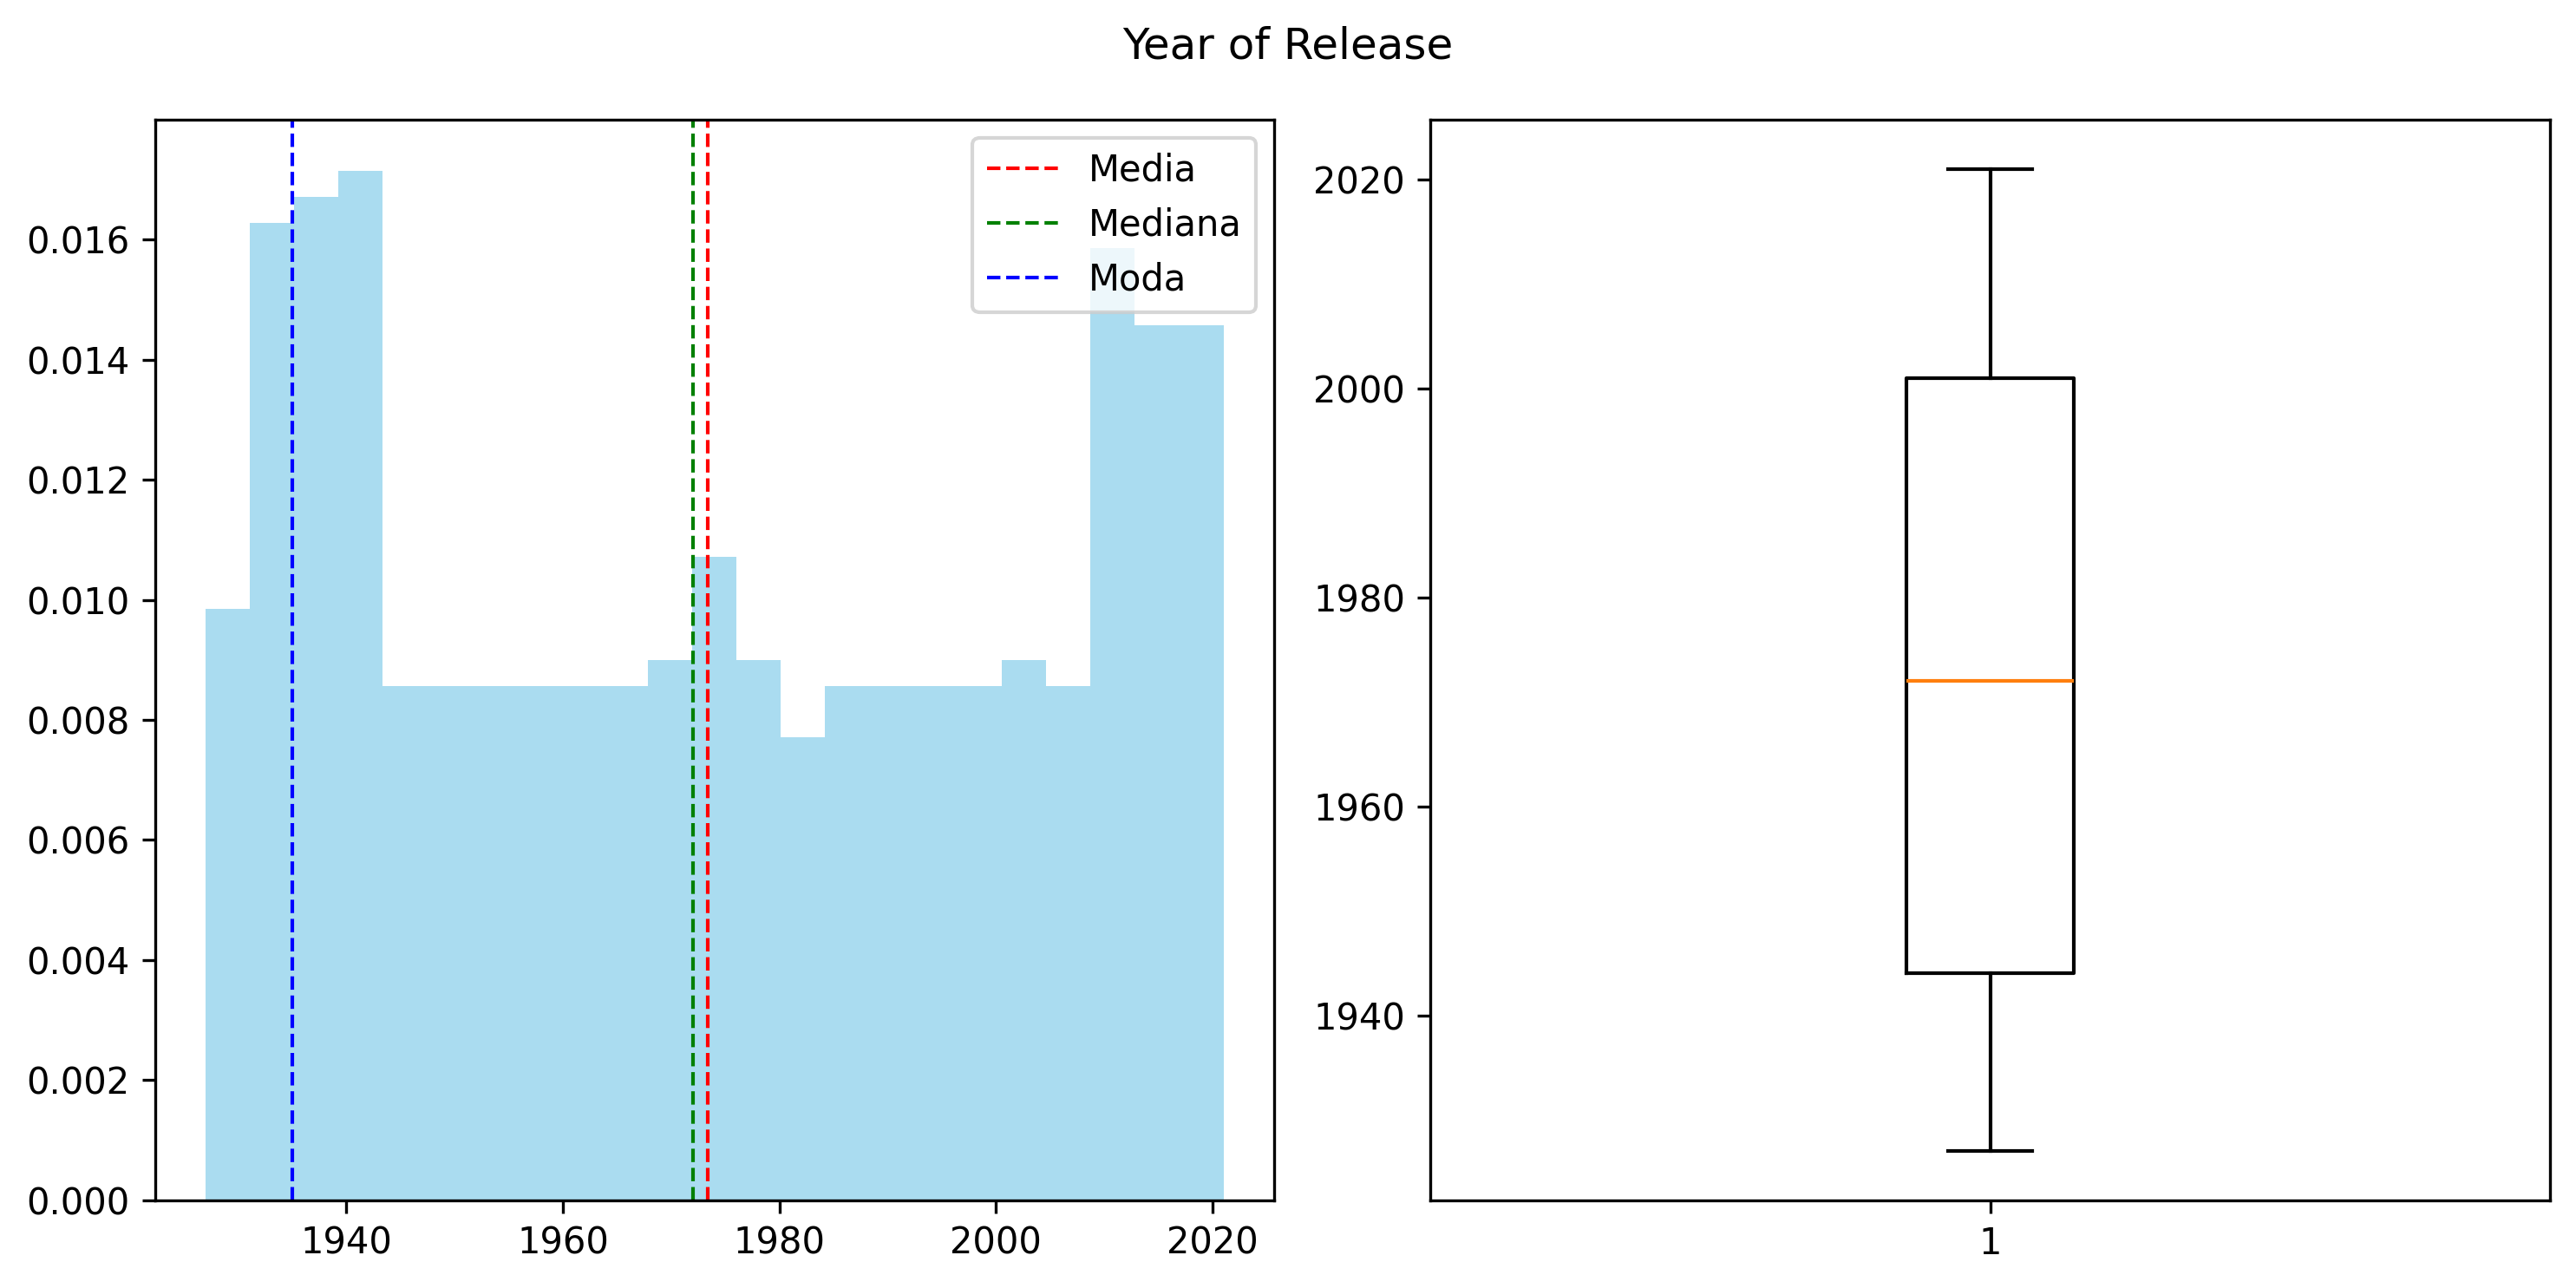

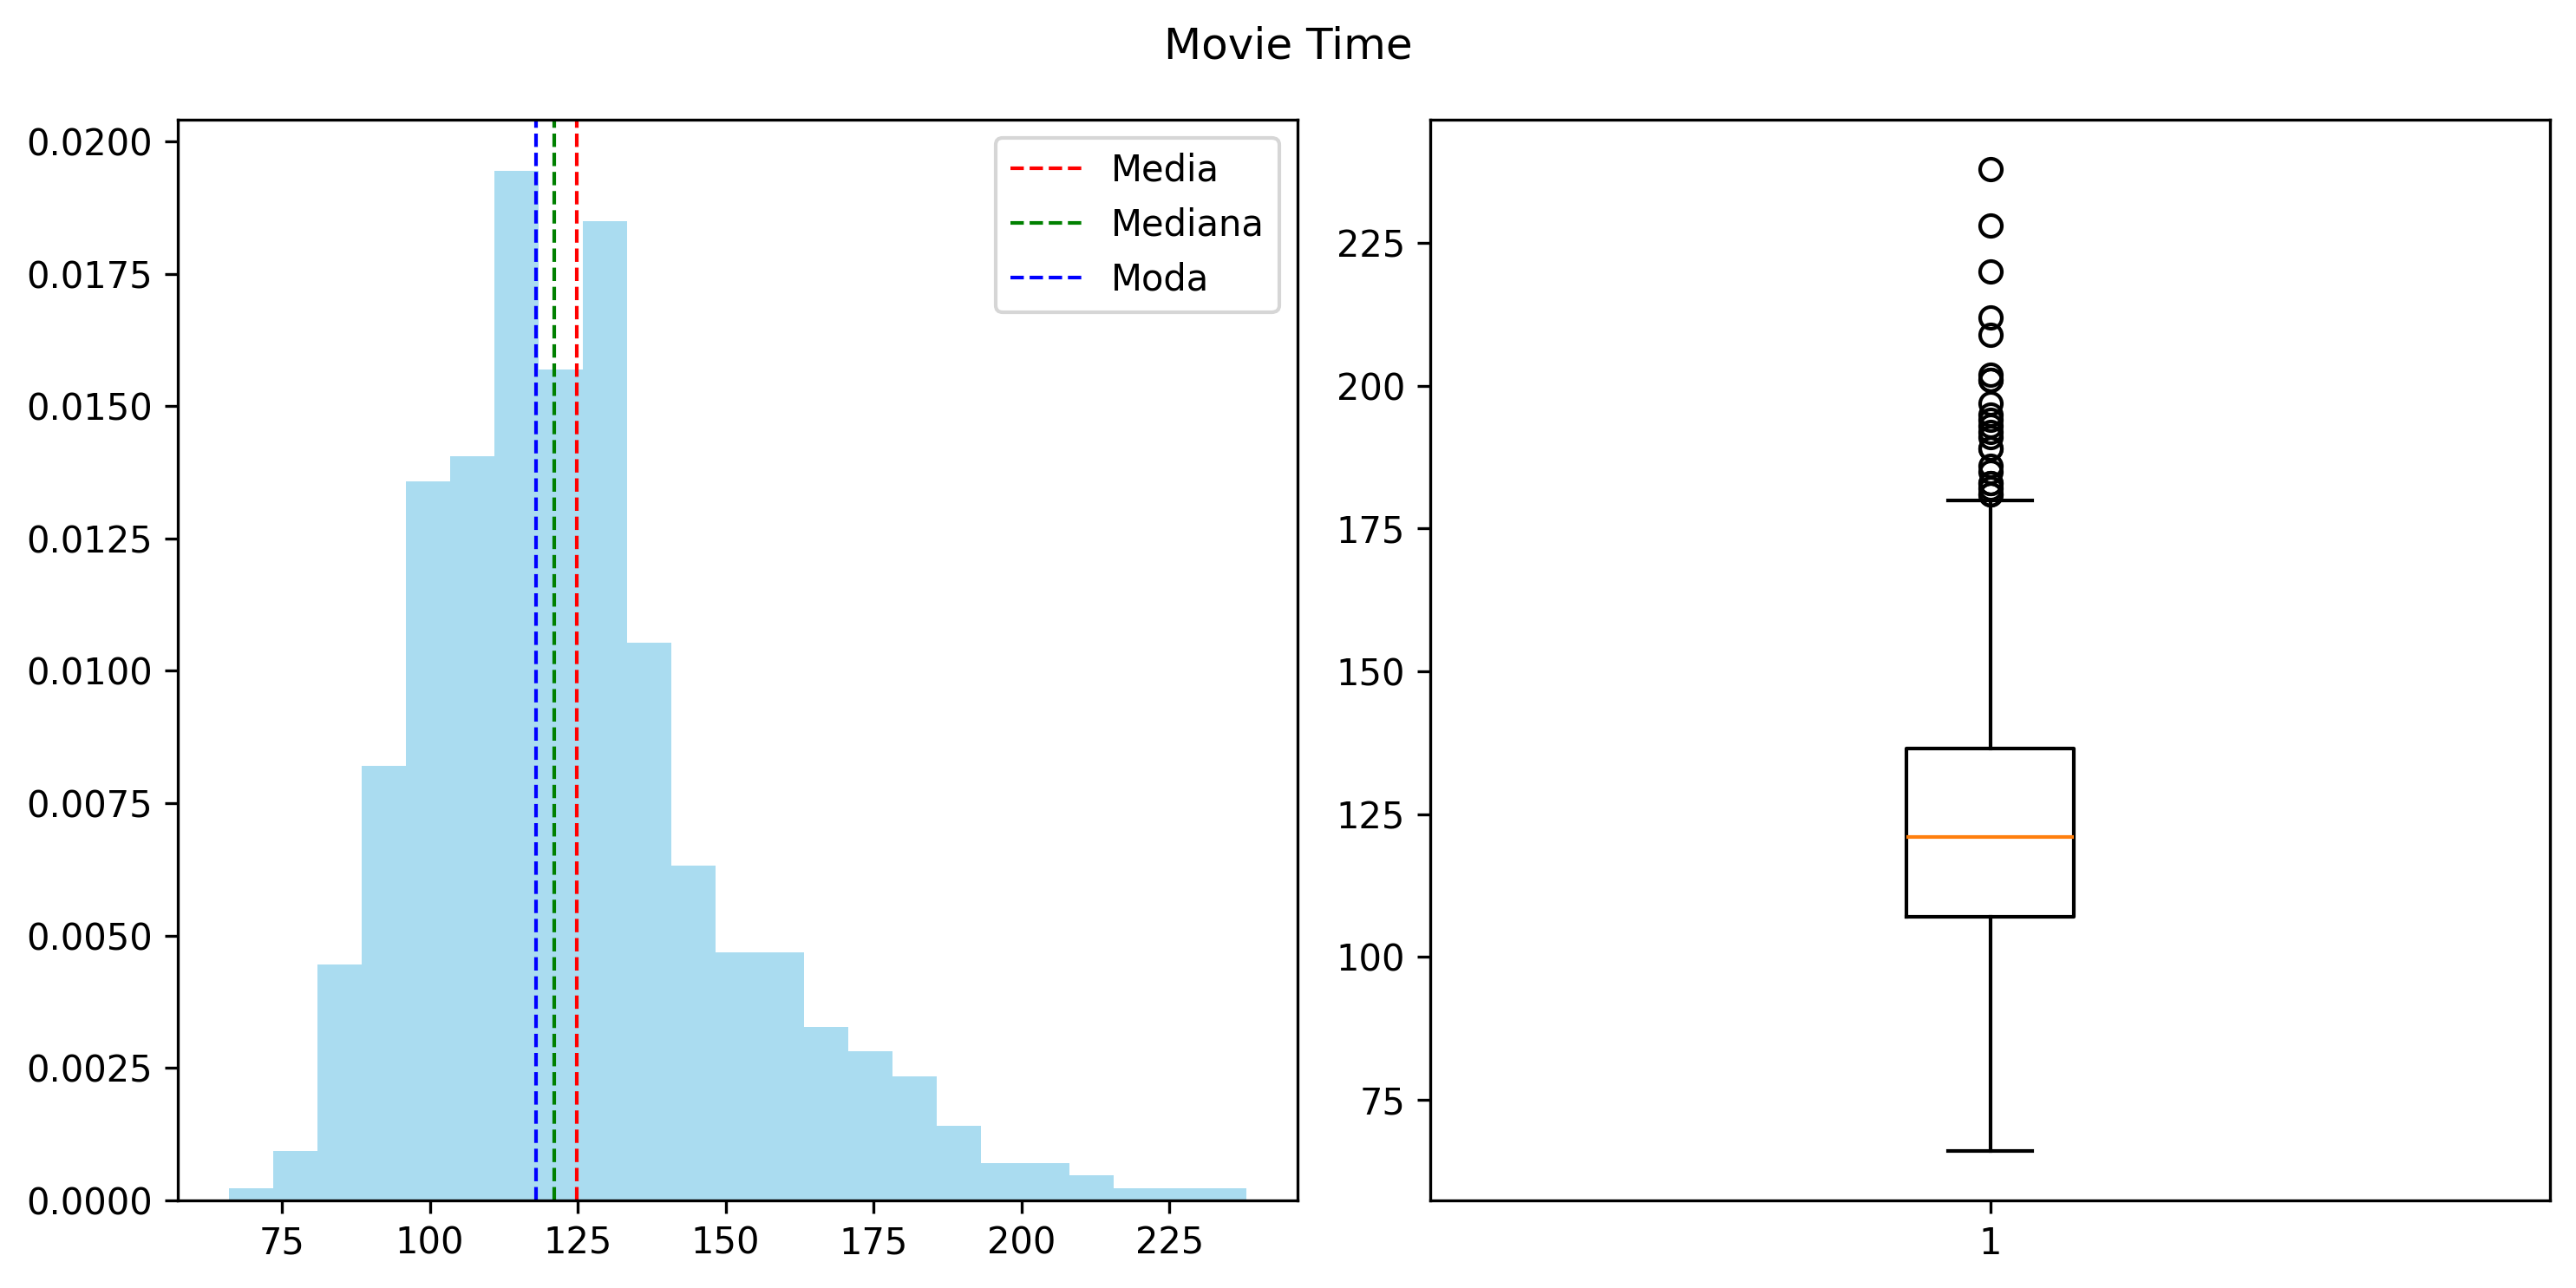

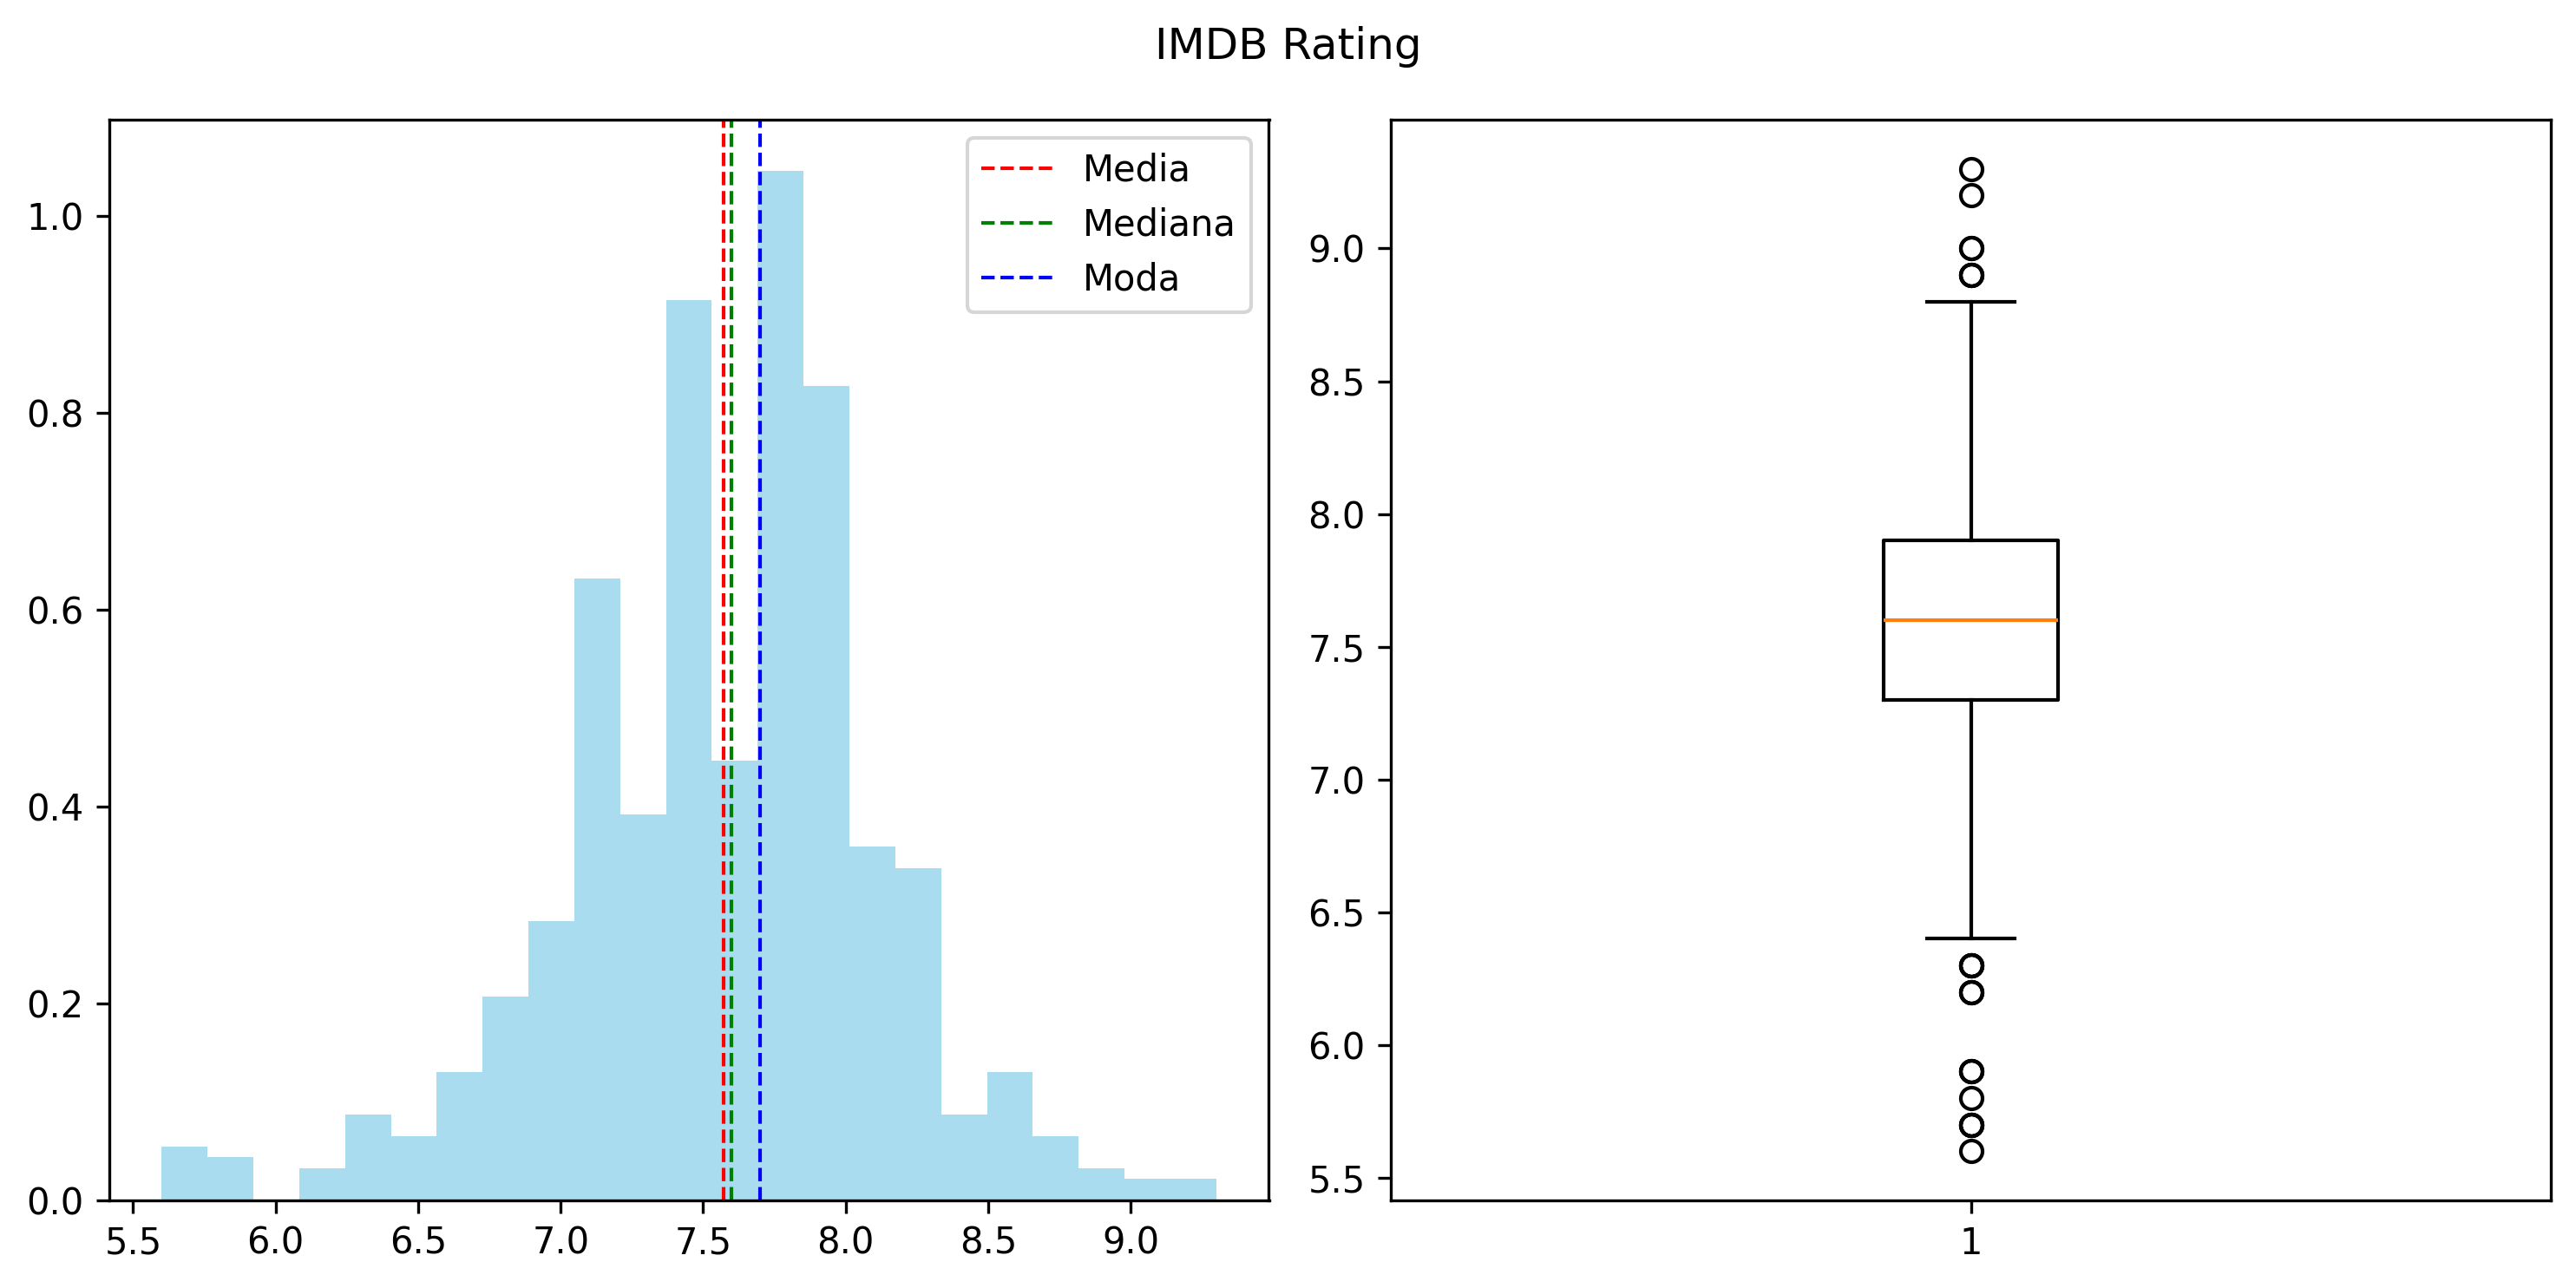

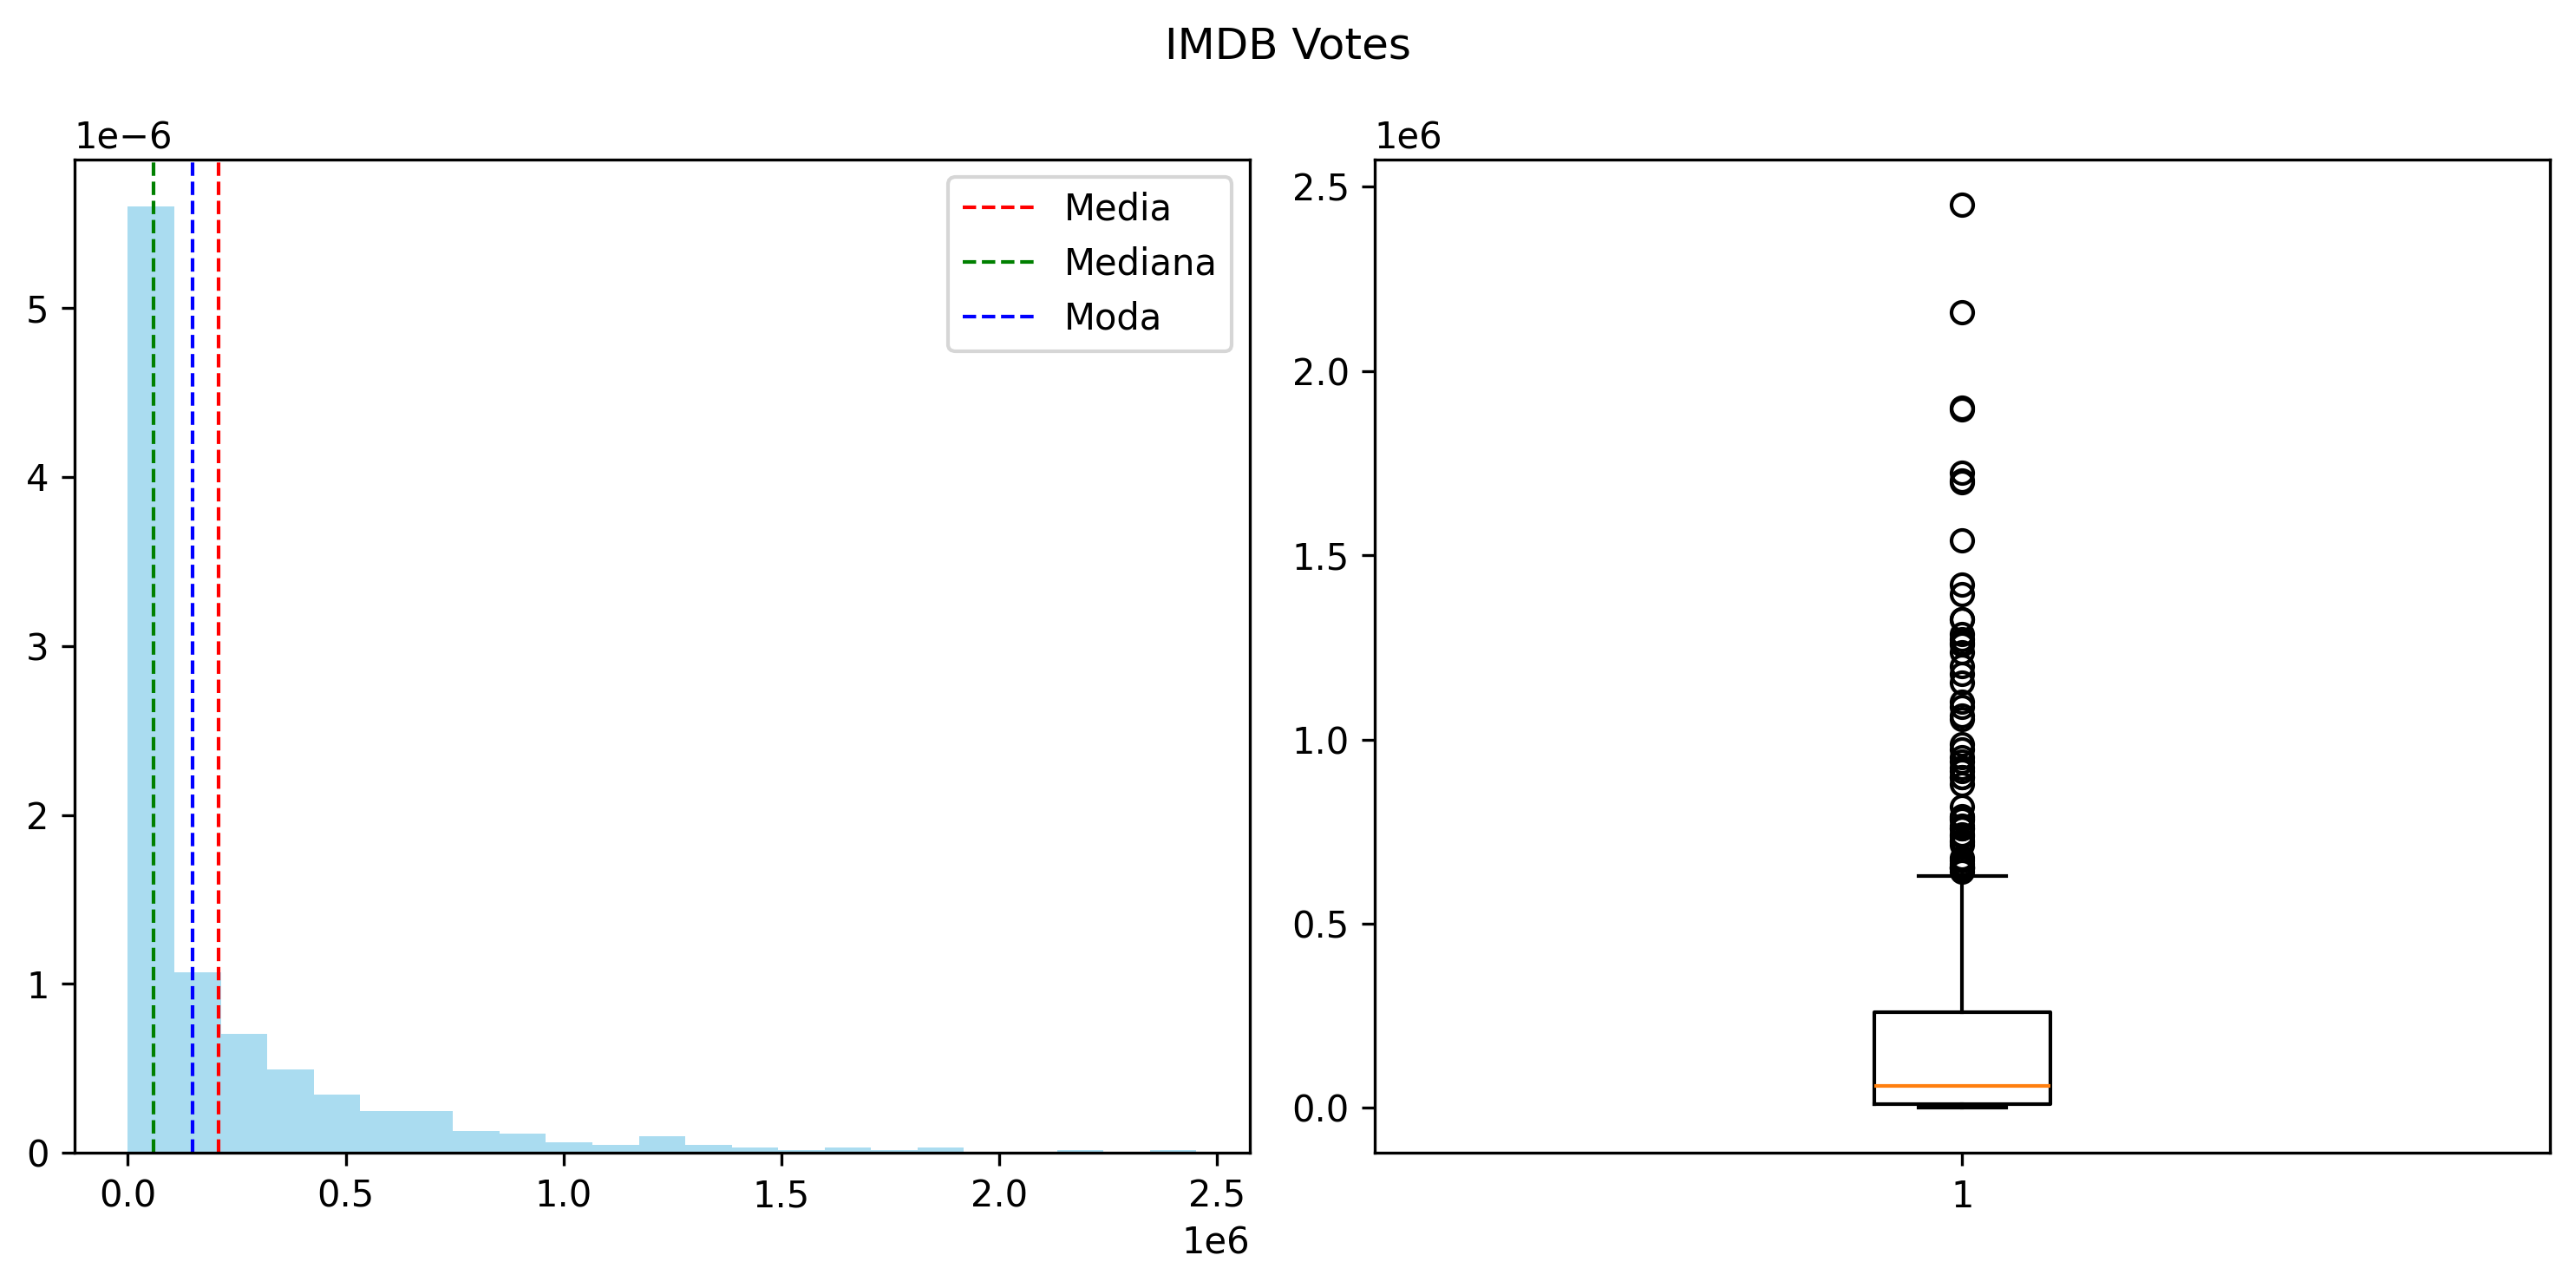

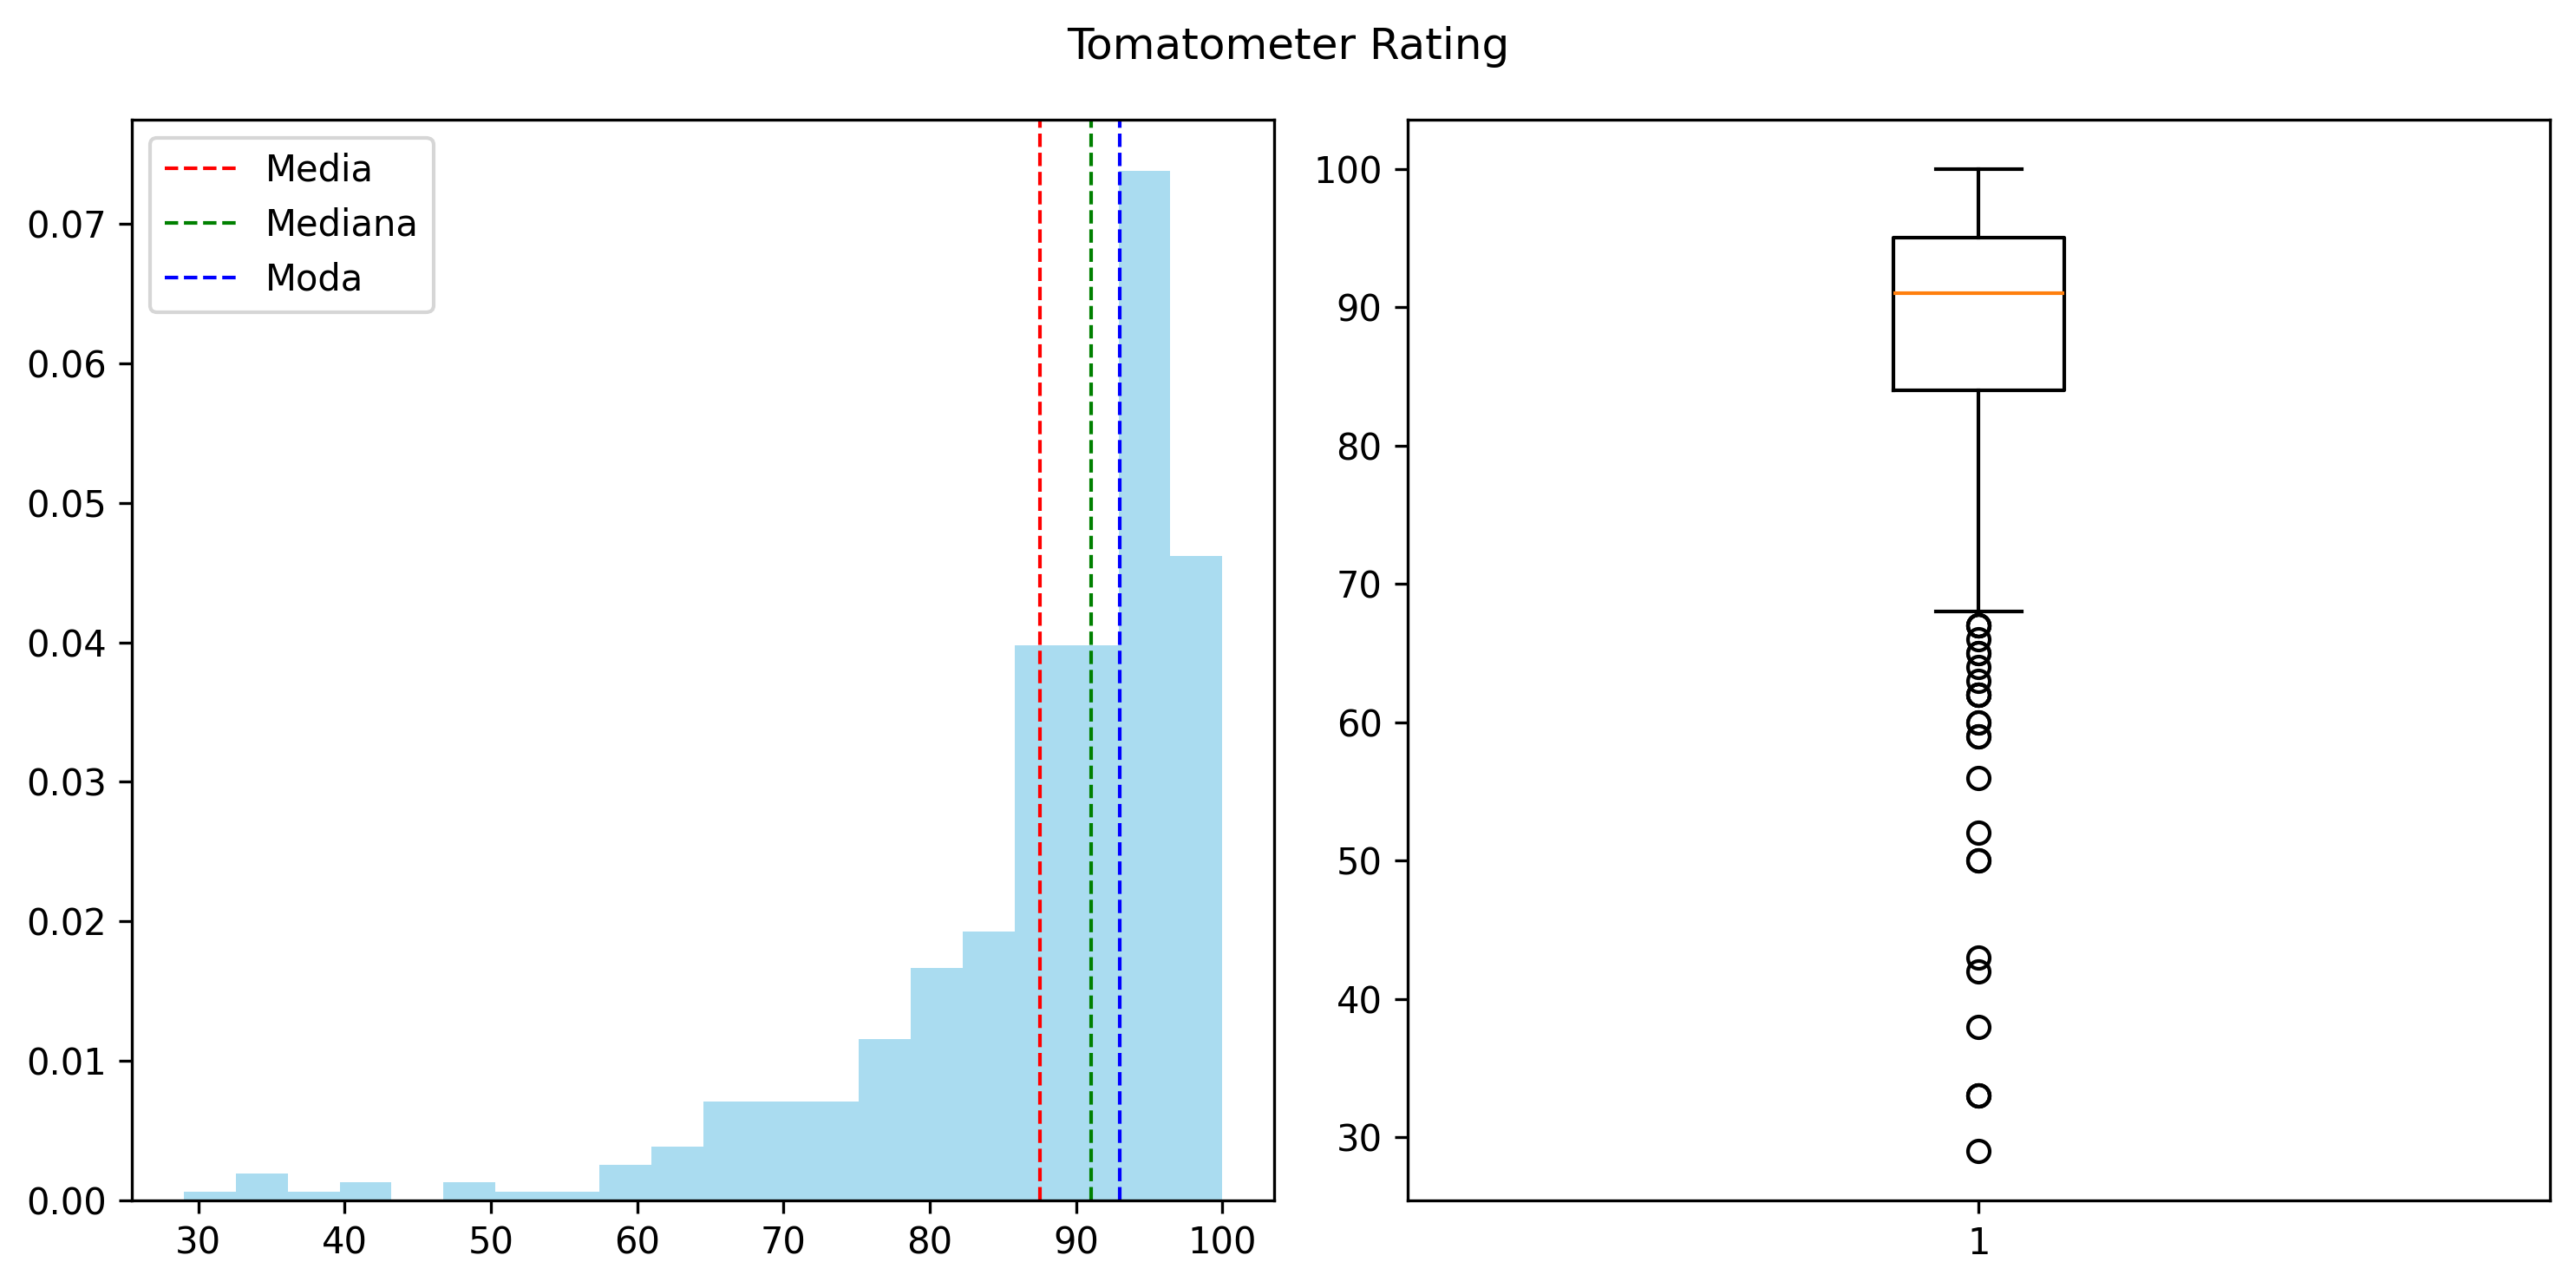

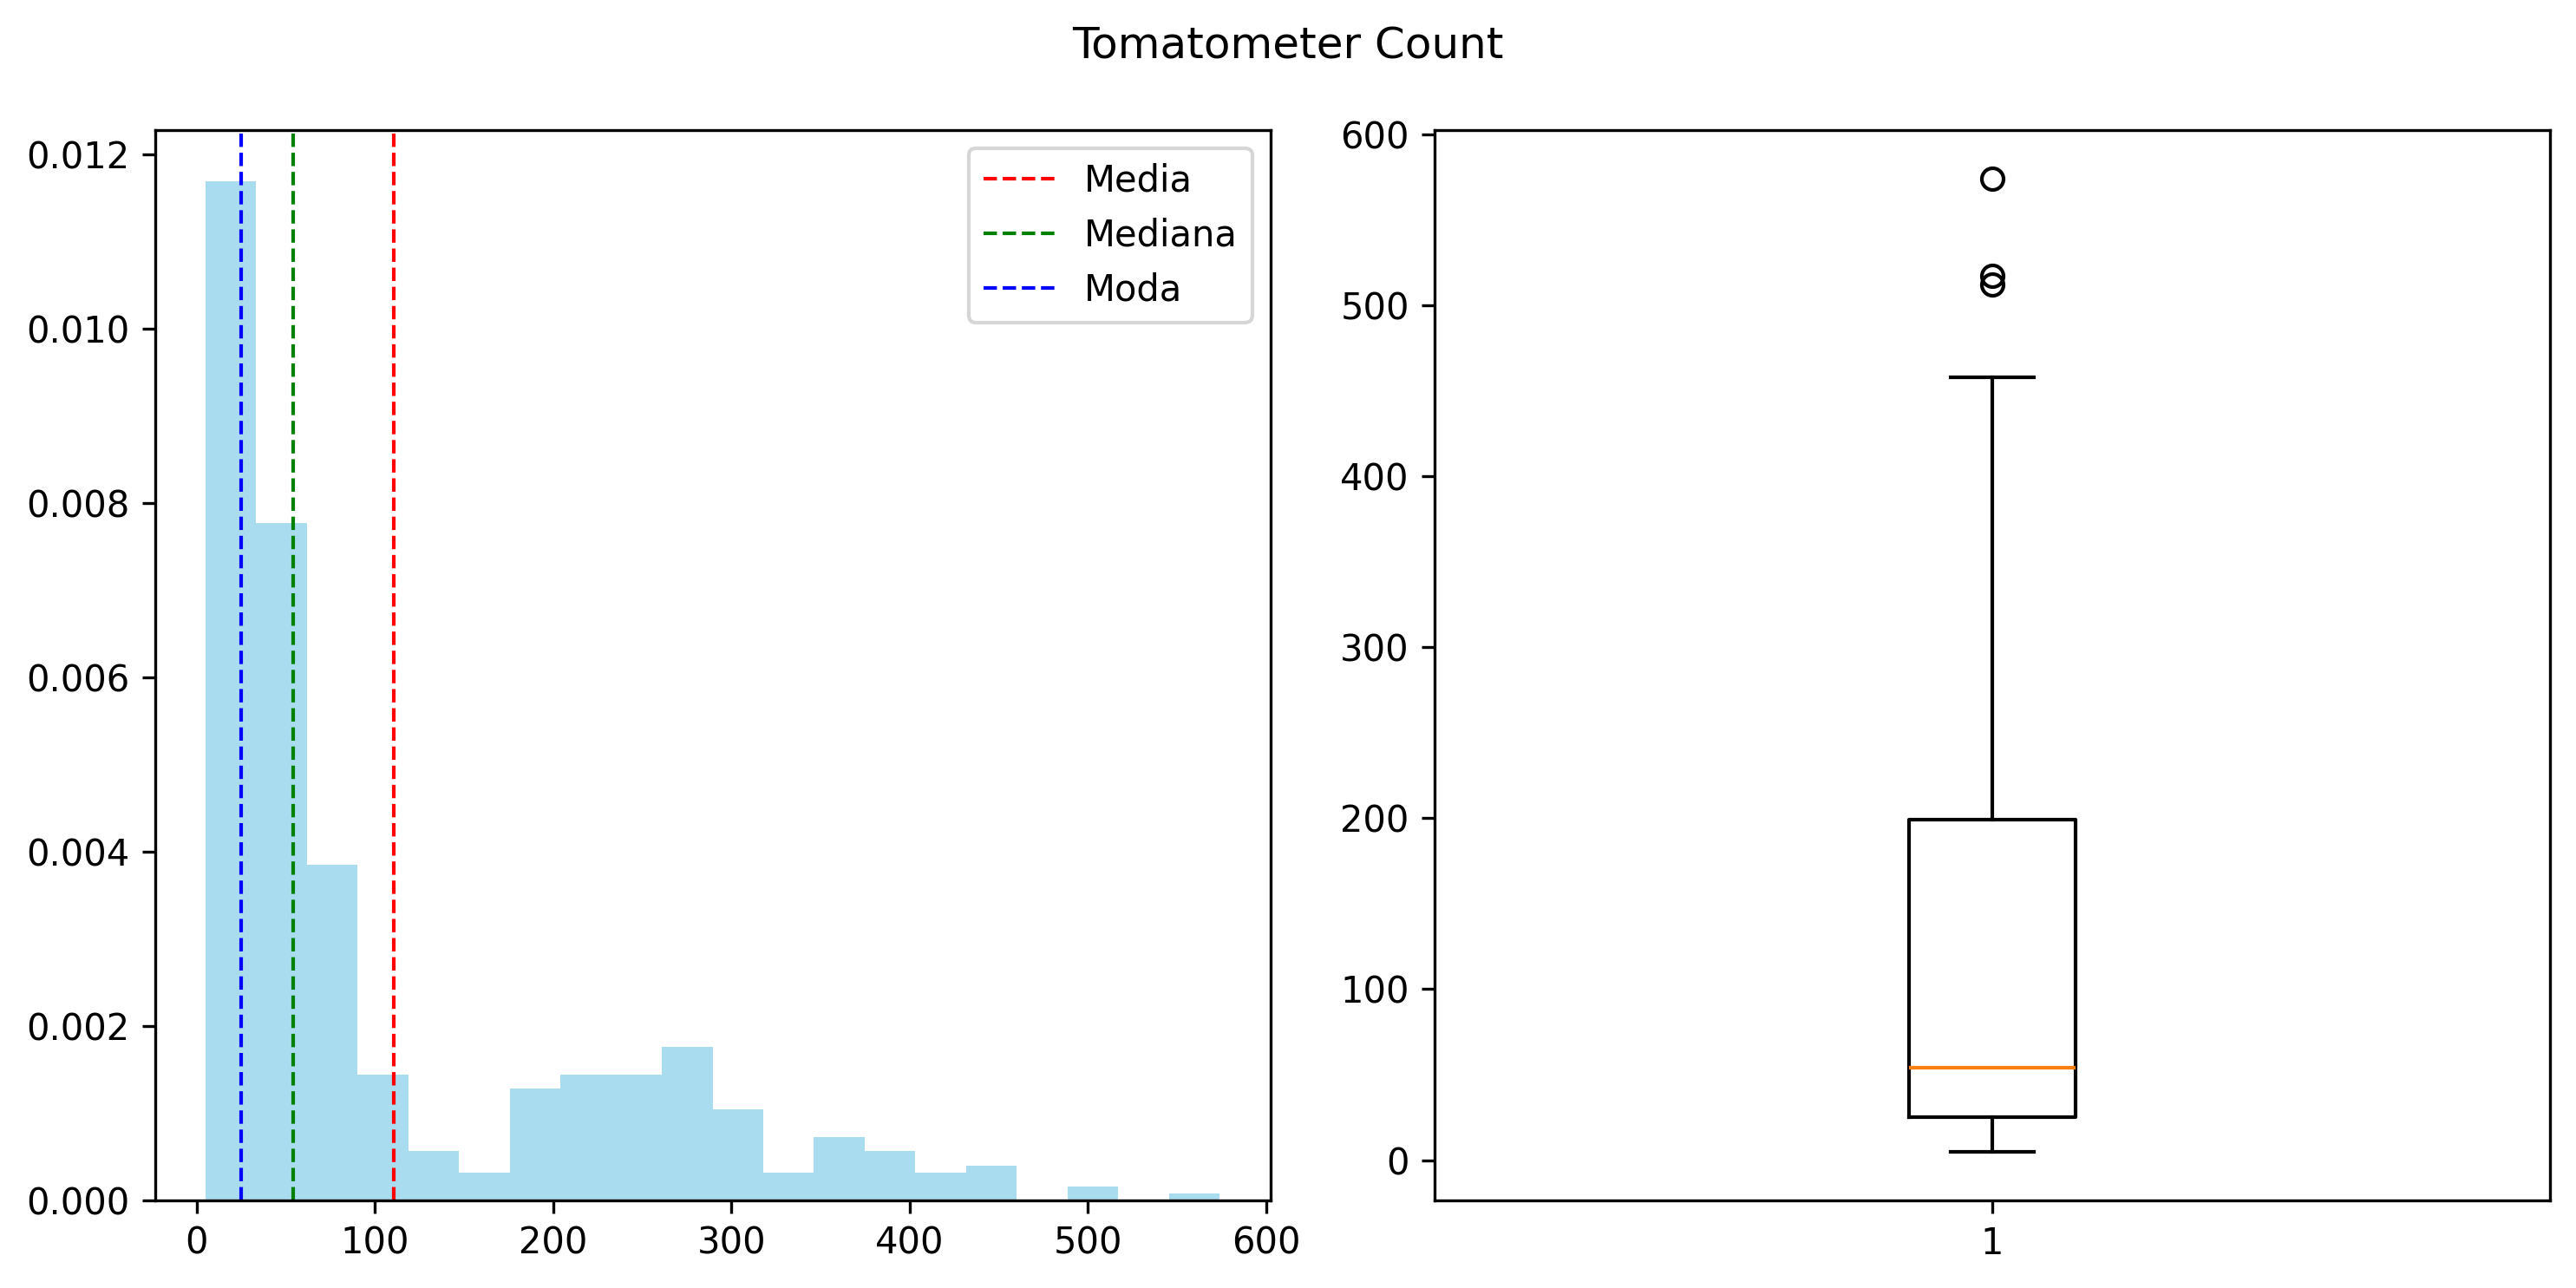

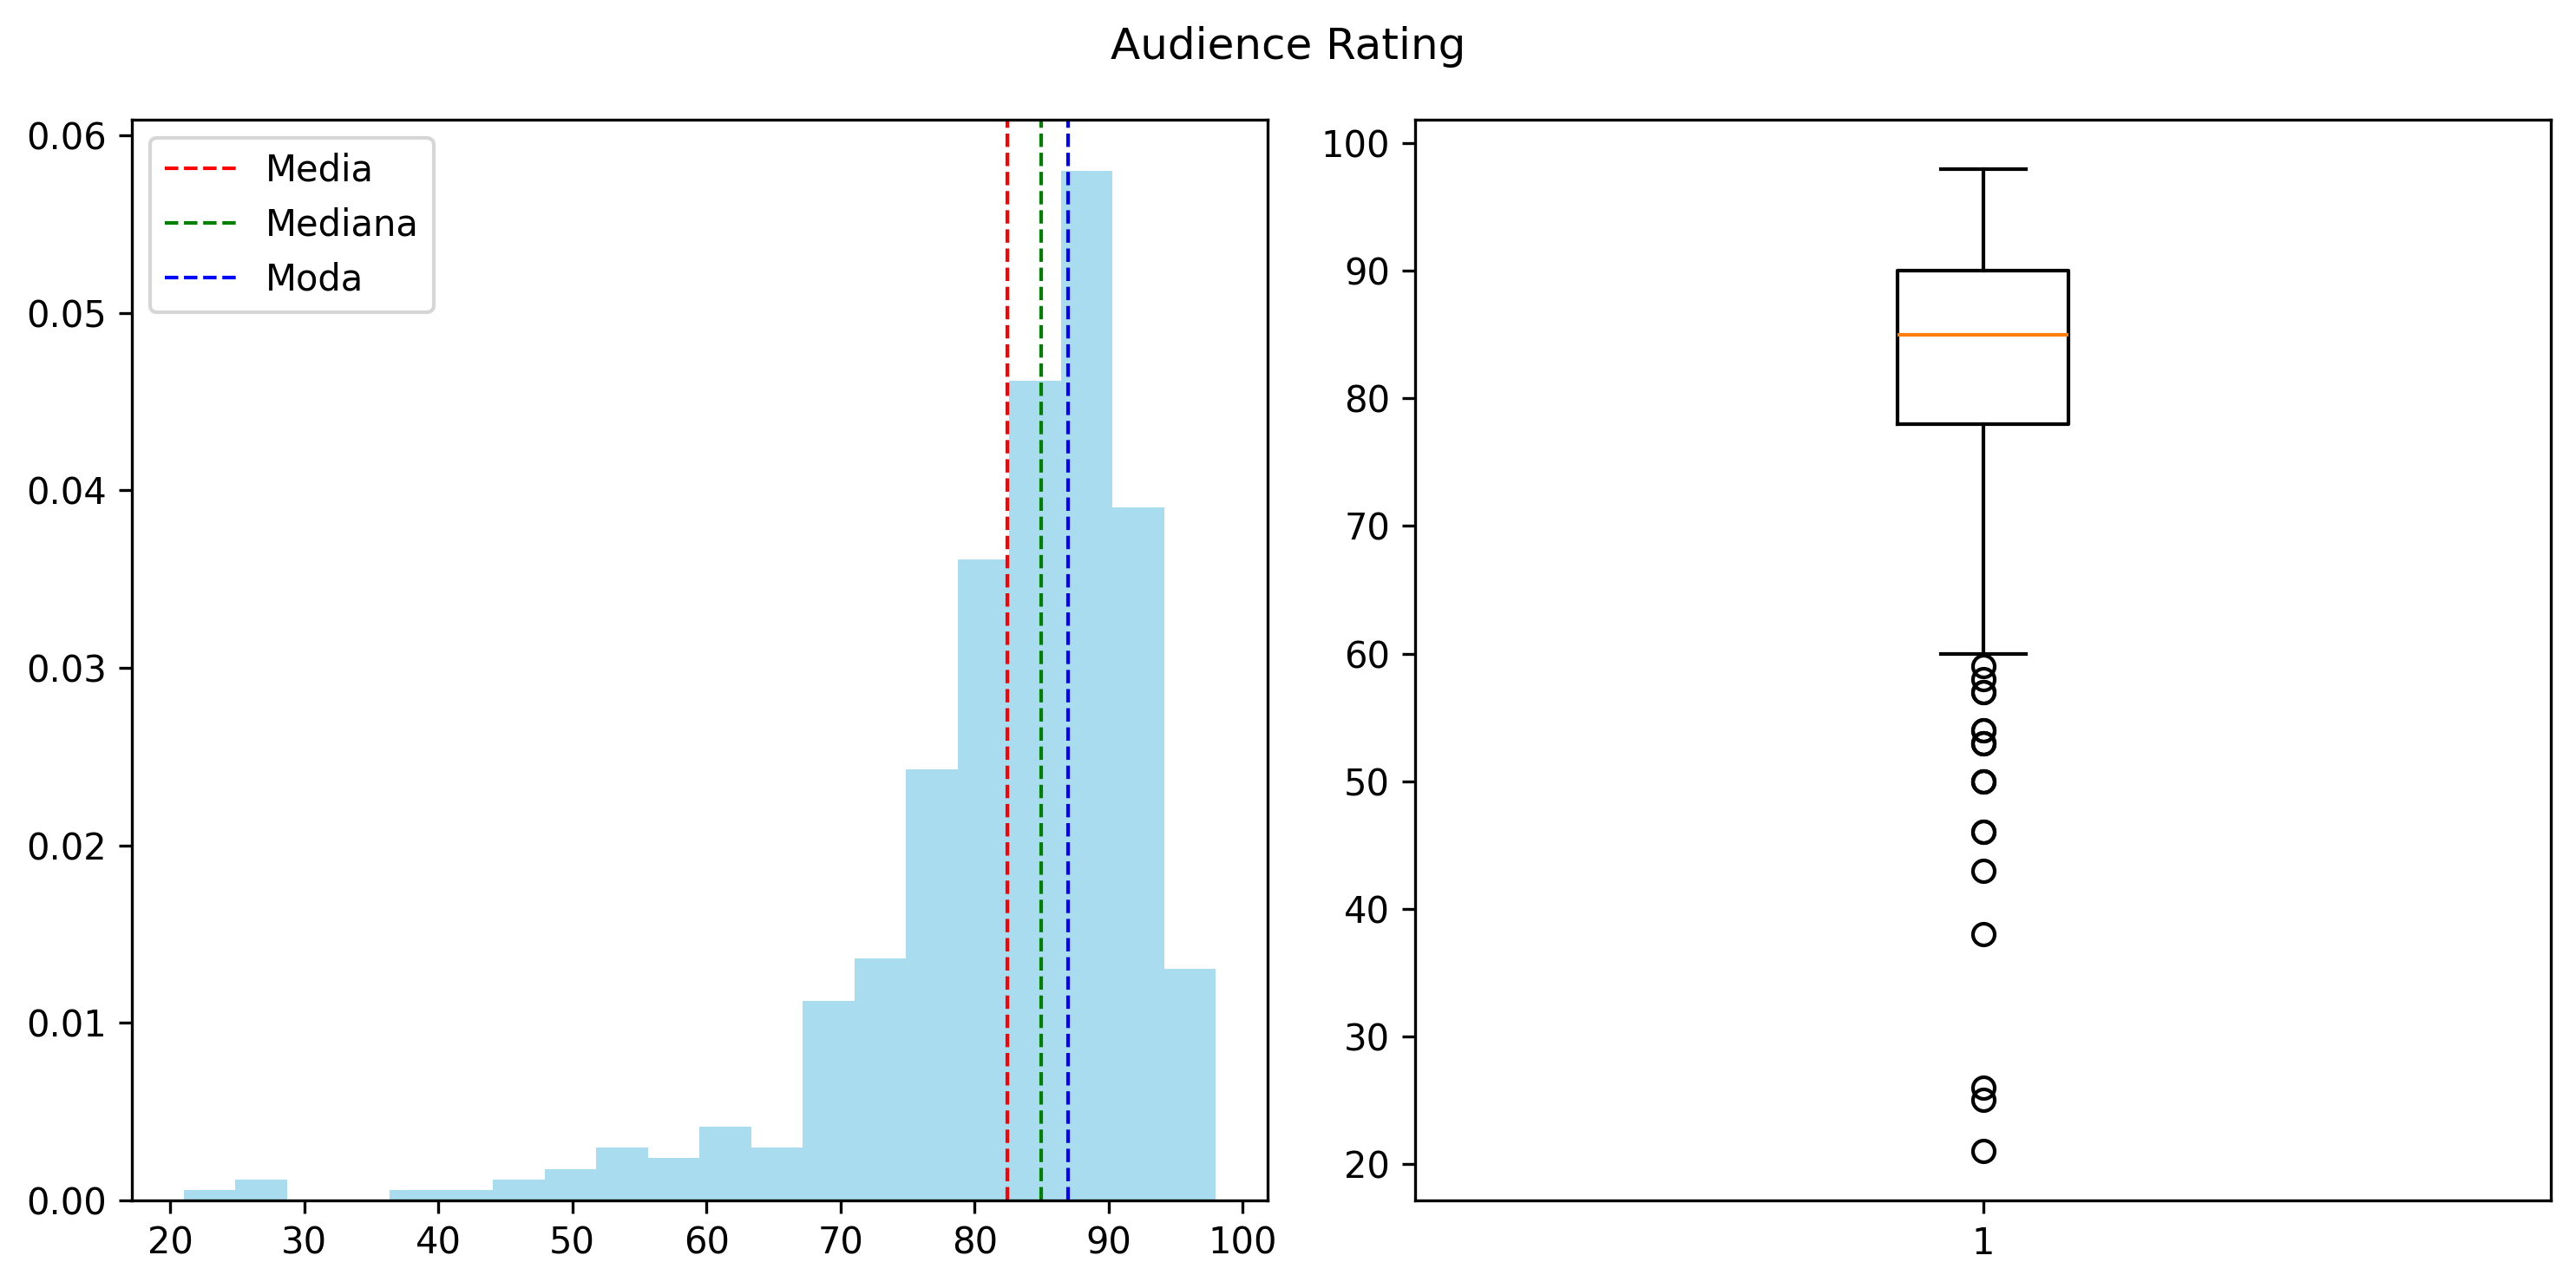

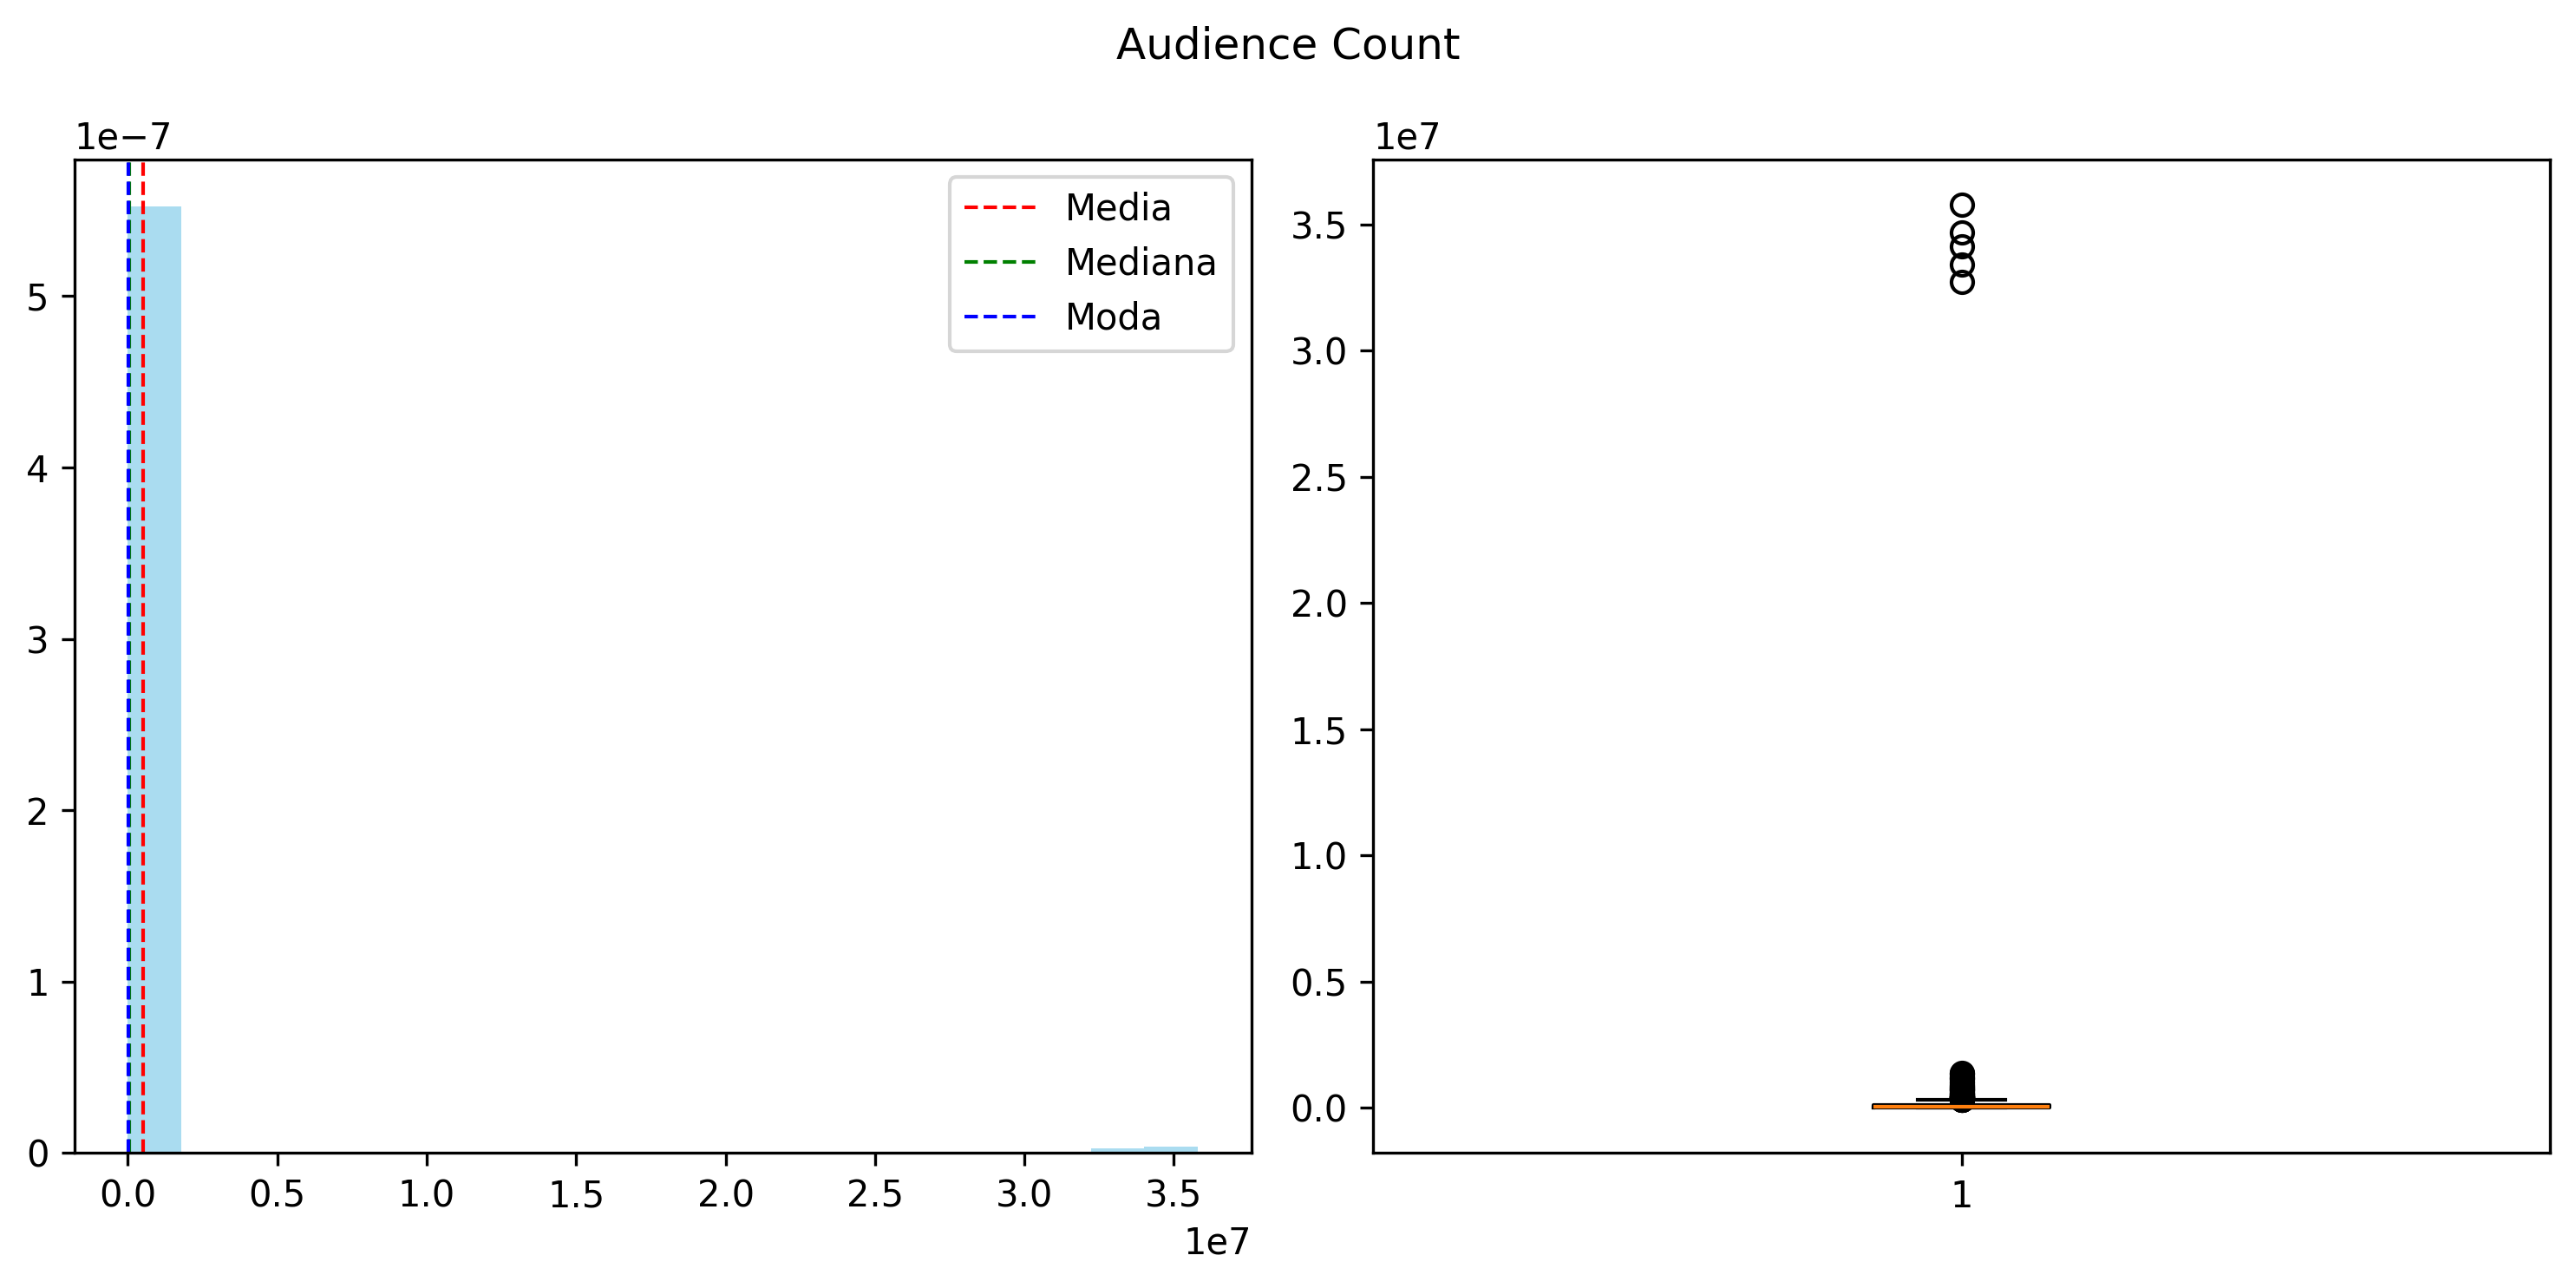

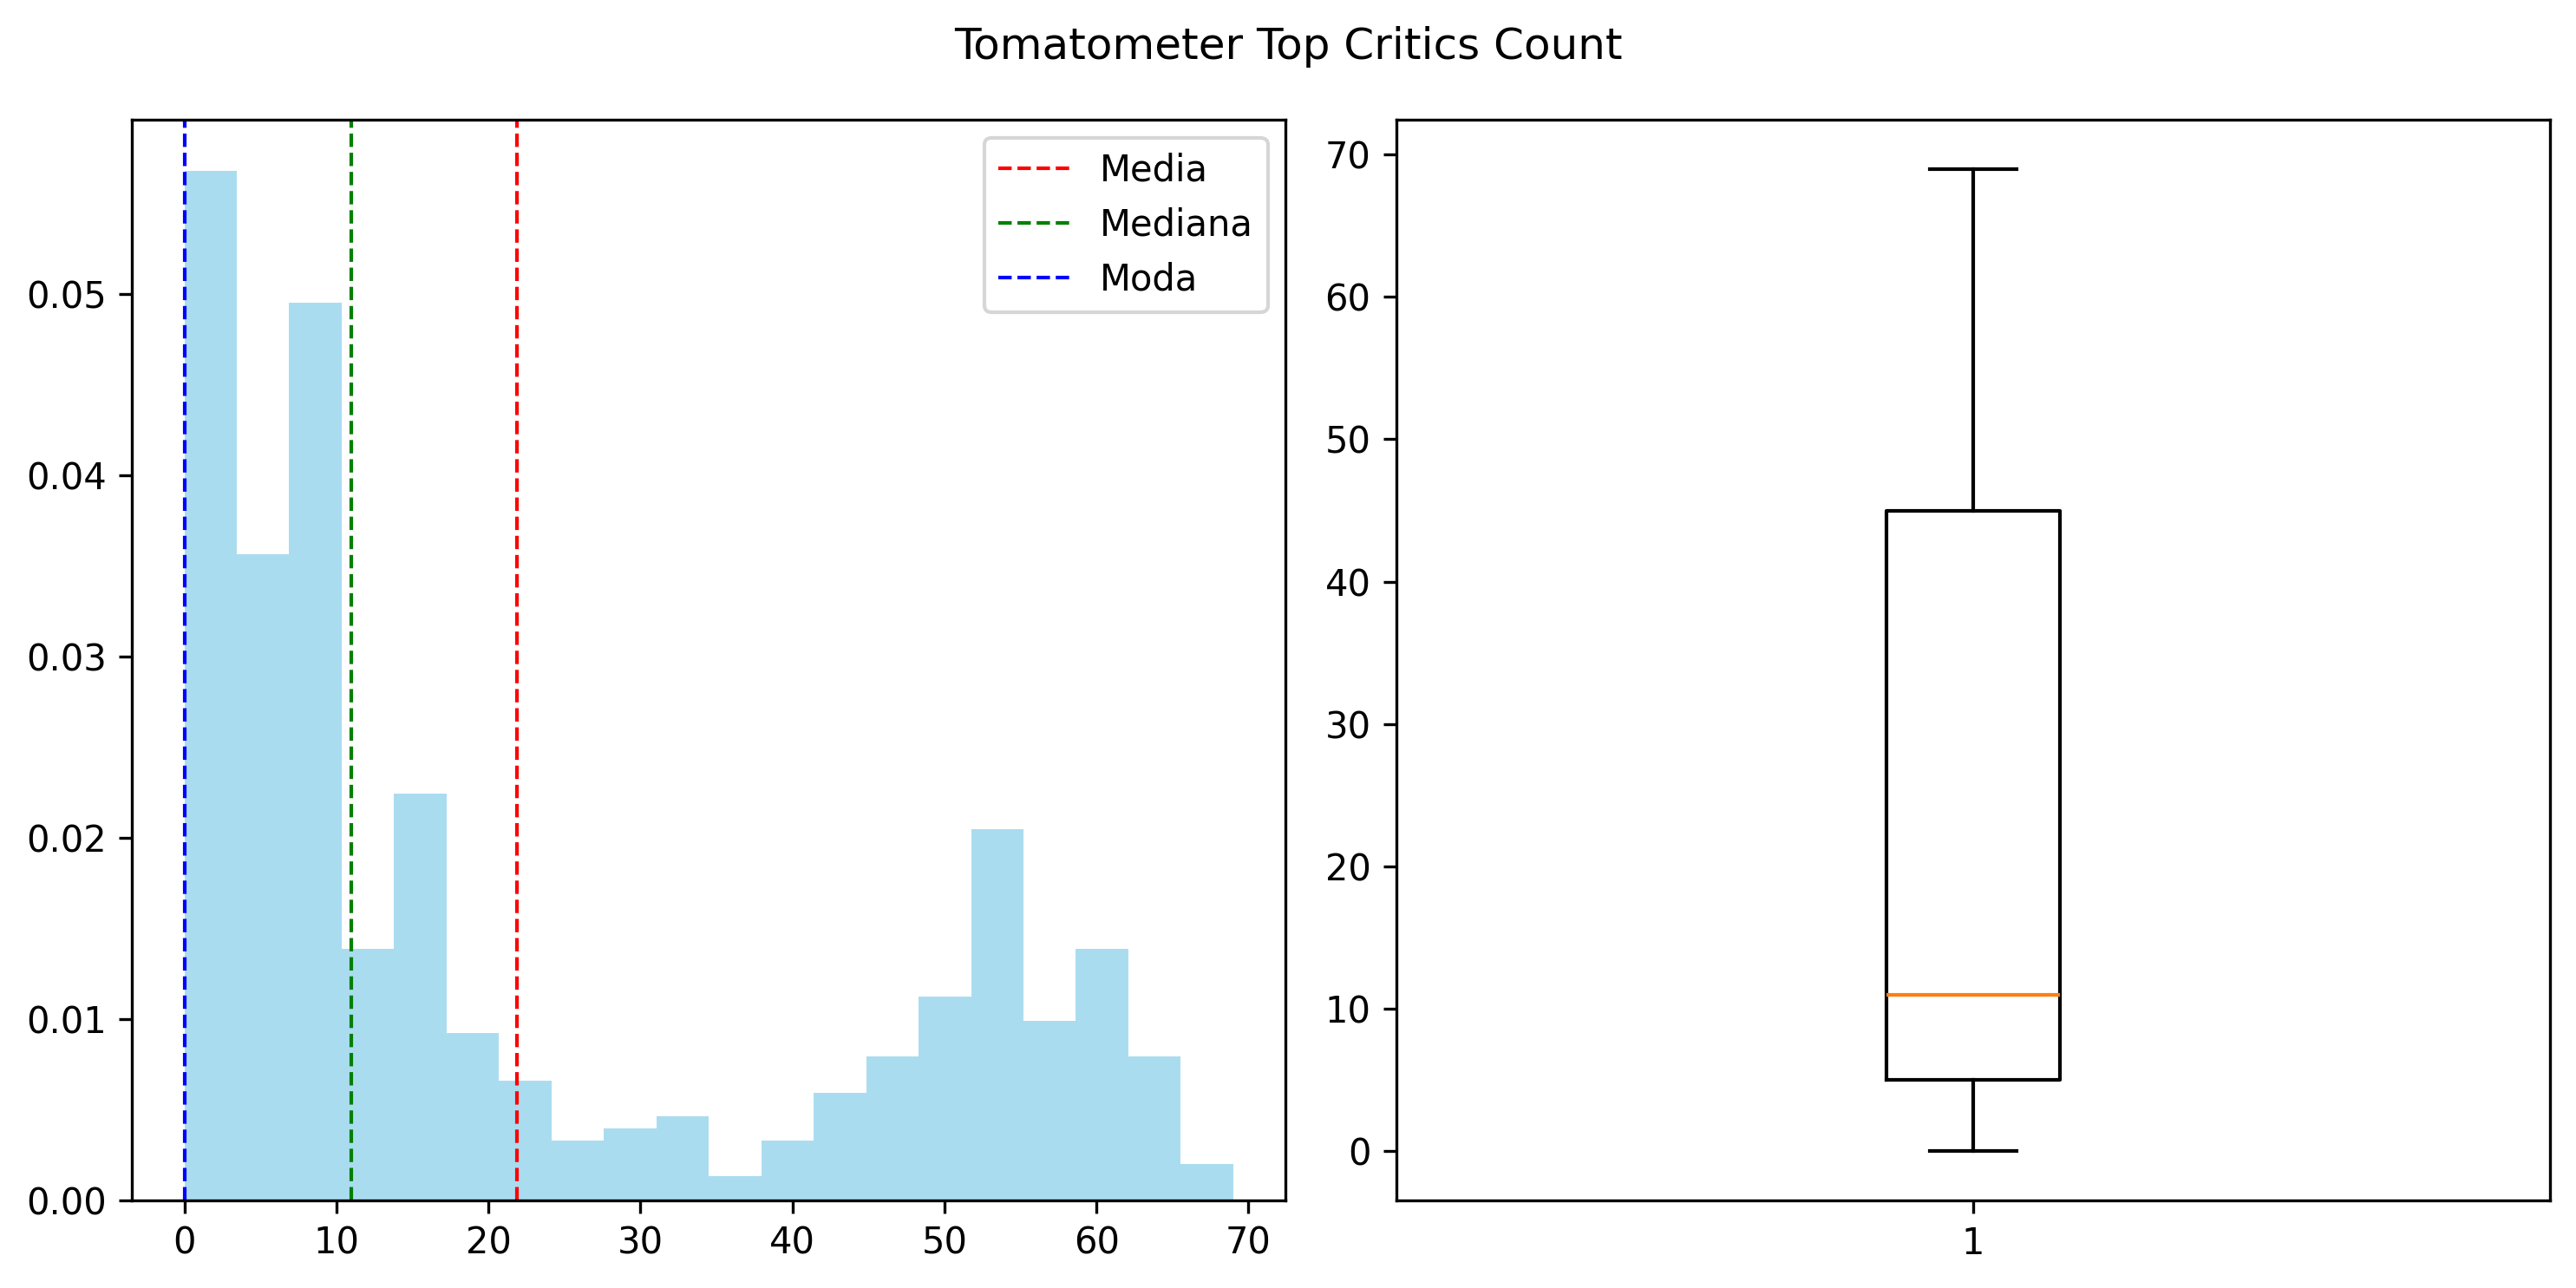

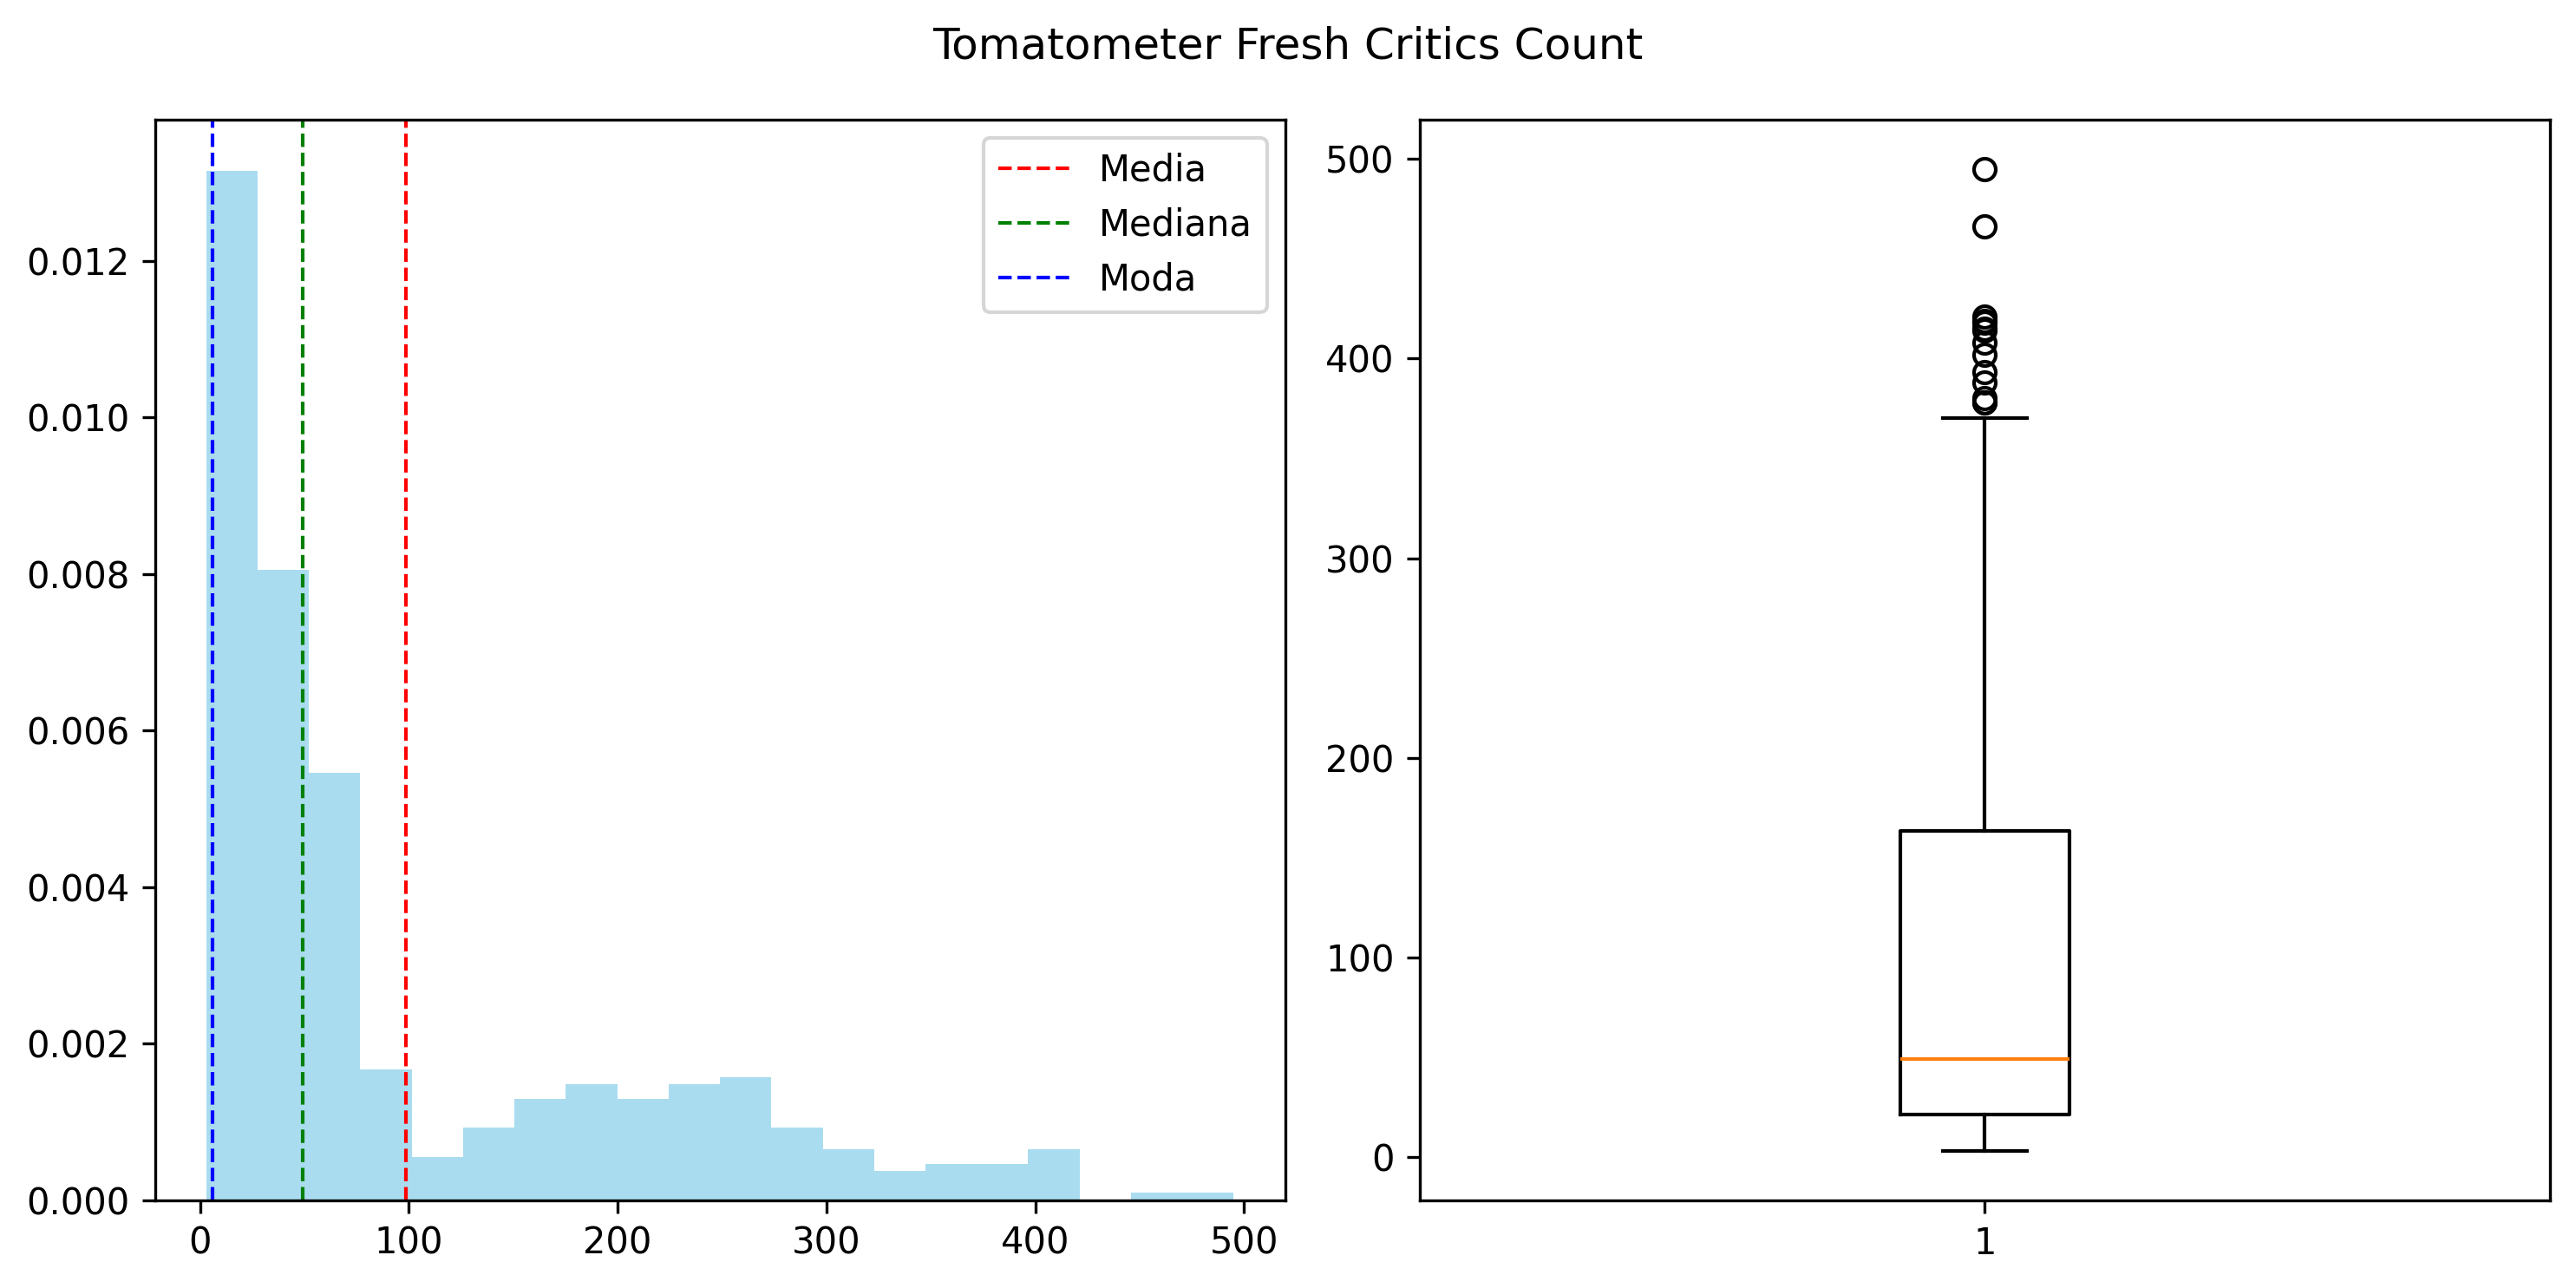

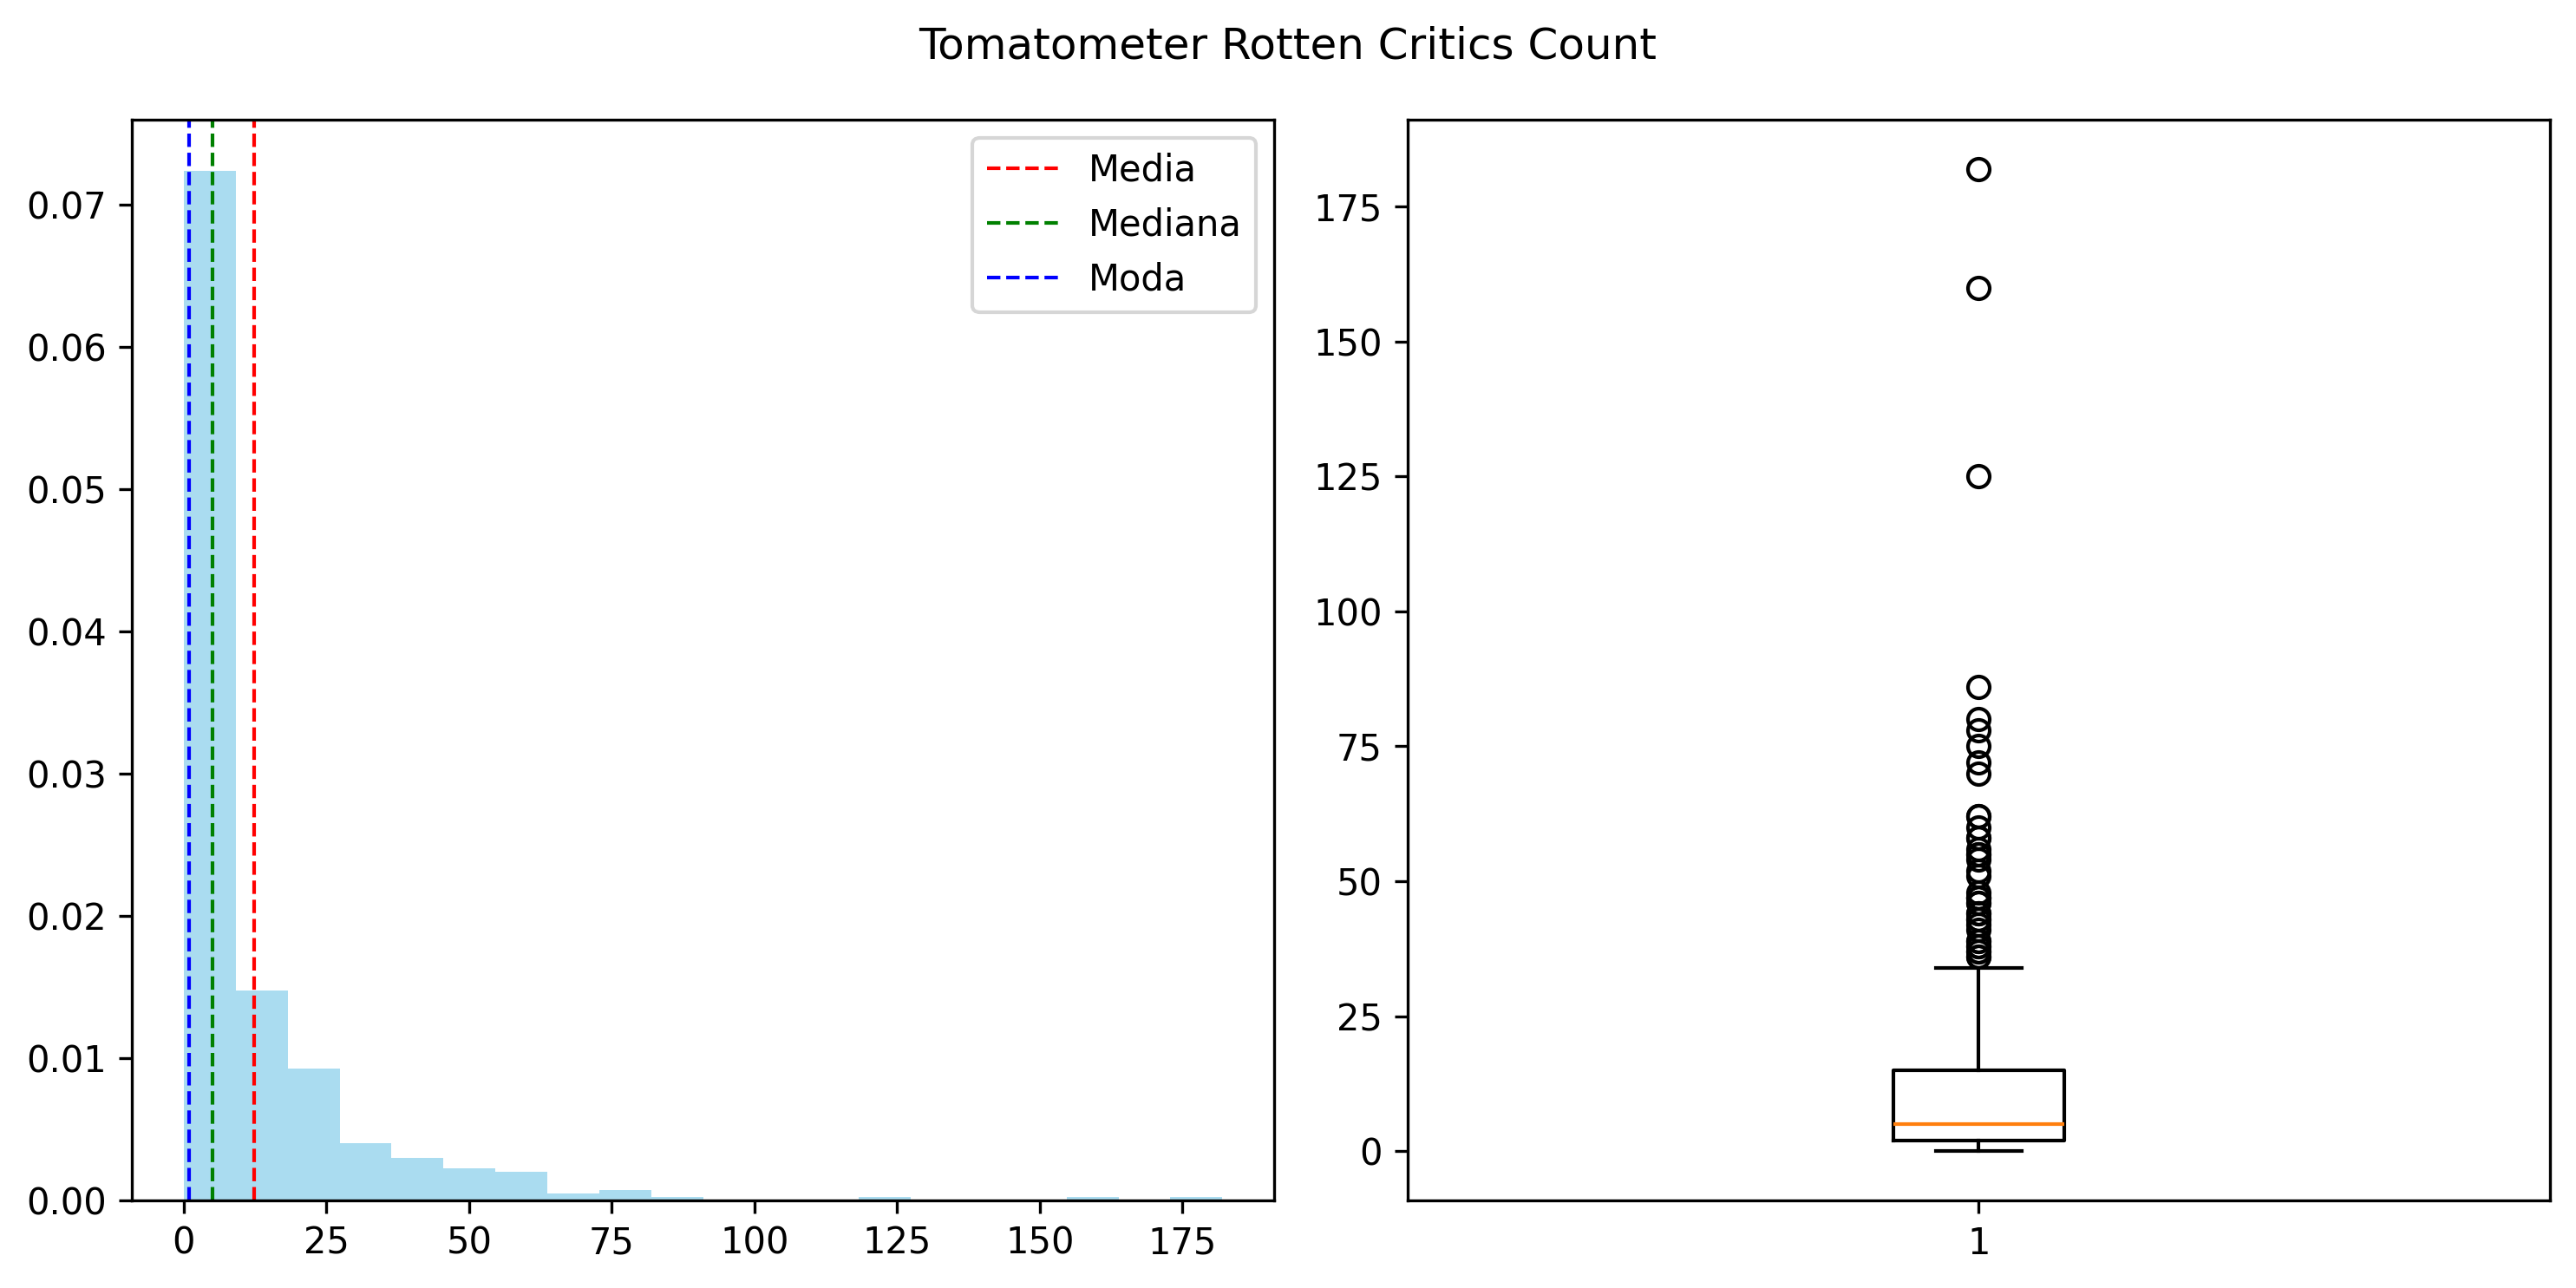

In [30]:
# P2
numeric_oscar = oscar_df.select_dtypes(include=[np.number])

for  column in numeric_oscar.columns:
    # recordar eliminar o reemplazar nan dado a que afecta el algoritmo de boxplot
    data = oscar_df[column].dropna()
    histogram_boxplot(data, titulo_general=column)


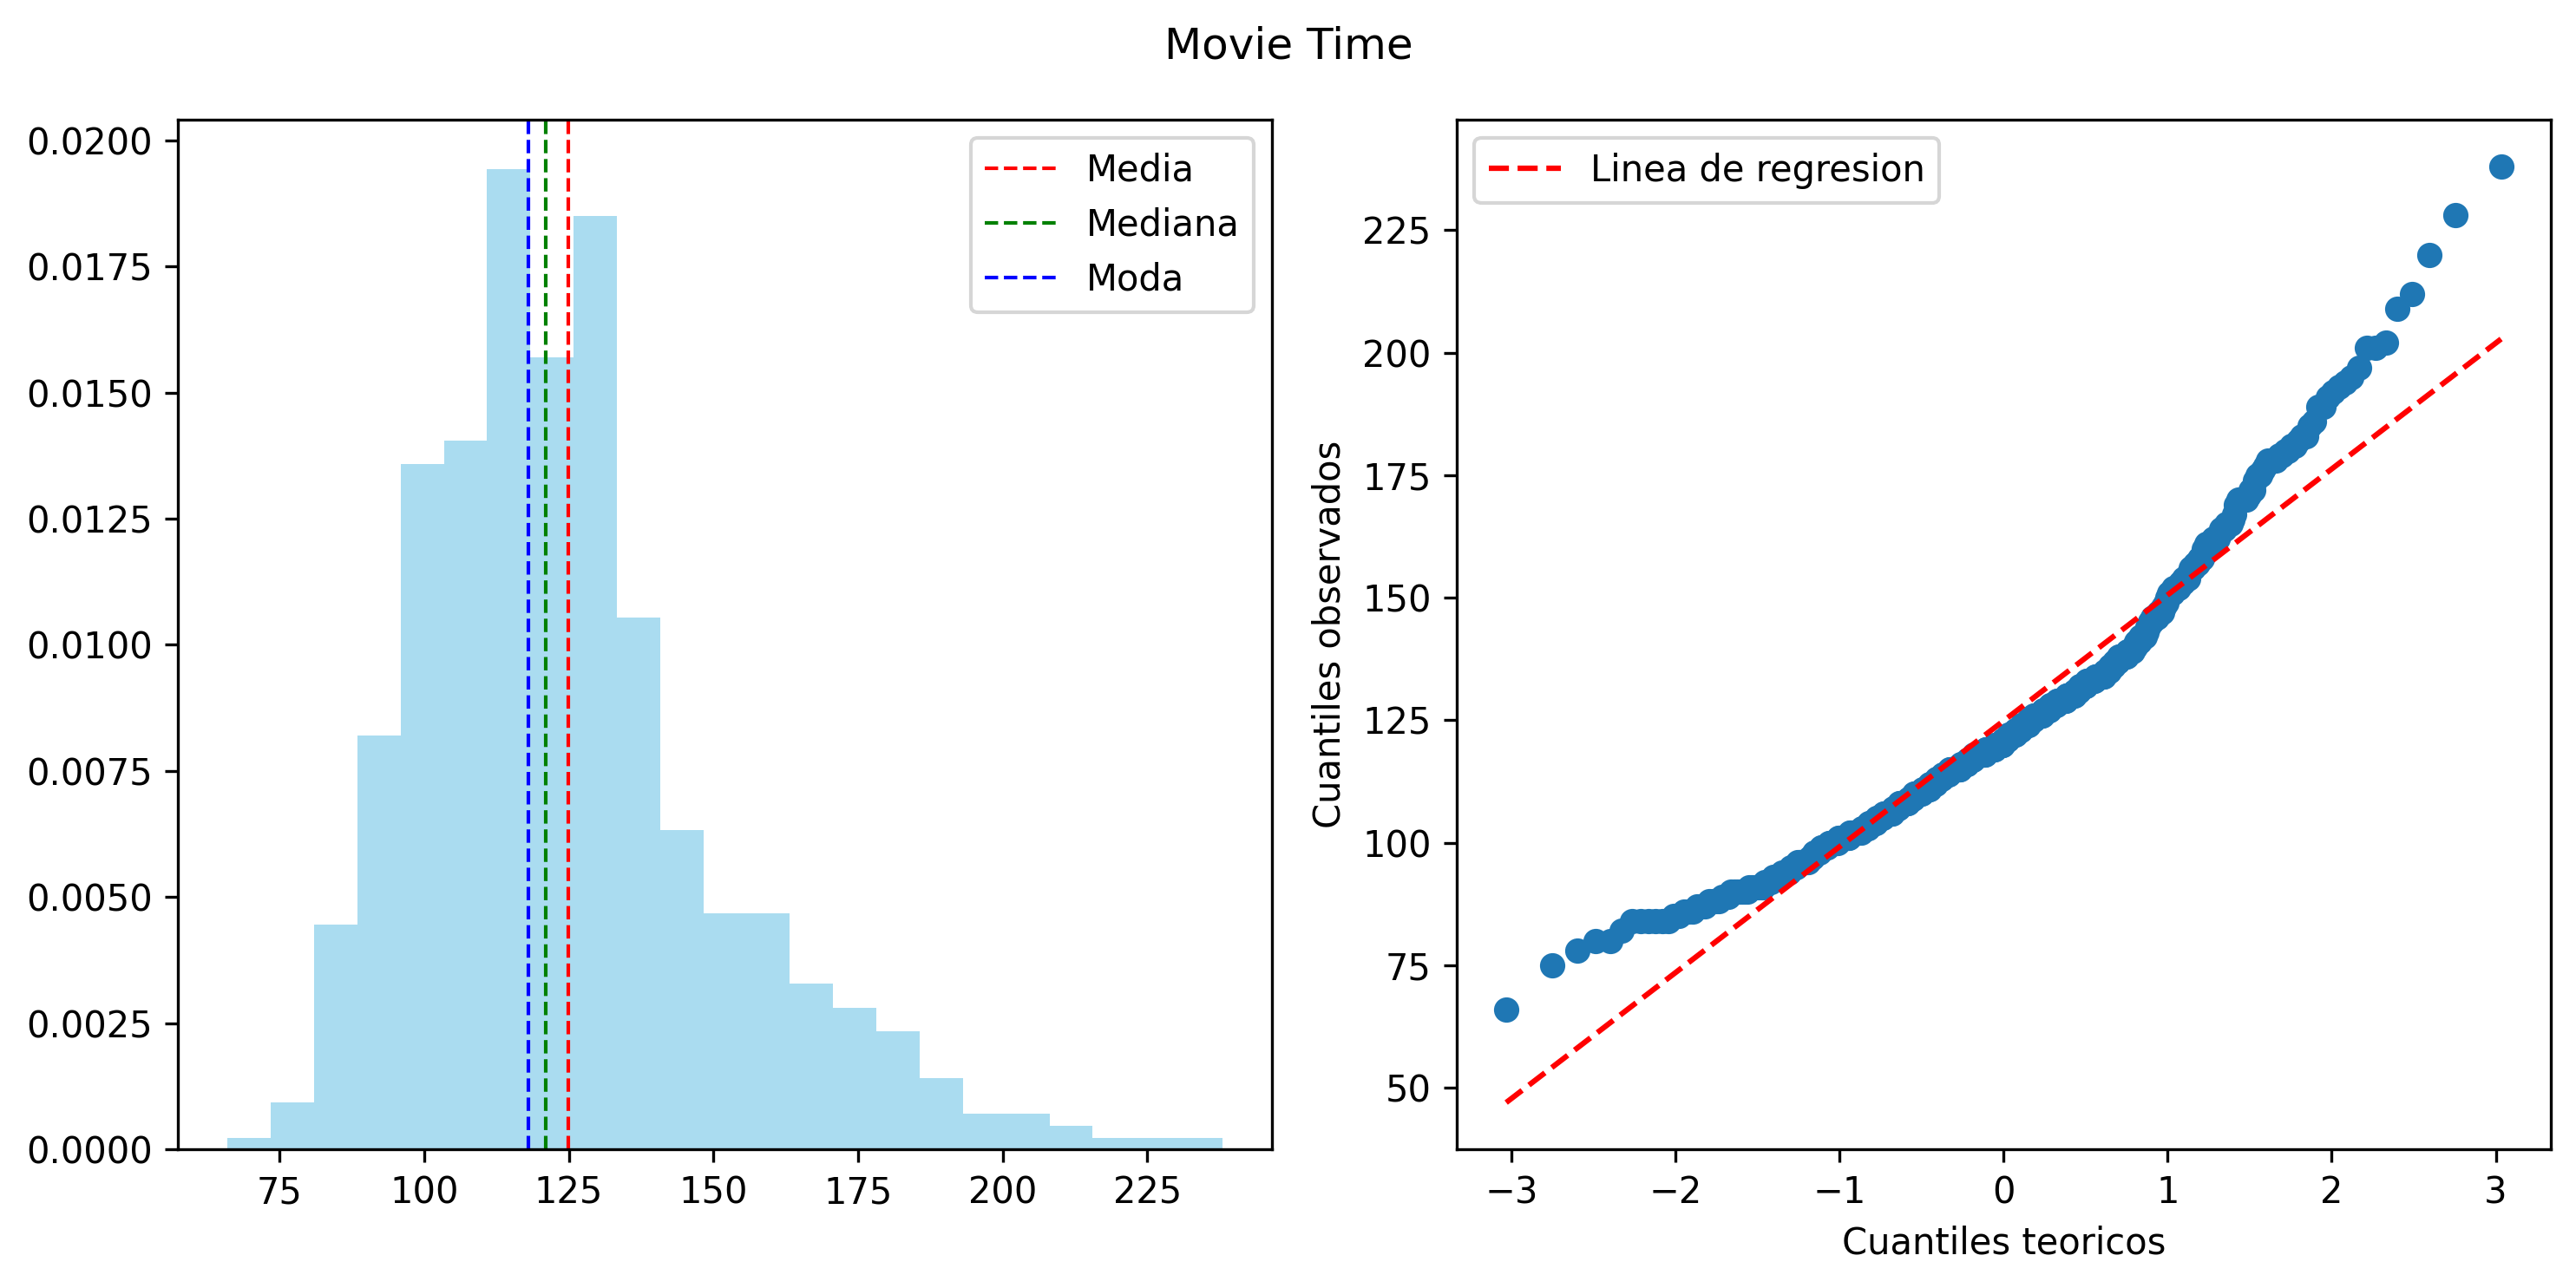

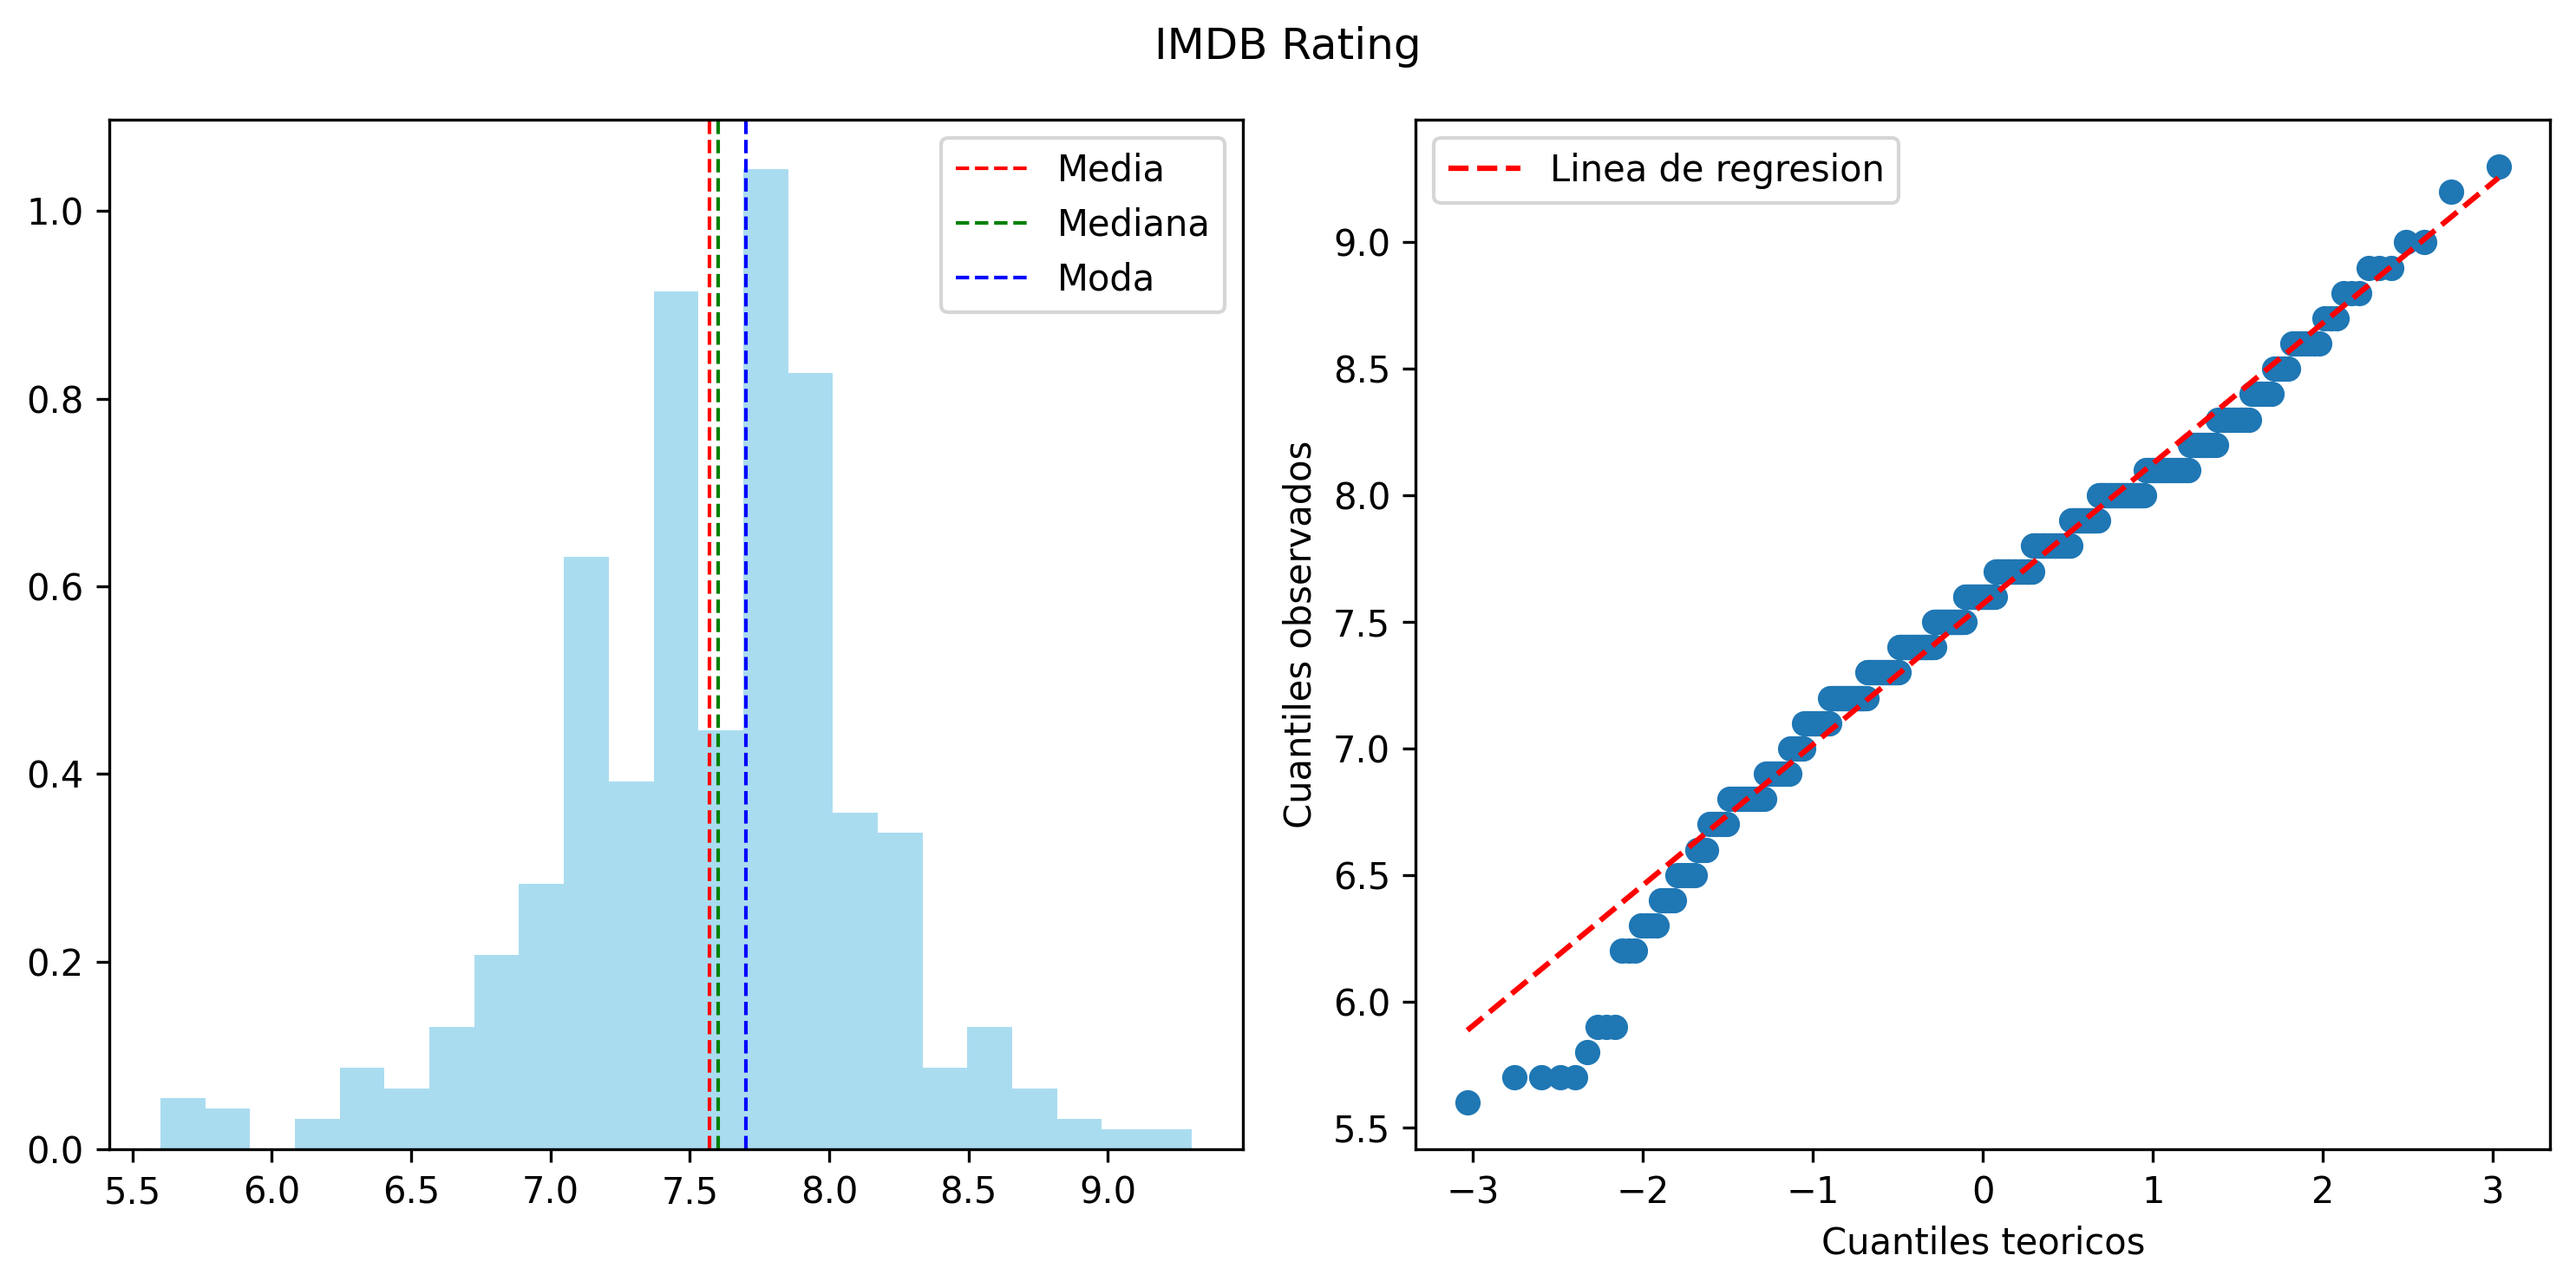

In [31]:
# P2

for  column in ['Movie Time', 'IMDB Rating']:
    data = numeric_oscar[column].dropna()
    histogram_qqplot(data, titulo_general=column)

In [32]:
# P3
categoric_oscar = oscar_df.select_dtypes(include=[object])
categoric_oscar.count()

niveles = {}
for column in categoric_oscar.columns:
    niveles[column] = categoric_oscar[column].value_counts()

niveles

{'Film': Film
 Cleopatra                     2
 Little Women                  2
 Heaven Can Wait               2
 Mutiny on the Bounty          2
 Romeo and Juliet              2
                              ..
 The Robe                      1
 Julius Caesar                 1
 From Here to Eternity         1
 The Quiet Man                 1
 The Trial of the Chicago 7    1
 Name: count, Length: 564, dtype: int64,
 'Oscar Year': Oscar Year
 1934       12
 1935       12
 1938       10
 2009       10
 2010       10
            ..
 1966        5
 1965        5
 1964        5
 1963        5
 1927/28     3
 Name: count, Length: 93, dtype: int64,
 'Film Studio/Producer(s)': Film Studio/Producer(s)
 Metro-Goldwyn-Mayer                 40
 Warner Bros.                        20
 20th Century-Fox                    16
 Columbia                            13
 Paramount                           13
                                     ..
 Claude Berri and Timothy Burrill     1
 Jonathan Sanger   

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


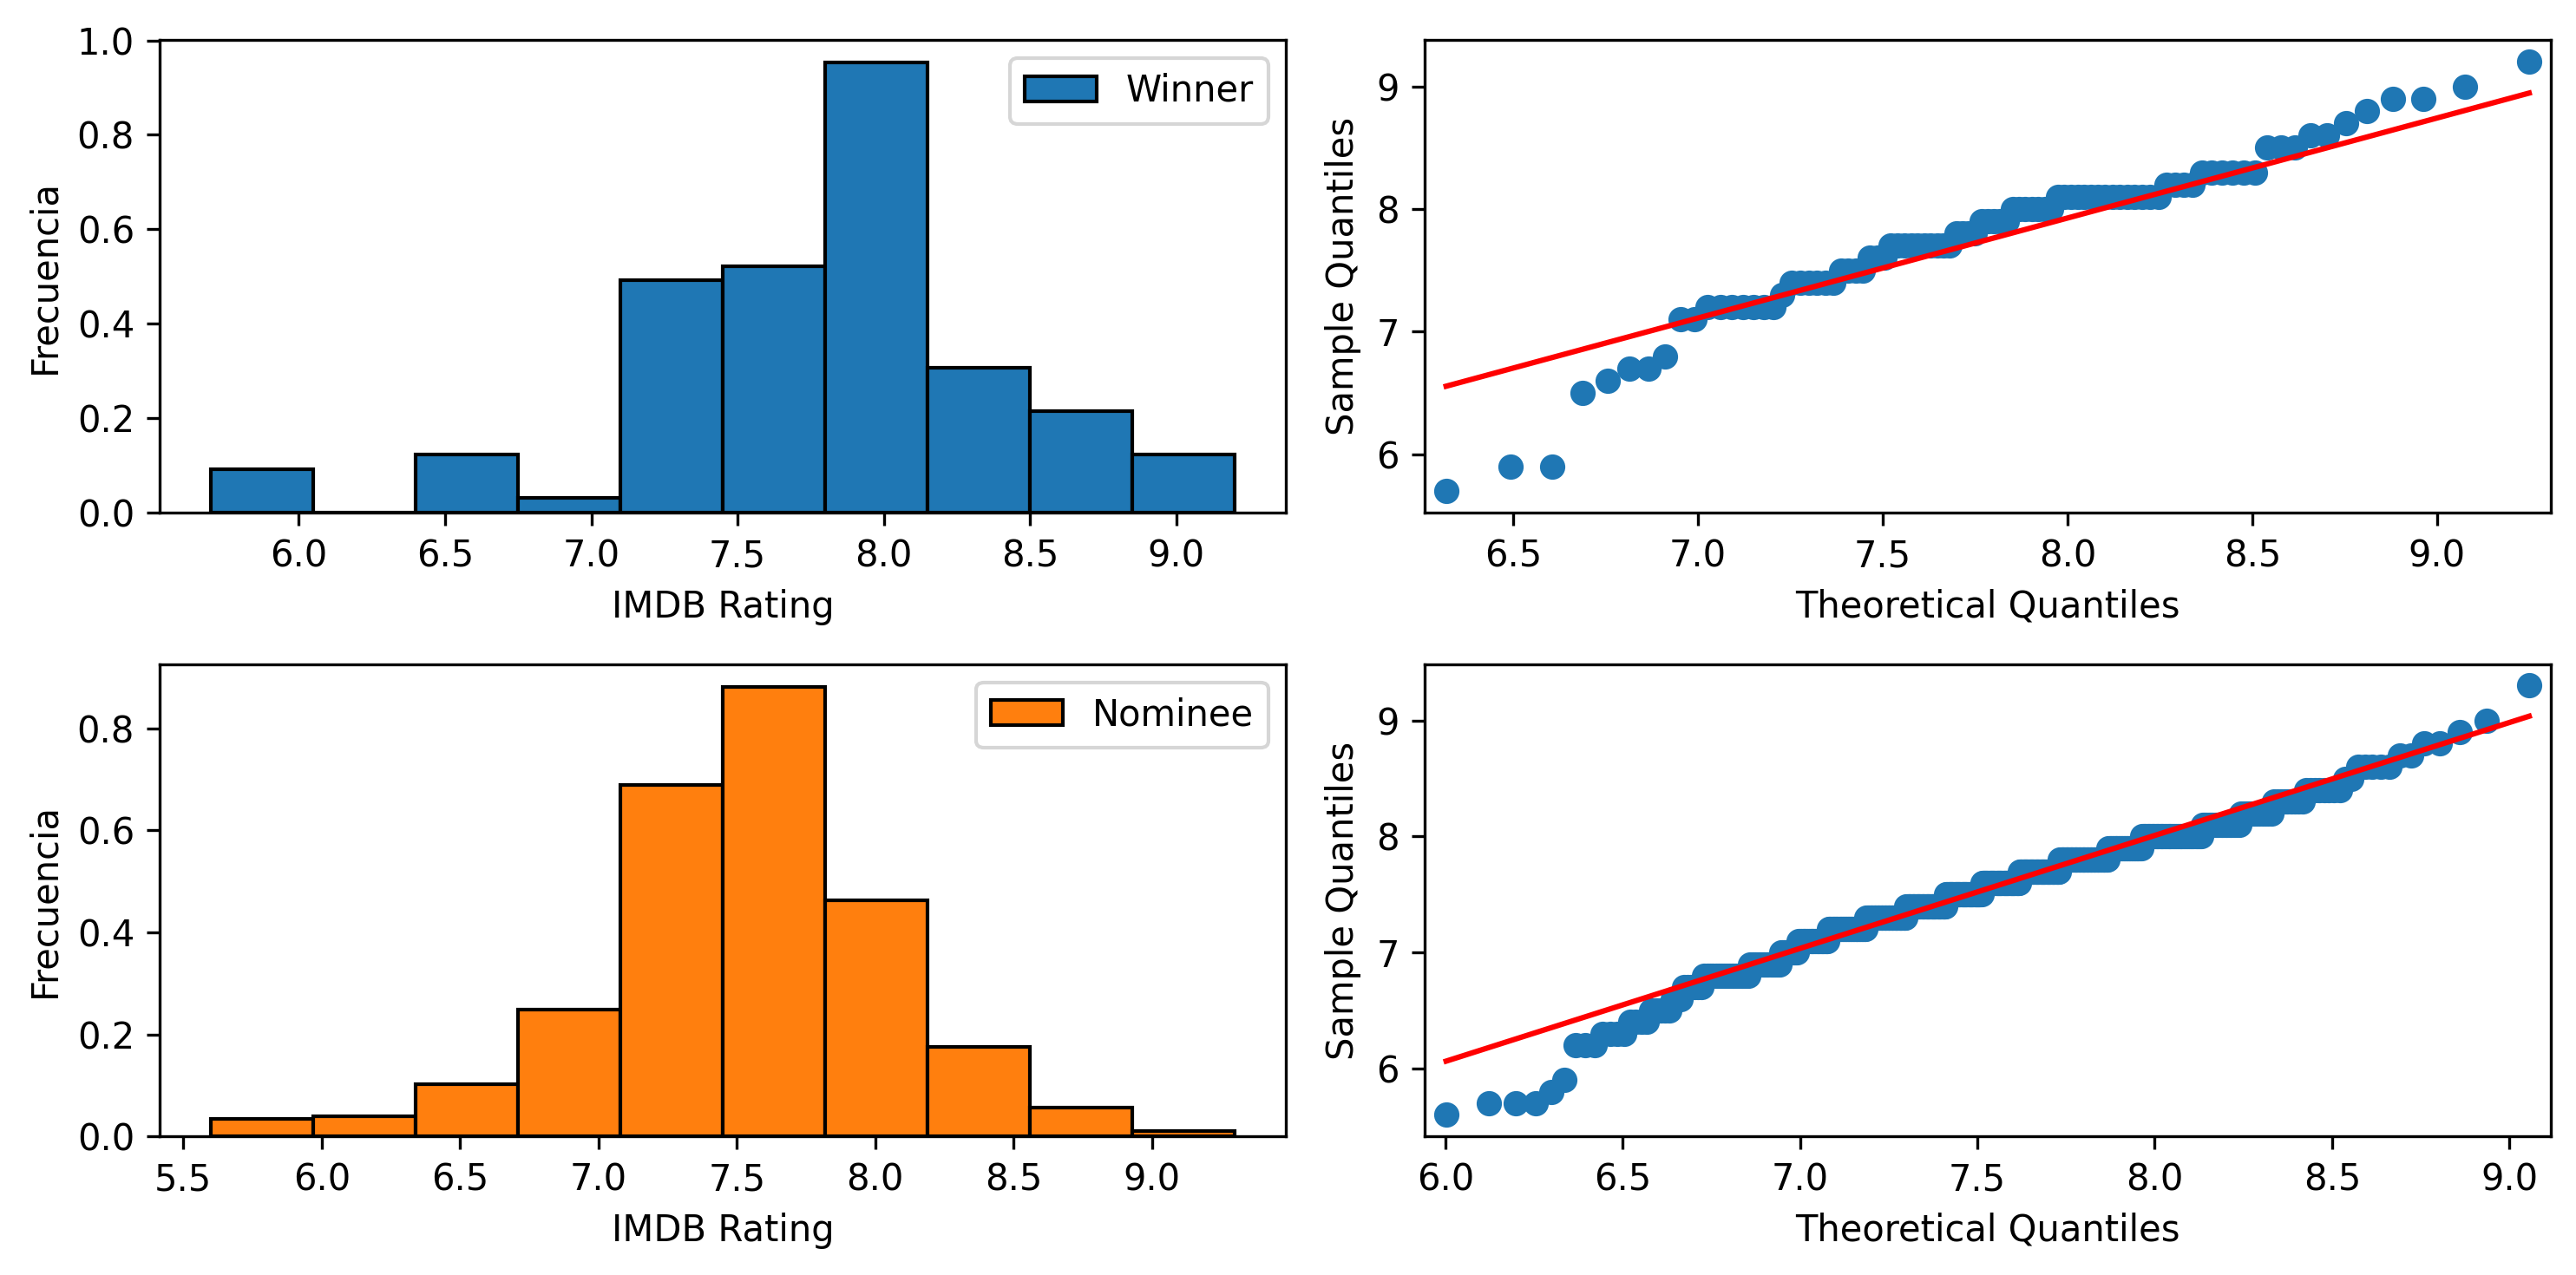

In [33]:
# P4
rating = oscar_df['Award'].unique()
fig, ax = plt.subplots(2,2, dpi = 300, figsize = (10,5))
colores = ['tab:blue', 'tab:orange']
for posi,awd in enumerate(rating):
    data = oscar_df[oscar_df['Award'] == awd]
    ax[posi,0].hist(data['IMDB Rating'], density = True, label = awd, facecolor = colores[posi],
                    edgecolor = 'black')
    ax[posi,0].set_xlabel('IMDB Rating')
    ax[posi,0].set_ylabel('Frecuencia')
    ax[posi,0].legend()
    qqplot(
        data['IMDB Rating'], loc = np.mean(data['IMDB Rating']),scale = np.std(data['IMDB Rating']),
        line='q',
        ax = ax[posi,1],
        color = colores[posi]
    )

fig.tight_layout()
plt.show()


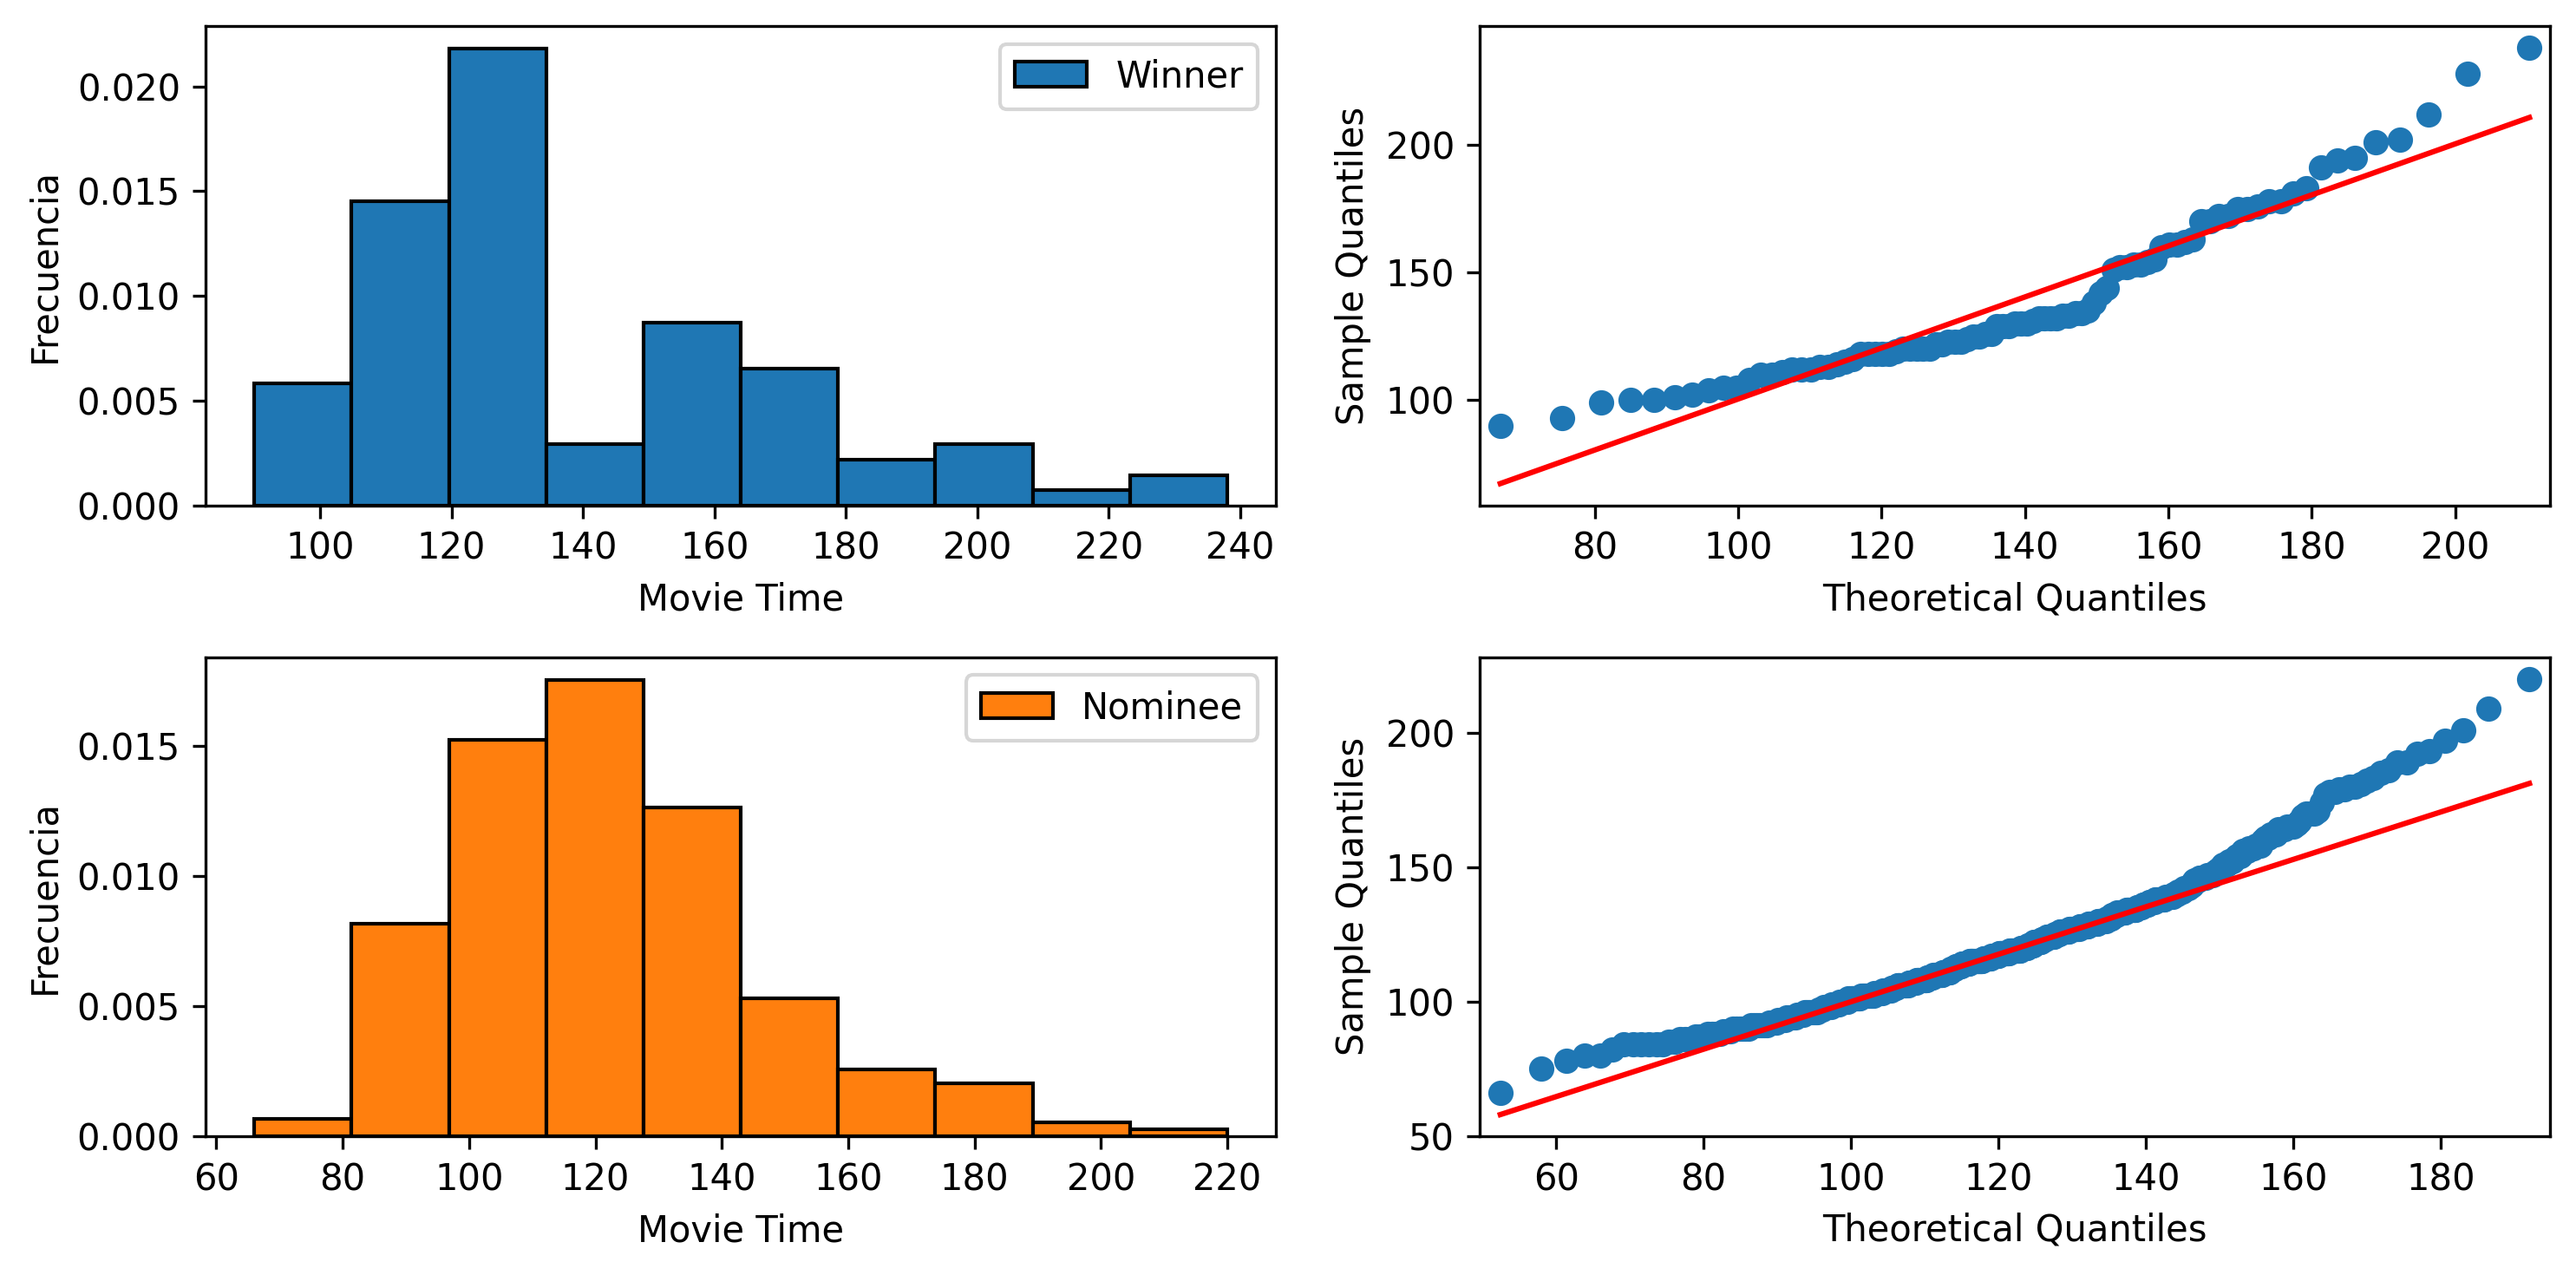

In [34]:
# P4
rating = oscar_df['Award'].unique()
fig, ax = plt.subplots(2,2, dpi = 300, figsize = (10,5))
colores = ['tab:blue', 'tab:orange']
for posi,awd in enumerate(rating):
    data = oscar_df[oscar_df['Award'] == awd]
    ax[posi,0].hist(data['Movie Time'], density = True, label = awd, facecolor = colores[posi],edgecolor = 'black')
    ax[posi,0].set_xlabel('Movie Time')
    ax[posi,0].set_ylabel('Frecuencia')
    ax[posi,0].legend()
    qqplot(
        data['Movie Time'], loc = np.mean(data['Movie Time']),scale = np.std(data['Movie Time']),
        line='q',
        ax = ax[posi,1],
        color = colores[posi]
    )
fig.tight_layout()
plt.show()